In [215]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics
from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm

In [216]:
lista_camadas_neuronios = range(100)


In [217]:
lista_camadas_neuronios[99]

99

In [218]:
#--------- definicao dos ranges das variaveis ---------
x_limite_inferior = 1
y_limite_inferior = 1
x_limite_superior = 100
y_limite_superior = 100
qtdd_amostras = 10000

#--------- Vetor dos ranges das variaveis ---------
X = np.random.randint(x_limite_inferior, x_limite_superior, (qtdd_amostras))
Y = np.random.randint(y_limite_inferior, y_limite_superior, (qtdd_amostras))

#--------- Vetor dos ranges das variaveis ---------
lista_camadas_neuronios = range(100)

#--------- definicao da funcao resultante ---------
def function(X,Y):
    return X + Y
Z = function(X,Y)

# ---------------------- Informação a Priori ---------------------- 
df = pd.DataFrame(Z, columns = ['Z'])
df['X'] = X
df['Y'] = Y

# ----------- Base de teste e treinamento com informação a priori -----------
df_train, df_test = train_test_split(df, test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# ---------------- Escolha dos parametros de entrada para a Rede Neural ----------------
columns_features_train = ['X', 'Y']
columns_features_predict = columns_features_train
input_numbers = len(columns_features_train)
target_train = ['Z']
output_numbers = len(target_train)

list_mape = []
list_mse = []
list_rmspe = []
error_list = []

for n_numbers in tqdm(lista_camadas_neuronios):
    # ---------------- Configuração da rede neural ----------------
    model = Sequential()
    model.add(Dense(units = input_numbers, activation = 'linear', input_dim=input_numbers))
    model.add(Dense(units = n_numbers, activation = 'linear'))
    model.add(Dense(units = output_numbers, activation = 'linear'))
    model.compile(loss='mse', optimizer="adam")

    # ---------------- treinamento da rede ----------------
    model.fit(df_train[columns_features_train], df_train[target_train],
              epochs=50, verbose=1, use_multiprocessing=True)

    # ---------------- Previsão dos dados de teste ----------------
    Z_Predict = model.predict(df_test[columns_features_train])
    df_test['Z_Predict'] = pd.DataFrame(Z_Predict).astype(float)

    # ---------------- Metricas de erros ----------------
    mape = mean_absolute_percentage_error(df_test['Z'], df_test['Z_Predict'])
    mse = mean_squared_error(df_test['Z'], df_test['Z_Predict'])
    rmspe = (np.sqrt(np.mean(np.square((df_test['Z'] - df_test['Z_Predict']) / df_test['Z'])))) * 100
    
    # ---------------- Append Errors in lists ----------------
    list_mape.append(mape)
    list_mse.append(mse)
    list_rmspe.append(rmspe)
    error_list.append([n_numbers, mape, mse, rmspe])
    
    #print(f'Mean Absolute Percentage Error: {mape.round(2)}', f'Mean Squared Error: {mse.round(2)}', f'Mean Square Percentage Error: {rmspe.round(2)}')

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 11642.2529
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2588
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2666
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2568
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 11642.2578
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2637
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 11642.2646
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2598
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 11642.2578
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2617
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 11642.2568
Epoch 12/50
250/250 [==============================] - 1s 3ms/s

  1%|▊                                                                                 | 1/100 [00:34<57:00, 34.55s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1631.4451
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 3.9186
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1059
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1034
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1007
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0975
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0937
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0896
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0849
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0799
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0745
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0689
Epoch 13/50
250/250 [=

  2%|█▋                                                                                | 2/100 [01:08<55:38, 34.06s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 4263.7983
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1385.4399
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 413.8935
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 76.1599
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 6.7634
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5564
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3146
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2988
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2853
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2706
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2548
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2381
Epoch 13/50
250/

  3%|██▍                                                                               | 3/100 [01:41<54:32, 33.73s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 12715.7490
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 974.3824
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 63.8710
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 36.9214
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 19.8021
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 9.6156
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 4.2244
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1.6919
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2806
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1678
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1375
Epoch 13/50
250/

  4%|███▎                                                                              | 4/100 [02:14<53:44, 33.59s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 4492.2520
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 95.9222
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2238
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2123
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2082
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2030
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1970
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1904
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1829
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1747
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1656
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1558
Epoch 13/50
250/250 [

  5%|████                                                                              | 5/100 [02:48<53:13, 33.61s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 141.6365
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 4.8643
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0429
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0232
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0154
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0095
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 4.9113e-04
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1.7187e-04
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 5.1527e-05
Epoch 13/50

  6%|████▉                                                                             | 6/100 [03:23<53:12, 33.97s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 36535.8555
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 11235.4404
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 2876.4563
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 360.4877
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 21.2742
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.8966
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4035
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3951
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3860
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3806
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3744
Epoch 13/50

  7%|█████▋                                                                            | 7/100 [03:57<52:42, 34.01s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 15278.3271
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2392.9407
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 296.6440
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 81.5237
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 16.9493
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 2.7821
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6389
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4133
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3878
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3749
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3610
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3458
Epoch 13/50
25

  8%|██████▌                                                                           | 8/100 [04:31<52:00, 33.92s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 455.6998
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.9700
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0247
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0234
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0203
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0185
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0166
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0147
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 13/50
250/250 [==

  9%|███████▍                                                                          | 9/100 [05:03<50:40, 33.41s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 674.9361
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 18.6760
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1075
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0779
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0704
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0624
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0542
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0458
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0377
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0302
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0233
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0173
Epoch 13/50
250/250 [=

 10%|████████                                                                         | 10/100 [05:38<50:44, 33.83s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 11305.6299
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1058.3350
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 221.5326
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 23.9356
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1.4985
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6569
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6235
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5978
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5686
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5380
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5038
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4676
Epoch 13/50
250

 11%|████████▉                                                                        | 11/100 [06:11<50:06, 33.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 517.3323
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0682
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0566
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0514
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0457
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0399
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0339
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0281
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0227
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0177
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0133
Epoch 13/50
250/250 [==

 12%|█████████▋                                                                       | 12/100 [06:45<49:41, 33.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 3132.1516
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 272.3490
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 78.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 12.9507
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2907
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3754
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3215
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2936
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2654
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2359
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2063
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1767
Epoch 13/50
250/25

 13%|██████████▌                                                                      | 13/100 [07:21<49:49, 34.36s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 4124.0859
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 184.6324
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3787
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3498
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3249
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2979
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2682
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2379
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2066
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1757
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1461
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1182
Epoch 13/50
250/250 

 14%|███████████▎                                                                     | 14/100 [07:55<49:17, 34.39s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2678.0518
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 86.9012
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 33.6101
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 10.4086
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 2.5642
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5362
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1458
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0875
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0761
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0692
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0551
Epoch 13/50
250/250

 15%|████████████▏                                                                    | 15/100 [08:30<48:41, 34.37s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1155.8768
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 16.1895
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7056
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1174
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1035
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0939
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0836
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0732
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0626
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0523
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0425
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0336
Epoch 13/50
250/250 [

 16%|████████████▉                                                                    | 16/100 [09:05<48:40, 34.76s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5286.9219
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 488.3947
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 143.8410
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 24.5979
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 2.0866
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2821
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2112
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1986
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1858
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1719
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1573
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1421
Epoch 13/50
250/2

 17%|█████████████▊                                                                   | 17/100 [09:39<47:44, 34.51s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6843.1694
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 327.3212
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 166.2260
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 82.0716
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 39.2242
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 17.8107
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 7.5581
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 2.9293
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1.0413
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3534
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1376
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0784
Epoch 13/50
250

 18%|██████████████▌                                                                  | 18/100 [10:14<47:19, 34.63s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2382.9802
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.3285
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0939
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0882
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0843
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0798
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0749
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0695
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0637
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0577
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0514
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0451
Epoch 13/50
250/250 [=

 19%|███████████████▍                                                                 | 19/100 [10:47<46:09, 34.19s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1921.0552
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1514
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0846
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0811
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0769
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0722
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0670
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0613
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0553
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0492
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0429
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0367
Epoch 13/50
250/250 [=

 20%|████████████████▏                                                                | 20/100 [11:23<46:06, 34.58s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 3144.8081
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.3628
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4367
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1585
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1031
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0921
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0857
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0793
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0724
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0653
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0578
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0505
Epoch 13/50
250/250 [=

 21%|█████████████████                                                                | 21/100 [11:57<45:13, 34.35s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 372.6954
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0788
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0176
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0148
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0132
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0098
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0065
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 13/50
250/250 [==

 22%|█████████████████▊                                                               | 22/100 [12:30<44:25, 34.17s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 1296.2805
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3.3453
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1.3211
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4179
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1190
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0434
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0279
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0239
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0216
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0193
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0170
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0147
Epoch 13/50
250/250 [=

 23%|██████████████████▋                                                              | 23/100 [13:06<44:20, 34.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 4588.3779
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 898.0367
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 272.8442
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 17.9133
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1.0371
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.8857
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7972
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7039
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6096
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5176
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4267
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3446
Epoch 13/50
250/2

 24%|███████████████████▍                                                             | 24/100 [13:40<43:32, 34.38s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 4448.5376
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 54.0876
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 4.0596
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2341
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1181
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1116
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1057
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0991
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0920
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0844
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0766
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0685
Epoch 13/50
250/250 [

 25%|████████████████████▎                                                            | 25/100 [14:14<42:55, 34.35s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1417.1338
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1005
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0966
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0912
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0854
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0788
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0715
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0638
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0560
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0482
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0405
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0332
Epoch 13/50
250/250 [=

 26%|█████████████████████                                                            | 26/100 [14:48<42:06, 34.14s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1054.8054
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4818
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1238
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1147
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1042
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0927
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0810
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0691
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0573
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0463
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0363
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0273
Epoch 13/50
250/250 [=

 27%|█████████████████████▊                                                           | 27/100 [15:21<41:14, 33.90s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2433.6758
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 465.8383
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 4.6908
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.9380
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.8339
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.7244
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6157
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5085
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4041
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3124
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2327
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1644
Epoch 13/50
250/250 

 28%|██████████████████████▋                                                          | 28/100 [15:55<40:47, 33.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1535.3108
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.9750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2722
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1305
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1077
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0970
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0869
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0761
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0652
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0548
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0446
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0355
Epoch 13/50
250/250 [=

 29%|███████████████████████▍                                                         | 29/100 [16:30<40:23, 34.14s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 3686.8508
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 71.7732
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.7763
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7183
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6499
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5790
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5030
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4277
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3546
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2850
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2215
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1676
Epoch 13/50
250/250 [

 30%|████████████████████████▎                                                        | 30/100 [17:03<39:35, 33.94s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2507.8242
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 38.9582
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2987
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2666
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2418
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2149
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1872
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1595
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1319
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1062
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0828
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 13/50
250/250 [

 31%|█████████████████████████                                                        | 31/100 [17:37<38:49, 33.75s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1751.2650
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1503
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1442
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1363
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1272
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1170
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1061
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0945
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0827
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0708
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0591
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0483
Epoch 13/50
250/250 [=

 32%|█████████████████████████▉                                                       | 32/100 [18:11<38:34, 34.03s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1497.9888
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1036
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0993
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0939
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0876
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0804
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0728
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0646
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0564
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0481
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0403
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 13/50
250/250 [=

 33%|██████████████████████████▋                                                      | 33/100 [18:45<38:03, 34.07s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1631.8920
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1034
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0989
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0936
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0872
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0802
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0727
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0646
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0565
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0483
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0404
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0328
Epoch 13/50
250/250 [=

 34%|███████████████████████████▌                                                     | 34/100 [19:20<37:46, 34.34s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2670.2339
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 13.5629
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1.9856
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2900
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1590
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1424
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1291
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1151
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1007
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0864
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0725
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0590
Epoch 13/50
250/250 [

 35%|████████████████████████████▎                                                    | 35/100 [19:55<37:21, 34.48s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 1019.7752
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.4647
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3623
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0894
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0444
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0366
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0322
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0280
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0238
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0197
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0159
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0124
Epoch 13/50
250/250 [=

 36%|█████████████████████████████▏                                                   | 36/100 [20:30<36:52, 34.58s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 3865.4128
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4284
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1320
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1186
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1115
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1033
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0946
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0855
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0760
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0664
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0570
Epoch 13/50
250/250 [=

 37%|█████████████████████████████▉                                                   | 37/100 [21:08<37:16, 35.50s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 547.3479
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 49.2217
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.6661
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0818
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0649
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0494
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0357
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0246
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0159
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 13/50
250/250 [=

 38%|██████████████████████████████▊                                                  | 38/100 [21:44<36:59, 35.80s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2463.2781
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1946
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1854
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1753
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1637
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1507
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1367
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1220
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1069
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0915
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0767
Epoch 12/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0629
Epoch 13/50
250/250 [=

 39%|███████████████████████████████▌                                                 | 39/100 [22:20<36:30, 35.91s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 2414.0449
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3849
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3633
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3371
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3069
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2733
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2393
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.2050
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1700
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1378
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1081
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0820
Epoch 13/50
250/250 [=

 40%|████████████████████████████████▍                                                | 40/100 [22:54<35:20, 35.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1091.7998
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 44.6038
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1.3142
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0307
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 13/50
250/250 [

 41%|█████████████████████████████████▏                                               | 41/100 [23:16<30:38, 31.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 486.9444
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 13/50
250/250 [==

 42%|██████████████████████████████████                                               | 42/100 [23:36<27:04, 28.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 2207.8059
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 102.0501
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5130
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3440
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3050
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2638
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2215
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1101
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0802
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 13/50
250/250 

 43%|██████████████████████████████████▊                                              | 43/100 [23:54<23:46, 25.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 2764.1228
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 359.5847
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 96.0559
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 12.6645
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1.0380
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4593
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4008
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3490
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2983
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1583
Epoch 13/50
250/25

 44%|███████████████████████████████████▋                                             | 44/100 [24:14<21:52, 23.43s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 1569.5146
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 131.0563
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 4.5246
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1417
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1154
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0687
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 13/50
250/250 

 45%|████████████████████████████████████▍                                            | 45/100 [24:33<20:20, 22.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 2894.3149
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 35.5113
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2061
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1020
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0959
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0893
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0816
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0737
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0654
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 13/50
250/250 [

 46%|█████████████████████████████████████▎                                           | 46/100 [24:51<18:46, 20.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 1901.9491
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 13.5218
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4544
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4063
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3527
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2433
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1467
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1071
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0752
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 13/50
250/250 [

 47%|██████████████████████████████████████                                           | 47/100 [25:10<17:56, 20.30s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3441.9868
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 826.8983
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 325.9103
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 70.6577
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 4.8409
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1.4650
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1.2527
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1.0656
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.8774
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7063
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5491
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4114
Epoch 13/50
250/2

 48%|██████████████████████████████████████▉                                          | 48/100 [25:29<17:14, 19.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 950.6672
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2550
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 13/50
250/250 [==

 49%|███████████████████████████████████████▋                                         | 49/100 [25:52<17:44, 20.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 2302.8242
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4.2895
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1470
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1347
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1217
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0795
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0656
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 13/50
250/250 [=

 50%|████████████████████████████████████████▌                                        | 50/100 [26:14<17:31, 21.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 830.8840
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3.5133
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1198
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0347
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 13/50
250/250 [==

 51%|█████████████████████████████████████████▎                                       | 51/100 [26:37<17:38, 21.60s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 583.0103
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.9271
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 13/50
250/250 [==

 52%|██████████████████████████████████████████                                       | 52/100 [26:58<17:11, 21.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 2244.2183
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 87.0215
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6361
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5508
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4645
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3749
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2930
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1563
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1063
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 13/50
250/250 [

 53%|██████████████████████████████████████████▉                                      | 53/100 [27:21<17:14, 22.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1108.2817
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1.8962
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 13/50
250/250 [=

 54%|███████████████████████████████████████████▋                                     | 54/100 [27:45<17:13, 22.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 476.4286
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 13/50
250/250 [==

 55%|████████████████████████████████████████████▌                                    | 55/100 [28:08<17:01, 22.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 944.8738
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 20.9306
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 3.0166
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3177
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 13/50
250/250 [=

 56%|█████████████████████████████████████████████▎                                   | 56/100 [28:31<16:42, 22.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 468.2234
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1.9275
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 13/50
250/250 [==

 57%|██████████████████████████████████████████████▏                                  | 57/100 [28:54<16:22, 22.84s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 136.2545
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 5.5819e-04
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 2.7578e-04
Epoch 13/50
250

 58%|██████████████████████████████████████████████▉                                  | 58/100 [29:17<16:09, 23.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1238.1014
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0783
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0682
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 13/50
250/250 [=

 59%|███████████████████████████████████████████████▊                                 | 59/100 [29:40<15:44, 23.04s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 544.7426
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1.9752
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 13/50
250/250 [==

 60%|████████████████████████████████████████████████▌                                | 60/100 [30:04<15:29, 23.24s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1564.7296
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4.7076
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.7115
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0884
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 13/50
250/250 [=

 61%|█████████████████████████████████████████████████▍                               | 61/100 [30:27<15:02, 23.15s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1992.4095
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 453.1735
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 21.3791
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.9563
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7958
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6466
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4984
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2623
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1107
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 13/50
250/250

 62%|██████████████████████████████████████████████████▏                              | 62/100 [30:50<14:40, 23.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 995.7707
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 13/50
250/250 [==

 63%|███████████████████████████████████████████████████                              | 63/100 [31:13<14:17, 23.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 2513.2473
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1.9092
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.9501
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3885
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 13/50
250/250 [=

 64%|███████████████████████████████████████████████████▊                             | 64/100 [31:39<14:14, 23.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 1380.0420
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 103.1723
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 20.3857
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.9757
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1408
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1138
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 13/50
250/250

 65%|████████████████████████████████████████████████████▋                            | 65/100 [32:02<13:50, 23.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1885.2179
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 20.9641
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1986
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1733
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1542
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1343
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1140
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0753
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0434
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 13/50
250/250 [

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [32:26<13:27, 23.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1046.4879
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 54.5912
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 13.1306
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 2.1135
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0390
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 13/50
250/250 

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [32:50<13:06, 23.84s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 909.8404
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 20.4708
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 3.7219
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3819
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/50
250/250 [=

 68%|███████████████████████████████████████████████████████                          | 68/100 [33:14<12:43, 23.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 605.1454
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1831
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 13/50
250/250 [==

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [33:38<12:20, 23.88s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1031.5693
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 13/50
250/250 [=

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [34:02<12:00, 24.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1027.4226
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1086
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1006
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0910
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 13/50
250/250 [=

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [34:27<11:38, 24.10s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 409.7495
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 13/50
250/250 [==

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [34:51<11:14, 24.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1085.9008
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 13/50
250/250 [=

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [35:14<10:48, 24.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 2059.4702
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3.8648
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4529
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3683
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3220
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2256
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1379
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1024
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 13/50
250/250 [=

 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [35:38<10:22, 23.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1903.2247
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 15.0575
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3753
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2590
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2272
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1601
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1283
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0997
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 13/50
250/250 [

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [36:02<09:56, 23.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1833.7924
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1680
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1531
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1368
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1192
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1013
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 13/50
250/250 [=

 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [36:25<09:26, 23.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 2499.0828
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 31.7767
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.8681
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7512
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6262
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5021
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2008
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1334
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 13/50
250/250 [

 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [36:49<09:04, 23.66s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 372.2888
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7136
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2226
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 13/50
250/250 [==

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [37:14<08:50, 24.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 2246.0032
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 37.4126
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6577
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5678
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4768
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3852
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2235
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1588
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1070
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 13/50
250/250 [

 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [37:38<08:23, 23.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1347.6183
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 25.8749
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7512
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1350
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1149
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0965
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 13/50
250/250 [

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [38:02<08:00, 24.04s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1295.6207
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1438
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1263
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1096
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0923
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0133
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 13/50
250/250 [=

 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [38:26<07:39, 24.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 572.5521
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 13/50
250/250 [==

 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [38:50<07:14, 24.17s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1944.3466
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4.0569
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 13/50
250/250 [=

 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [39:14<06:49, 24.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1675.0829
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4617
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3004
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2248
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1849
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1466
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1119
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0819
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0569
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 13/50
250/250 [=

 84%|████████████████████████████████████████████████████████████████████             | 84/100 [39:38<06:25, 24.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1428.6230
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2014
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1791
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1538
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1286
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1036
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0432
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 13/50
250/250 [=

 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [40:03<06:02, 24.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1046.0664
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 18.9649
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 4.5778
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.7076
Epoch 5/50
250/250 [==============================] - 0s 792us/step - loss: 0.0932
Epoch 6/50
250/250 [==============================] - 0s 751us/step - loss: 0.0327
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 13/50
250/2

 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [40:26<05:33, 23.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1530.5870
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 35.4951
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2552
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2112
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1284
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 13/50
250/250 [

 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [40:49<05:09, 23.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 785.8275
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2354
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0419
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 13/50
250/250 [==

 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [41:13<04:45, 23.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1520.5634
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1539
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1412
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1264
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1105
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 13/50
250/250 [=

 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [41:37<04:20, 23.68s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1322.3394
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2.6254
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1643
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1437
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1217
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1002
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0791
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 13/50
250/250 [=

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [41:58<03:50, 23.10s/it]

Epoch 1/50
250/250 [==============================] - 2s 5ms/step - loss: 1373.3640
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 45.2402
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6141
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1410
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1153
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 13/50
250/250 [

 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [42:22<03:28, 23.14s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 3153.3237
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 493.7112
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 117.8693
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 10.3469
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1.5853
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1.2481
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1.0116
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7898
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5969
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1927
Epoch 13/50
250/2

 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [42:45<03:06, 23.31s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 684.8188
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 6.2142
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1809
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 13/50
250/250 [==

 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [43:10<02:45, 23.59s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1280.3834
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 13/50
250/250 [=

 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [43:33<02:21, 23.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1560.3977
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6983
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 13/50
250/250 [=

 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [43:58<01:59, 23.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 392.1623
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 9.1756e-04
Epoch 13/50
250/250

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [44:22<01:35, 23.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1437.1000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1188
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1107
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1011
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0549
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0440
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 13/50
250/250 [=

 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [44:46<01:11, 23.96s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 328.7774
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3682
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0465
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 6.5897e-04
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 2.4851e-04
Epoch 13/50
250

 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [45:09<00:47, 23.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 543.4498
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 13/50
250/250 [==

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [45:34<00:24, 24.17s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4133.4507
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 18.8732
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1.2719
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1.1111
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.9467
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.7701
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6079
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4624
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.2304
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1500
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0926
Epoch 13/50
250/250 [

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [45:59<00:00, 27.59s/it]


In [219]:
df_list_features = pd.DataFrame(error_list, columns= ['lista_camadas_neuronios', 'list_mape', 'list_mse', 'list_rmspe'])

In [220]:
df_list_features

lista_camadas_neuronios     list_mape      list_mse  list_rmspe
0                         0  8.462766e-01  9.392803e+03   86.565865
1                         1  9.258303e-08  1.058121e-10    0.000016
2                         2  9.378933e-08  1.412351e-10    0.000012
3                         3  5.680517e-08  5.060747e-11    0.000014
4                         4  6.632645e-08  5.721500e-11    0.000015
..                      ...           ...           ...         ...
95                       95  1.927891e-03  3.822439e-02    0.200832
96                       96  2.384908e-07  6.498324e-10    0.000030
97                       97  7.232840e-04  3.967865e-03    0.094407
98                       98  3.457548e-05  1.788473e-05    0.004559
99                       99  1.964420e-06  5.724493e-08    0.000233

[100 rows x 4 columns]

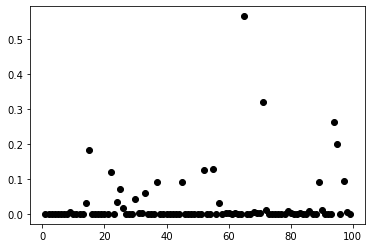

In [241]:
pyplot.scatter(df_list_features['lista_camadas_neuronios'][1:100], df_list_features['list_rmspe'][1:100], color='black')

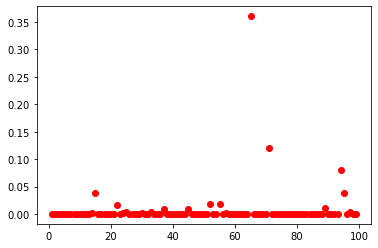

In [242]:
pyplot.scatter(df_list_features['lista_camadas_neuronios'][1:100], df_list_features['list_mse'][1:100], color='red')

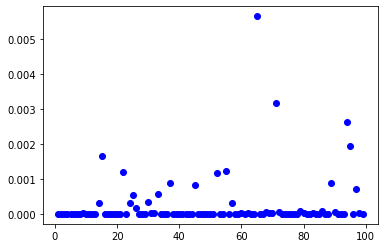

In [243]:
pyplot.scatter(df_list_features['lista_camadas_neuronios'][1:100], df_list_features['list_mape'][1:100], color='blue')

In [221]:
#--------- definicao dos ranges das variaveis ---------
x_limite_inferior = 1
y_limite_inferior = 1
x_limite_superior = 100
y_limite_superior = 100
qtdd_amostras = 10000

#--------- Vetor dos ranges das variaveis ---------
X = np.random.randint(x_limite_inferior, x_limite_superior, (qtdd_amostras))
Y = np.random.randint(y_limite_inferior, y_limite_superior, (qtdd_amostras))

#--------- Vetor dos ranges das variaveis ---------
lista_camadas_neuronios = range(1000)

#--------- definicao da funcao resultante ---------
def function(X,Y):
    return X * Y
Z = function(X,Y)

# ---------------------- Informação a Priori ---------------------- 
df = pd.DataFrame(Z, columns = ['Z'])
df['X'] = X
df['Y'] = Y

# ----------- Base de teste e treinamento com informação a priori -----------
df_train, df_test = train_test_split(df, test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# ---------------- Escolha dos parametros de entrada para a Rede Neural ----------------
columns_features_train = ['X', 'Y']
columns_features_predict = columns_features_train
input_numbers = len(columns_features_train)
target_train = ['Z']
output_numbers = len(target_train)

list_mape = []
list_mse = []
list_rmspe = []
error_list = []

for n_numbers in tqdm(lista_camadas_neuronios):
    # ---------------- Configuração da rede neural ----------------
    model = Sequential()
    model.add(Dense(units = input_numbers, activation = 'linear', input_dim=input_numbers))
    model.add(Dense(units = n_numbers, activation = 'linear'))
    model.add(Dense(units = output_numbers, activation = 'linear'))
    model.compile(loss='mse', optimizer="adam")

    # ---------------- treinamento da rede ----------------
    model.fit(df_train[columns_features_train], df_train[target_train],
              epochs=50, verbose=1, use_multiprocessing=True)

    # ---------------- Previsão dos dados de teste ----------------
    Z_Predict = model.predict(df_test[columns_features_train])
    df_test['Z_Predict'] = pd.DataFrame(Z_Predict).astype(float)

    # ---------------- Metricas de erros ----------------
    mape = mean_absolute_percentage_error(df_test['Z'], df_test['Z_Predict'])
    mse = mean_squared_error(df_test['Z'], df_test['Z_Predict'])
    rmspe = (np.sqrt(np.mean(np.square((df_test['Z'] - df_test['Z_Predict']) / df_test['Z'])))) * 100
    
    # ---------------- Append Errors in lists ----------------
    list_mape.append(mape)
    list_mse.append(mse)
    list_rmspe.append(rmspe)
    error_list.append([n_numbers, mape, mse, rmspe])
    
    #print(f'Mean Absolute Percentage Error: {mape.round(2)}', f'Mean Squared Error: {mse.round(2)}', f'Mean Square Percentage Error: {rmspe.round(2)}')

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10895793.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 10895791.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 10895791.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 10895792.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 10895791.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 10895794.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 10895792.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 10895788.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 10895790.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 10895792.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 10895788.0000
Epoch 12/50
250/250 [=========

  0%|                                                                               | 1/1000 [00:24<6:40:25, 24.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10726436.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 9998985.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 8090096.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 5328207.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 2969507.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1846921.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1587967.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1557676.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1553183.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1550475.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1547443.5000
Epoch 12/50
250/250 [===================

  0%|▏                                                                              | 2/1000 [00:48<6:41:19, 24.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10727043.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 9995457.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 8202952.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 5070436.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 2579355.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1853958.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1752086.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1709253.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1673950.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1643254.5000
Epoch 11/50
250/250 [==============================] - 0s 964us/step - loss: 1617437.0000
Epoch 12/50
250/250 [=================

  0%|▏                                                                              | 3/1000 [01:11<6:32:39, 23.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9329571.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 6818498.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 3597035.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1849537.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1568725.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1553479.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1548024.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1543591.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1538555.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1534589.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1530271.2500
Epoch 12/50
250/250 [====================

  0%|▎                                                                              | 4/1000 [01:35<6:34:41, 23.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 10489696.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 8490109.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 4731327.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 2059430.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1608720.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1583575.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1572343.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1562315.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1553696.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1546354.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1539432.1250
Epoch 12/50
250/250 [===================

  0%|▍                                                                              | 5/1000 [02:01<6:50:33, 24.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10604650.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 8681096.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 4432815.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1826674.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1551873.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1545816.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1542624.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1539648.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1536413.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1532393.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1529633.1250
Epoch 12/50
250/250 [===================

  1%|▍                                                                              | 6/1000 [02:23<6:35:27, 23.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 10119335.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 6982805.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2818706.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1618633.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1562581.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1554723.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1548708.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1542546.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1537063.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1531347.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1526588.0000
Epoch 12/50
250/250 [===================

  1%|▌                                                                              | 7/1000 [02:48<6:36:52, 23.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10616247.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 7800827.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 3372045.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1682242.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1579305.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1568690.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1559137.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1550970.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1544340.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1537400.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1532006.2500
Epoch 12/50
250/250 [===================

  1%|▋                                                                              | 8/1000 [03:13<6:44:53, 24.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10366598.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 6982043.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2770437.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1713380.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1650870.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1620325.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1594389.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1573588.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1556902.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1544160.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1534082.1250
Epoch 12/50
250/250 [===================

  1%|▋                                                                              | 9/1000 [03:38<6:45:02, 24.52s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10416459.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 7040362.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2528175.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1583545.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1564249.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1555532.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1548448.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1541146.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1536060.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1530550.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1525333.1250
Epoch 12/50
250/250 [===================

  1%|▊                                                                             | 10/1000 [04:02<6:44:14, 24.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10317982.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 6589859.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2231724.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1631811.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1606348.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1584092.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1566948.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1551720.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1540496.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1531612.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1524405.7500
Epoch 12/50
250/250 [===================

  1%|▊                                                                             | 11/1000 [04:28<6:51:13, 24.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 10545043.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 7147920.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2679370.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1858576.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1772835.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1706986.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1655406.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1615430.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1584309.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1562243.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1544269.5000
Epoch 12/50
250/250 [===================

  1%|▉                                                                             | 12/1000 [04:53<6:52:27, 25.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10538059.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 7625941.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2822654.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1657405.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1615418.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1591368.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1572203.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1556871.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1544239.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1534217.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1525771.8750
Epoch 12/50
250/250 [===================

  1%|█                                                                             | 13/1000 [05:19<6:54:19, 25.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9694583.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 5002318.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1766683.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1559839.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1552205.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1544530.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1537762.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1531838.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1525684.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1520705.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1515141.2500
Epoch 12/50
250/250 [====================

  1%|█                                                                             | 14/1000 [05:45<6:58:34, 25.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10204132.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 6367204.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2084969.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1550507.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1545123.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1540376.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1536313.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1530501.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1526278.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1520686.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1515031.5000
Epoch 12/50
250/250 [===================

  2%|█▏                                                                            | 15/1000 [06:11<7:00:56, 25.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10322896.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 5928214.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1817298.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1558910.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1548487.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1542867.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1535717.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1529853.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1524491.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1517600.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1511882.2500
Epoch 12/50
250/250 [===================

  2%|█▏                                                                            | 16/1000 [06:37<7:01:12, 25.68s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9362647.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4213393.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1637282.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1562307.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1552073.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1543083.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1535636.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1529104.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1522384.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1515898.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1509829.6250
Epoch 12/50
250/250 [====================

  2%|█▎                                                                            | 17/1000 [07:03<7:00:24, 25.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9727117.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 4418534.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1636069.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1555637.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1547859.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1540907.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1534980.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1529262.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1522599.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1517300.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1511916.2500
Epoch 12/50
250/250 [====================

  2%|█▍                                                                            | 18/1000 [07:28<6:58:25, 25.57s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 10050746.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4752212.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1789988.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1666374.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1626840.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1594077.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1569382.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1550541.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1536189.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1523771.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1516561.0000
Epoch 12/50
250/250 [===================

  2%|█▍                                                                            | 19/1000 [07:55<7:05:41, 26.04s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 10126013.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 4769234.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1617480.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1554671.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1546330.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1538527.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1531793.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1524492.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1518193.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1509837.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1502560.1250
Epoch 12/50
250/250 [===================

  2%|█▌                                                                            | 20/1000 [08:21<7:04:16, 25.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9993111.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 4817576.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1713431.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1589216.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1572731.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1558363.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1546237.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1536776.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1528208.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1519286.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1514172.3750
Epoch 12/50
250/250 [====================

  2%|█▋                                                                            | 21/1000 [08:47<7:02:59, 25.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 8784302.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3339906.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1591213.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1561539.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1550287.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1540547.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1530933.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1524645.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1517767.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1511198.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1505726.0000
Epoch 12/50
250/250 [====================

  2%|█▋                                                                            | 22/1000 [09:12<6:59:55, 25.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9116160.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3521315.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1587539.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1556721.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1548156.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1539556.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1531865.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1525219.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1517658.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1510798.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1504903.0000
Epoch 12/50
250/250 [====================

  2%|█▊                                                                            | 23/1000 [09:38<7:00:00, 25.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9648924.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 4008598.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1594206.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1554290.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1545895.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1538150.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1531024.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1523981.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1517617.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1511263.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1504131.3750
Epoch 12/50
250/250 [====================

  2%|█▊                                                                            | 24/1000 [10:04<7:01:53, 25.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9408260.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3807802.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1685531.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1621637.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1590991.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1566704.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1548844.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1536065.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1525931.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1518716.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1511086.6250
Epoch 12/50
250/250 [====================

  2%|█▉                                                                            | 25/1000 [10:30<7:01:28, 25.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9412750.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3391216.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1568076.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1550774.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1543267.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1536391.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1528964.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1522909.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1517120.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1510039.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1505248.5000
Epoch 12/50
250/250 [====================

  3%|██                                                                            | 26/1000 [10:56<7:00:48, 25.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9671717.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3979123.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1612687.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1569326.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1553670.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1543184.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1531976.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1525085.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1517857.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1510548.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1504787.7500
Epoch 12/50
250/250 [====================

  3%|██                                                                            | 27/1000 [11:22<7:00:15, 25.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9913682.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4160476.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1591066.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1555845.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1546659.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1537583.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1529250.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1522286.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1515413.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1506344.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1500837.6250
Epoch 12/50
250/250 [====================

  3%|██▏                                                                           | 28/1000 [11:48<7:02:17, 26.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9698839.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3844835.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1767263.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1671492.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1611199.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1572776.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1548184.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1532671.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1520938.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1512235.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1504074.6250
Epoch 12/50
250/250 [====================

  3%|██▎                                                                           | 29/1000 [12:14<7:00:33, 25.99s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9997930.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 4077375.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1794190.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1690478.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1624941.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1581316.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1553082.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1534951.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1521208.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1511304.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1502580.3750
Epoch 12/50
250/250 [====================

  3%|██▎                                                                         | 30/1000 [30:31<93:33:10, 347.21s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 10024923.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3812693.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1592494.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1562823.1250
Epoch 5/50
250/250 [==============================] - 0s 808us/step - loss: 1546658.3750
Epoch 6/50
250/250 [==============================] - 0s 962us/step - loss: 1535205.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1526157.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1517953.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1509354.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1500752.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1492593.1250
Epoch 12/50
250/250 [===============

  3%|██▎                                                                         | 31/1000 [30:55<67:23:32, 250.37s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8869922.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2689720.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1555872.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1546825.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1540340.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1532451.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1525839.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1520165.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1513879.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1507683.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1501921.0000
Epoch 12/50
250/250 [====================

  3%|██▎                                                                      | 32/1000 [1:09:30<233:50:34, 869.66s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 9939322.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 4381989.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2089725.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1895177.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1769526.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1682384.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1622887.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1581183.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1552167.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1532515.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1517999.6250
Epoch 12/50
250/250 [====================

  3%|██▍                                                                      | 33/1000 [1:10:01<165:59:46, 617.98s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 9774344.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3610607.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1798315.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1699843.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1631046.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1585129.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1553578.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1533168.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1519508.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1507915.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1496951.1250
Epoch 12/50
250/250 [====================

  3%|██▍                                                                      | 34/1000 [1:10:31<118:32:01, 441.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 9973945.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3698645.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1568734.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1552899.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1542317.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1533396.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1523672.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1514799.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1506453.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1497981.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1487628.2500
Epoch 12/50
250/250 [====================

  4%|██▌                                                                       | 35/1000 [1:11:03<85:27:49, 318.83s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8625041.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2555396.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1577232.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1562339.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1550379.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1540332.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1529980.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1521894.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1514759.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1507464.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1501920.3750
Epoch 12/50
250/250 [====================

  4%|██▋                                                                       | 36/1000 [1:11:36<62:23:46, 233.01s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8849409.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2661323.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1548898.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1540841.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1534749.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1529808.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1520627.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1513614.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1505761.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1498618.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1490427.5000
Epoch 12/50
250/250 [====================

  4%|██▋                                                                       | 37/1000 [1:12:09<46:14:33, 172.87s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 9006721.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2799102.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1562819.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1551644.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1541943.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1532443.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1526700.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1518953.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1512125.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1505499.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1498188.5000
Epoch 12/50
250/250 [====================

  4%|██▊                                                                       | 38/1000 [1:12:41<34:54:53, 130.66s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 9920766.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 4182862.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2515246.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 2162485.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1934142.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1778869.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1672669.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1603779.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1558734.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1531129.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1511751.7500
Epoch 12/50
250/250 [====================

  4%|██▉                                                                       | 39/1000 [1:13:12<26:57:13, 100.97s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8276803.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2432746.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1603392.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1576239.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1557036.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1541543.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1528991.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1520255.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1511329.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1505039.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1497694.0000
Epoch 12/50
250/250 [====================

  4%|███                                                                        | 40/1000 [1:13:43<21:19:56, 80.00s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8797955.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2634008.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1638239.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1601040.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1572489.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1549219.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1532443.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1520338.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1510501.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1500808.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1491350.5000
Epoch 12/50
250/250 [====================

  4%|███                                                                        | 41/1000 [1:14:15<17:27:01, 65.51s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 9244147.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2847436.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1589161.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1567242.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1548777.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1535228.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1523806.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1513818.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1506149.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1496768.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1487878.2500
Epoch 12/50
250/250 [====================

  4%|███▏                                                                       | 42/1000 [1:14:46<14:40:47, 55.16s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8616159.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2364085.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1549562.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1542204.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1535073.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1528534.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1522640.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1516140.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1509955.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1502898.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1496779.1250
Epoch 12/50
250/250 [====================

  4%|███▏                                                                       | 43/1000 [1:15:17<12:44:55, 47.96s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 9371549.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2891581.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1614960.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1579947.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1555542.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1537729.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1526172.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1514338.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1506320.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1497375.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1487711.1250
Epoch 12/50
250/250 [====================

  4%|███▎                                                                       | 44/1000 [1:15:48<11:22:31, 42.84s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 9809064.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 3045933.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1562541.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1549801.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1538345.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1527186.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1518347.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1508379.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1498771.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1487982.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1476411.1250
Epoch 12/50
250/250 [====================

  4%|███▍                                                                       | 45/1000 [1:16:20<10:29:19, 39.54s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 9118779.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2527236.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1550227.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1542170.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1534515.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1526340.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1518450.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1510109.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1501830.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1492779.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1484162.5000
Epoch 12/50
250/250 [====================

  5%|███▍                                                                       | 46/1000 [1:16:54<10:00:48, 37.79s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 9140572.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3198737.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2048129.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1876266.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1757420.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1675020.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1617336.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1574668.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1545655.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1526664.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1509067.5000
Epoch 12/50
250/250 [====================

  5%|███▌                                                                        | 47/1000 [1:17:27<9:39:25, 36.48s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8422667.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2226247.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1615353.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1584632.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1561685.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1543265.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1528350.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1517095.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1506216.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1496841.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1488050.8750
Epoch 12/50
250/250 [====================

  5%|███▋                                                                        | 48/1000 [1:18:00<9:20:30, 35.33s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 9171252.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2542469.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1547366.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1540563.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1532970.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1525422.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1518634.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1510264.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1503130.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1492937.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1485159.0000
Epoch 12/50
250/250 [====================

  5%|███▋                                                                        | 49/1000 [1:18:32<9:05:46, 34.43s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8180637.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1995935.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1550868.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1541710.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1534254.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1525894.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1519035.8750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1510838.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1503867.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1496400.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1489173.5000
Epoch 12/50
250/250 [====================

  5%|███▊                                                                        | 50/1000 [1:19:05<8:59:36, 34.08s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7571218.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1901725.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1569259.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1554974.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1544439.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1533743.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1524036.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1514207.1250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1507770.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1501411.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1493450.7500
Epoch 12/50
250/250 [====================

  5%|███▉                                                                        | 51/1000 [1:19:39<8:55:02, 33.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 9050129.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2379126.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1552664.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1542618.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1533383.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1523379.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1515031.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1504301.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1494052.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1485482.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1476048.7500
Epoch 12/50
250/250 [====================

  5%|███▉                                                                        | 52/1000 [1:20:12<8:53:55, 33.79s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8641566.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2456434.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1672958.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1593269.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1554088.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1534604.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1523920.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1515095.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1508179.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1501781.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1493553.6250
Epoch 12/50
250/250 [====================

  5%|████                                                                        | 53/1000 [1:20:45<8:46:05, 33.33s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8405000.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2254022.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1638376.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1587330.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1556483.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1537575.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1525555.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1516416.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1509082.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1500713.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1493340.8750
Epoch 12/50
250/250 [====================

  5%|████                                                                        | 54/1000 [1:21:17<8:41:44, 33.09s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8686436.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2385149.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1662068.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1616085.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1581511.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1555783.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1538398.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1523525.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1512721.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1503208.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1494815.6250
Epoch 12/50
250/250 [====================

  6%|████▏                                                                       | 55/1000 [1:21:50<8:38:05, 32.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8032856.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1966901.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1580229.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1560234.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1544238.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1531352.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1520573.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1509175.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1501084.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1494977.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1483363.1250
Epoch 12/50
250/250 [====================

  6%|████▎                                                                       | 56/1000 [1:22:22<8:36:53, 32.85s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 9388669.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2483836.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1553370.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1543330.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1532418.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1524076.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1512835.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1501984.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1493663.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1479980.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1468603.6250
Epoch 12/50
250/250 [====================

  6%|████▎                                                                       | 57/1000 [1:22:54<8:31:44, 32.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8326816.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2345646.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1733434.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1636693.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1581207.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1548165.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1530106.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1516665.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1507998.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1498672.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1491595.0000
Epoch 12/50
250/250 [====================

  6%|████▍                                                                       | 58/1000 [1:23:27<8:33:58, 32.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7327679.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1804674.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1548128.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1539095.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1530461.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1521835.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1514663.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1506861.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1498830.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1489661.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1481507.1250
Epoch 12/50
250/250 [====================

  6%|████▍                                                                       | 59/1000 [1:24:01<8:38:47, 33.08s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 9167838.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2599875.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1720719.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1634000.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1580801.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1547600.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1526605.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1512326.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1500194.3750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1488368.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1476682.8750
Epoch 12/50
250/250 [====================

  6%|████▌                                                                       | 60/1000 [1:24:36<8:44:54, 33.50s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8112573.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2264470.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1801894.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1701852.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1633251.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1584626.0000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1552805.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1529131.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1511971.1250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1498710.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1485992.3750
Epoch 12/50
250/250 [====================

  6%|████▋                                                                       | 61/1000 [1:25:10<8:49:45, 33.85s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8146291.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1989521.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1544423.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1537926.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1529798.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1521534.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1514554.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1506862.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1498703.1250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1488881.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1480439.1250
Epoch 12/50
250/250 [====================

  6%|████▋                                                                       | 62/1000 [1:25:44<8:46:00, 33.65s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8478545.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2046525.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1560453.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1546499.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1535773.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1523593.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1515732.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1507593.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1499055.3750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1490915.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1481994.8750
Epoch 12/50
250/250 [====================

  6%|████▊                                                                       | 63/1000 [1:26:17<8:43:31, 33.52s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8834149.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2671649.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1971841.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1790958.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1676894.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1602684.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1557107.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1529348.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1510225.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1498302.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1488096.3750
Epoch 12/50
250/250 [====================

  6%|████▊                                                                       | 64/1000 [1:26:49<8:38:08, 33.21s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8132728.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1907551.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1557703.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1543914.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1533219.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1523469.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1514639.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1506603.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1498590.1250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1488903.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1481804.3750
Epoch 12/50
250/250 [====================

  6%|████▉                                                                       | 65/1000 [1:27:22<8:35:18, 33.07s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8311075.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2132958.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1645742.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1587334.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1552881.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1529737.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1513462.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1501725.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1490618.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1480257.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1469107.8750
Epoch 12/50
250/250 [====================

  7%|█████                                                                       | 66/1000 [1:27:54<8:31:51, 32.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8906668.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2619629.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1845645.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1699836.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1614223.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1564583.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1536727.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1517384.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1504779.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1493869.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1484767.2500
Epoch 12/50
250/250 [====================

  7%|█████                                                                       | 67/1000 [1:28:28<8:33:01, 32.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8539096.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2071235.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1571007.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1550529.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1535182.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1524567.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1514443.8750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1506520.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1498714.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1490326.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1480669.1250
Epoch 12/50
250/250 [====================

  7%|█████▏                                                                      | 68/1000 [1:29:00<8:30:55, 32.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8768495.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2359446.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1774846.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1676522.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1608986.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1565824.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1535852.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1515355.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1498891.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1487123.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1475644.3750
Epoch 12/50
250/250 [====================

  7%|█████▏                                                                      | 69/1000 [1:29:32<8:25:56, 32.61s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8606138.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2011776.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1556559.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1541944.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1531003.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1521633.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1511779.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1499319.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1490443.3750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1478525.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1465937.8750
Epoch 12/50
250/250 [====================

  7%|█████▎                                                                      | 70/1000 [1:30:06<8:28:53, 32.83s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8020123.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1839419.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1548563.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1538913.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1528932.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1518331.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1508563.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1498338.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1488051.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1477479.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1467136.2500
Epoch 12/50
250/250 [====================

  7%|█████▍                                                                      | 71/1000 [1:30:38<8:27:26, 32.77s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8447410.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2690071.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 2125023.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1918558.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1780591.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1683129.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1616223.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1569454.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1538260.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1513554.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1497650.3750
Epoch 12/50
250/250 [====================

  7%|█████▍                                                                      | 72/1000 [1:31:11<8:26:23, 32.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7908890.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1970527.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1646298.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1602173.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1566886.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1542217.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1524651.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1511169.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1498082.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1486546.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1477090.5000
Epoch 12/50
250/250 [====================

  7%|█████▌                                                                      | 73/1000 [1:31:43<8:20:52, 32.42s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8882204.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2317187.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1670590.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1598102.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1555779.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1532738.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1517723.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1505975.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1495517.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1483923.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1475841.1250
Epoch 12/50
250/250 [====================

  7%|█████▌                                                                      | 74/1000 [1:32:17<8:30:22, 33.07s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7871124.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1810292.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1547201.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1537169.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1526440.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1518300.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1506863.8750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1496610.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1487221.3750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1476345.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1464446.5000
Epoch 12/50
250/250 [====================

  8%|█████▋                                                                      | 75/1000 [1:32:50<8:26:51, 32.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8717761.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2090868.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1571467.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1551718.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1535192.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1522655.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1511162.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1500596.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1489792.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1477458.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1466016.1250
Epoch 12/50
250/250 [====================

  8%|█████▊                                                                      | 76/1000 [1:33:23<8:27:24, 32.95s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7262268.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1660360.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1549774.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1540466.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1530966.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1521531.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1514092.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1505091.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1498039.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1488296.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1480714.1250
Epoch 12/50
250/250 [====================

  8%|█████▊                                                                      | 77/1000 [1:33:54<8:21:08, 32.58s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8398803.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1953154.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1596491.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1569131.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1547505.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1530463.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1516513.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1507422.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1495275.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1486643.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1476871.1250
Epoch 12/50
250/250 [====================

  8%|█████▉                                                                      | 78/1000 [1:34:28<8:24:03, 32.80s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8965499.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2018323.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1555854.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1543032.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1528648.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1515373.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1502941.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1487885.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1475572.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1461471.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1446143.2500
Epoch 12/50
250/250 [====================

  8%|██████                                                                      | 79/1000 [1:35:00<8:22:02, 32.71s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7013878.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1621351.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1540329.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1533680.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1526195.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1516823.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1509426.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1501672.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1494962.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1483688.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1474074.1250
Epoch 12/50
250/250 [====================

  8%|██████                                                                      | 80/1000 [1:35:32<8:18:08, 32.49s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7894737.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1802506.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1571514.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1550995.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1534898.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1521903.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1511222.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1499804.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1489920.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1478883.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1468169.6250
Epoch 12/50
250/250 [====================

  8%|██████▏                                                                     | 81/1000 [1:36:05<8:19:23, 32.60s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8009993.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1791985.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1553772.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1539202.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1529214.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1519049.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1510329.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1502260.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1491886.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1481886.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1473319.7500
Epoch 12/50
250/250 [====================

  8%|██████▏                                                                     | 82/1000 [1:36:37<8:16:39, 32.46s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7849334.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1794609.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1591680.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1561927.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1540919.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1523216.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1511521.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1500412.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1489242.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1478517.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1468520.1250
Epoch 12/50
250/250 [====================

  8%|██████▎                                                                     | 83/1000 [1:37:10<8:18:03, 32.59s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8160180.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1818951.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1544099.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1534279.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1526245.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1517227.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1509379.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1497563.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1487174.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1479968.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1469526.7500
Epoch 12/50
250/250 [====================

  8%|██████▍                                                                     | 84/1000 [1:37:42<8:15:14, 32.44s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8430250.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1888902.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1555815.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1541382.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1528393.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1516523.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1506776.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1494389.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1482079.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1473059.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1460893.0000
Epoch 12/50
250/250 [====================

  8%|██████▍                                                                     | 85/1000 [1:38:14<8:13:45, 32.38s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7034955.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1703933.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1594925.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1568094.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1545846.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1529180.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1516109.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1505024.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1494026.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1484188.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1473874.2500
Epoch 12/50
250/250 [====================

  9%|██████▌                                                                     | 86/1000 [1:38:46<8:10:50, 32.22s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 8250012.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2194849.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1819166.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1705852.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1626805.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1573043.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1537974.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1515008.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1496893.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1482806.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1470641.6250
Epoch 12/50
250/250 [====================

  9%|██████▌                                                                     | 87/1000 [1:39:21<8:20:24, 32.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8842608.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2030156.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1609353.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1563020.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1535277.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1515737.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1502150.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1487671.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1473366.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1458822.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1443303.5000
Epoch 12/50
250/250 [====================

  9%|██████▋                                                                     | 88/1000 [1:39:54<8:22:28, 33.06s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7964124.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1937459.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1675313.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1610883.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1567497.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1539178.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1517609.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1501808.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1487567.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1478025.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1464179.3750
Epoch 12/50
250/250 [====================

  9%|██████▊                                                                     | 89/1000 [1:40:27<8:22:12, 33.08s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7842326.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2085803.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1673157.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1574338.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1539080.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1521841.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1512223.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1501362.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1491650.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1482476.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1471823.2500
Epoch 12/50
250/250 [====================

  9%|██████▊                                                                     | 90/1000 [1:41:00<8:18:59, 32.90s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7844890.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1707538.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1546287.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1534672.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1524683.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1513502.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1504624.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1493489.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1484190.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1469892.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1459162.8750
Epoch 12/50
250/250 [====================

  9%|██████▉                                                                     | 91/1000 [1:41:33<8:20:29, 33.04s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7552061.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1666745.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1550352.7500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1538010.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1527783.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1518412.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1508599.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1499417.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1489622.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1478991.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1467754.0000
Epoch 12/50
250/250 [====================

  9%|██████▉                                                                     | 92/1000 [1:42:07<8:21:40, 33.15s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7609706.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1673108.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1547184.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1534364.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1524068.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1513103.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1501921.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1492411.1250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1478914.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1466325.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1455497.2500
Epoch 12/50
250/250 [====================

  9%|███████                                                                     | 93/1000 [1:42:39<8:18:41, 32.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6827366.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1600477.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1547357.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1536900.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1526267.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1515338.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1507825.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1496930.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1486817.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1479128.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1468297.6250
Epoch 12/50
250/250 [====================

  9%|███████▏                                                                    | 94/1000 [1:43:13<8:21:12, 33.19s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7687172.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1664833.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1542147.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1533168.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1524245.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1514280.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1505257.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1494338.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1485352.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1473616.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1464904.6250
Epoch 12/50
250/250 [====================

 10%|███████▏                                                                    | 95/1000 [1:43:46<8:21:39, 33.26s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8019463.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2335758.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1852982.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1669126.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1579185.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1536355.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1516683.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1501530.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1487027.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1476468.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1467131.6250
Epoch 12/50
250/250 [====================

 10%|███████▎                                                                    | 96/1000 [1:44:20<8:24:00, 33.45s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7734691.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1719934.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1560241.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1538166.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1524315.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1514532.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1502372.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1492681.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1479961.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1468348.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1457651.0000
Epoch 12/50
250/250 [====================

 10%|███████▎                                                                    | 97/1000 [1:44:53<8:20:21, 33.25s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7151531.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1610564.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1539511.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1530675.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1522789.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1513107.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1504881.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1493004.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1486129.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1473902.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1463649.1250
Epoch 12/50
250/250 [====================

 10%|███████▍                                                                    | 98/1000 [1:45:26<8:19:31, 33.23s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8506725.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2198070.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1772777.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1634652.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1564145.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1526714.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1506798.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1491424.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1476769.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1461350.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1448232.2500
Epoch 12/50
250/250 [====================

 10%|███████▌                                                                    | 99/1000 [1:45:59<8:17:21, 33.12s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7253553.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1614104.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1539498.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1529063.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1524139.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1515135.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1505566.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1496977.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1488700.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1479046.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1469020.0000
Epoch 12/50
250/250 [====================

 10%|███████▌                                                                   | 100/1000 [1:46:33<8:21:59, 33.47s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6993995.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1602304.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1539065.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1531790.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1522412.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1514447.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1503957.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1493370.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1486782.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1476552.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1467495.7500
Epoch 12/50
250/250 [====================

 10%|███████▌                                                                   | 101/1000 [1:47:08<8:26:21, 33.80s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7103228.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1606833.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1543777.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1534304.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1524815.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1514300.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1504625.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1495697.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1485344.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1475874.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1464887.6250
Epoch 12/50
250/250 [====================

 10%|███████▋                                                                   | 102/1000 [1:47:41<8:21:29, 33.51s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8244344.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1942854.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1681139.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1603775.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1556149.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1527273.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1506812.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1491594.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1478507.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1463695.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1450779.0000
Epoch 12/50
250/250 [====================

 10%|███████▋                                                                   | 103/1000 [1:48:14<8:21:46, 33.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8037200.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2419442.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1968410.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1773592.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1657591.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1583877.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1542403.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1514402.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1497019.3750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1482432.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1470680.1250
Epoch 12/50
250/250 [====================

 10%|███████▊                                                                   | 104/1000 [1:48:47<8:18:59, 33.41s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8042321.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1812273.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1567057.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1539428.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1525478.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1514140.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1502289.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1491539.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1479158.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1466624.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1450686.2500
Epoch 12/50
250/250 [====================

 10%|███████▉                                                                   | 105/1000 [1:49:21<8:18:54, 33.45s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7842258.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2284159.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1779335.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1605944.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1541176.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1519033.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1506052.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1493898.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1483323.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1471024.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1459331.6250
Epoch 12/50
250/250 [====================

 11%|███████▉                                                                   | 106/1000 [1:49:54<8:14:25, 33.18s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8019778.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1909484.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1584673.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1539336.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1524662.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1516484.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1506779.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1495336.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1484521.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1473225.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1460447.1250
Epoch 12/50
250/250 [====================

 11%|████████                                                                   | 107/1000 [1:50:27<8:12:51, 33.11s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8101462.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1718185.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1544514.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1534100.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1523356.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1510129.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1498739.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1486252.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1473518.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1459870.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1446675.8750
Epoch 12/50
250/250 [====================

 11%|████████                                                                   | 108/1000 [1:50:59<8:07:56, 32.82s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7228089.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1728795.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1617454.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1572289.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1544053.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1523723.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1508675.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1498613.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1487378.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1477400.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1464703.5000
Epoch 12/50
250/250 [====================

 11%|████████▏                                                                  | 109/1000 [1:51:31<8:06:49, 32.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7272225.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1701213.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1588928.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1550205.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1527866.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1513045.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1500877.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1489369.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1477879.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1464701.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1452100.5000
Epoch 12/50
250/250 [====================

 11%|████████▎                                                                  | 110/1000 [1:52:04<8:07:23, 32.86s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7908449.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1835294.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1600794.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1549307.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1527392.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1513602.0000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1501902.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1491259.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1479991.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1467993.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1454318.6250
Epoch 12/50
250/250 [====================

 11%|████████▎                                                                  | 111/1000 [1:52:37<8:06:58, 32.87s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7534101.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1625149.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1542868.7500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1531344.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1520389.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1507954.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1496729.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1481797.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1470294.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1457426.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1444380.7500
Epoch 12/50
250/250 [====================

 11%|████████▍                                                                  | 112/1000 [1:53:09<8:03:39, 32.68s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7403714.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1704958.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1588062.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1560710.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1538349.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1521968.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1507792.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1494647.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1484178.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1472173.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1462717.8750
Epoch 12/50
250/250 [====================

 11%|████████▍                                                                  | 113/1000 [1:53:40<7:55:39, 32.18s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8864306.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3597477.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2729054.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 2325924.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 2069745.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1893639.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1765601.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1673000.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1605944.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1556472.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1525254.8750
Epoch 12/50
250/250 [====================

 11%|████████▌                                                                  | 114/1000 [1:54:12<7:52:18, 31.98s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 6998410.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1697025.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1597600.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1559505.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1537591.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1520676.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1507136.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1497233.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1486540.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1476207.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1466803.7500
Epoch 12/50
250/250 [====================

 12%|████████▋                                                                  | 115/1000 [1:54:45<7:56:17, 32.29s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7211766.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1597130.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1542028.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1531464.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1521099.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1509892.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1499636.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1487119.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1477073.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1463839.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1451932.5000
Epoch 12/50
250/250 [====================

 12%|████████▋                                                                  | 116/1000 [1:55:17<7:54:09, 32.18s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6925344.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1583684.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1544129.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1532900.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1522327.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1508174.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1503022.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1488426.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1477158.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1465342.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1453435.3750
Epoch 12/50
250/250 [====================

 12%|████████▊                                                                  | 117/1000 [1:55:48<7:50:23, 31.96s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7242761.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1841371.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1703636.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1630993.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1581262.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1547411.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1520671.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1502598.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1487977.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1474810.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1460927.5000
Epoch 12/50
250/250 [====================

 12%|████████▊                                                                  | 118/1000 [1:56:20<7:47:08, 31.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6796546.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1572673.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1539311.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1528581.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1520086.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1510393.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1498873.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1488284.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1479223.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1466595.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1454580.0000
Epoch 12/50
250/250 [====================

 12%|████████▉                                                                  | 119/1000 [1:56:50<7:40:20, 31.35s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7947699.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1663099.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1545006.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1533243.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1521446.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1507220.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1495071.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1480453.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1464081.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1450239.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1436777.0000
Epoch 12/50
250/250 [====================

 12%|████████▉                                                                 | 120/1000 [2:00:04<19:36:54, 80.24s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7253394.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1613950.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1547368.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1533775.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1521639.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1509179.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1497310.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1482337.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1473140.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1459364.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1446268.2500
Epoch 12/50
250/250 [====================

 12%|████████▉                                                                 | 121/1000 [2:00:36<15:59:57, 65.53s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7741041.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1815327.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1566602.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1536167.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1524768.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1512040.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1501663.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1487947.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1476076.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1462651.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1449165.1250
Epoch 12/50
250/250 [====================

 12%|█████████                                                                 | 122/1000 [2:01:08<13:31:27, 55.45s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7319312.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1733165.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1627009.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1578242.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1545754.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1524939.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1504394.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1490852.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1476370.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1464491.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1450489.0000
Epoch 12/50
250/250 [====================

 12%|█████████                                                                 | 123/1000 [2:01:39<11:44:34, 48.20s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8509943.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3628604.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2822681.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 2401531.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 2115148.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1904747.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1743106.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1625770.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1547932.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1505329.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1480525.2500
Epoch 12/50
250/250 [====================

 12%|█████████▏                                                                | 124/1000 [2:02:10<10:30:06, 43.16s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7238835.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1655465.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1580427.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1550607.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1527499.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1512260.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1500669.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1486876.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1474257.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1460712.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1447341.2500
Epoch 12/50
250/250 [====================

 12%|█████████▍                                                                 | 125/1000 [2:02:41<9:36:45, 39.55s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7712186.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1634666.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1545211.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1531007.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1520027.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1507337.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1494535.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1478331.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1467660.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1452366.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1438205.1250
Epoch 12/50
250/250 [====================

 13%|█████████▍                                                                 | 126/1000 [2:03:13<9:01:12, 37.15s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6881232.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1589262.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1554200.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1537200.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1523916.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1510688.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1504065.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1491898.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1480619.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1470225.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1459290.6250
Epoch 12/50
250/250 [====================

 13%|█████████▌                                                                 | 127/1000 [2:03:44<8:32:29, 35.22s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7029124.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2136451.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1880817.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1731639.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1636041.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1576730.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1534559.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1508659.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1490261.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1475498.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1460663.3750
Epoch 12/50
250/250 [====================

 13%|█████████▌                                                                 | 128/1000 [2:04:18<8:27:24, 34.91s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6082681.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1553487.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1536684.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1528570.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1519120.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1508565.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1501447.8750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1489467.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1478915.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1471501.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1456660.6250
Epoch 12/50
250/250 [====================

 13%|█████████▋                                                                 | 129/1000 [2:04:52<8:21:27, 34.54s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7675606.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1671242.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1566303.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1537405.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1520265.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1507129.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1493775.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1481062.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1466823.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1453347.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1438777.6250
Epoch 12/50
250/250 [====================

 13%|█████████▊                                                                 | 130/1000 [2:05:24<8:13:30, 34.03s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7189697.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1603053.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1550936.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1533330.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1521102.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1507831.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1495814.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1482679.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1470120.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1454557.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1442319.3750
Epoch 12/50
250/250 [====================

 13%|█████████▊                                                                 | 131/1000 [2:05:58<8:10:07, 33.84s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7460121.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1629871.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1557692.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1537358.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1519219.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1505629.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1491600.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1475939.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1460955.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1446236.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1430062.3750
Epoch 12/50
250/250 [====================

 13%|█████████▉                                                                 | 132/1000 [2:06:31<8:04:58, 33.52s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7368498.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1687041.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1582318.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1545189.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1523652.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1509855.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1496978.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1484873.1250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1471622.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1457594.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1446229.8750
Epoch 12/50
250/250 [====================

 13%|█████████▉                                                                 | 133/1000 [2:07:04<8:04:25, 33.52s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8277446.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1761019.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1555742.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1533861.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1518901.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1506923.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1488503.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1472629.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1455418.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1437573.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1418430.2500
Epoch 12/50
250/250 [====================

 13%|██████████                                                                 | 134/1000 [2:07:36<7:58:34, 33.16s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6643286.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1559489.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1538193.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1527768.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1516513.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1505697.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1494749.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1483472.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471895.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1459701.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1446159.0000
Epoch 12/50
250/250 [====================

 14%|██████████▏                                                                | 135/1000 [2:08:08<7:52:24, 32.77s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6647908.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1857991.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1730400.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1645038.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1589802.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1547030.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1518891.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1500244.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1482366.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1468992.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1454684.3750
Epoch 12/50
250/250 [====================

 14%|██████████▏                                                                | 136/1000 [2:08:40<7:49:03, 32.57s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7794331.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1962686.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1630175.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1547485.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1520466.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1504933.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1490738.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1473480.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1457825.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1440607.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1423299.2500
Epoch 12/50
250/250 [====================

 14%|██████████▎                                                                | 137/1000 [2:09:13<7:47:38, 32.51s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6757801.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2007137.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1724720.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1599825.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1541820.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1516402.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1502864.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1489416.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1475804.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1465899.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1452884.5000
Epoch 12/50
250/250 [====================

 14%|██████████▎                                                                | 138/1000 [2:09:44<7:42:25, 32.19s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6703161.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1562562.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1539099.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1527603.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1518085.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1506809.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1496839.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1482575.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1471317.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1456812.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1443551.2500
Epoch 12/50
250/250 [====================

 14%|██████████▍                                                                | 139/1000 [2:10:17<7:44:30, 32.37s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7804435.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1613318.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1544169.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1531715.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1517076.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1502356.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1488043.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1470340.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1457022.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1439721.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1421684.0000
Epoch 12/50
250/250 [====================

 14%|██████████▌                                                                | 140/1000 [2:10:50<7:44:50, 32.43s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6719736.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1589575.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1551568.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1532599.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1519004.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1503488.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1492653.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1481041.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1466874.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1452165.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1439174.8750
Epoch 12/50
250/250 [====================

 14%|██████████▌                                                                | 141/1000 [2:11:22<7:44:33, 32.45s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 5808510.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1557246.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1543927.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1532964.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1521417.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1509492.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1498741.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1491285.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1476435.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1466579.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1455172.1250
Epoch 12/50
250/250 [====================

 14%|██████████▋                                                                | 142/1000 [2:11:56<7:49:21, 32.82s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7280907.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1730979.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1626900.7500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1574330.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1540593.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1518215.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1498834.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1483256.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1469750.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1454443.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1439176.2500
Epoch 12/50
250/250 [====================

 14%|██████████▋                                                                | 143/1000 [2:12:28<7:48:27, 32.80s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7969683.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2308902.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1941335.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1756992.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1645651.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1577033.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1531890.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1502667.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1483325.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1463521.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1446981.6250
Epoch 12/50
250/250 [====================

 14%|██████████▊                                                                | 144/1000 [2:13:01<7:45:18, 32.62s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6870033.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1569908.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1540822.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1528389.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1516616.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1503809.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1495227.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1479585.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1467815.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1453642.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1440112.2500
Epoch 12/50
250/250 [====================

 14%|██████████▉                                                                | 145/1000 [2:13:32<7:41:26, 32.38s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6971595.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1566006.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1539144.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1527688.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1517360.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1504956.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1492843.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1481575.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1467224.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1454706.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1438645.0000
Epoch 12/50
250/250 [====================

 15%|██████████▉                                                                | 146/1000 [2:14:04<7:38:07, 32.19s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7733988.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2125206.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1718735.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1578609.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1530146.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1511269.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1495749.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1481232.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1466627.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1450920.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1435485.5000
Epoch 12/50
250/250 [====================

 15%|███████████                                                                | 147/1000 [2:14:36<7:35:52, 32.07s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5931524.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1613802.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1575177.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1549465.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1531570.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1517073.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1503164.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1490941.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1480947.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1469556.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1458745.8750
Epoch 12/50
250/250 [====================

 15%|██████████▋                                                             | 148/1000 [2:41:15<118:50:14, 502.13s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8936112.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1842150.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1554695.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1536159.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1519891.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1503790.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1485261.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1467906.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1447509.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1430652.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1408163.8750
Epoch 12/50
250/250 [====================

 15%|██████████▉                                                              | 149/1000 [2:41:49<85:29:21, 361.65s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7635783.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1625208.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1554255.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1531289.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1513874.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1497973.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1481120.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1464533.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1448408.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1430263.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1410641.1250
Epoch 12/50
250/250 [====================

 15%|██████████▉                                                              | 150/1000 [2:42:23<62:09:57, 263.29s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7433314.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1599209.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1541017.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1528836.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1515888.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1502386.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1488906.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1473859.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1458734.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1442205.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1426438.7500
Epoch 12/50
250/250 [====================

 15%|███████████                                                              | 151/1000 [2:42:56<45:48:02, 194.21s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6539510.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1709284.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1608640.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1556732.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1525856.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1507519.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1492913.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1480691.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1464321.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1453457.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1439567.8750
Epoch 12/50
250/250 [====================

 15%|███████████                                                              | 152/1000 [2:43:28<34:18:56, 145.68s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5643757.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1548440.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1536729.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1526675.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1516995.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1506144.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1495919.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1485755.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1473566.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1459470.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1447675.3750
Epoch 12/50
250/250 [====================

 15%|███████████▏                                                             | 153/1000 [2:44:01<26:19:23, 111.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7094927.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2083411.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1815641.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1675536.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1596112.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1542118.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1513408.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1493261.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1476836.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1460679.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1445905.7500
Epoch 12/50
250/250 [====================

 15%|███████████▍                                                              | 154/1000 [2:44:33<20:39:52, 87.93s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6110666.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1610924.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1569158.7500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1542940.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1523001.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1509890.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1495726.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1484402.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471248.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1456742.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1445484.0000
Epoch 12/50
250/250 [====================

 16%|███████████▍                                                              | 155/1000 [2:45:06<16:46:07, 71.44s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6614182.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1557868.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1536616.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1525610.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1513832.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1501497.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1486910.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1473365.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1461145.3750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1443901.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1428132.3750
Epoch 12/50
250/250 [====================

 16%|███████████▌                                                              | 156/1000 [2:45:41<14:10:02, 60.43s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7994639.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2272589.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1765426.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1592822.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1534078.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1508389.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1492711.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1476550.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1460300.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1443170.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1424873.5000
Epoch 12/50
250/250 [====================

 16%|███████████▌                                                              | 157/1000 [2:47:35<17:57:31, 76.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6922980.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1597498.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1546700.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1529287.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1518021.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1502608.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1490428.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1476838.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1462281.1250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1448247.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1432367.3750
Epoch 12/50
250/250 [====================

 16%|███████████▋                                                              | 158/1000 [2:48:08<14:48:52, 63.34s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6844267.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1616101.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1542398.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1530970.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1519727.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1507932.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1497835.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1482525.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471105.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1456107.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1446697.7500
Epoch 12/50
250/250 [====================

 16%|███████████▊                                                              | 159/1000 [2:48:41<12:43:38, 54.48s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8398807.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2484441.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 2006937.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1772424.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1643472.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1568621.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1521840.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1495987.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471523.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1451825.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1432702.8750
Epoch 12/50
250/250 [====================

 16%|███████████▊                                                              | 160/1000 [2:49:15<11:13:06, 48.08s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6415297.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1661435.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1575352.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1538944.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1521711.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1506704.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1496351.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1485769.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1473791.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1460621.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1447179.8750
Epoch 12/50
250/250 [====================

 16%|███████████▉                                                              | 161/1000 [2:49:48<10:11:15, 43.71s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5835192.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1553635.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1543032.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1528143.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1515814.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1505491.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1495853.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1484983.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1470496.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1456110.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1443058.1250
Epoch 12/50
250/250 [====================

 16%|████████████▏                                                              | 162/1000 [2:50:22<9:27:12, 40.61s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5954931.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1561207.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1545362.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1530986.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1518266.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1507051.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1495251.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1483277.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1471854.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1458628.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1446888.5000
Epoch 12/50
250/250 [====================

 16%|████████████▏                                                              | 163/1000 [2:50:55<8:57:06, 38.50s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7346860.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2095472.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1743407.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1594265.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1534966.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1509104.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1494197.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1478736.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1463709.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1449468.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1430908.0000
Epoch 12/50
250/250 [====================

 16%|████████████▎                                                              | 164/1000 [2:51:29<8:36:29, 37.07s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5607871.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1572543.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1551378.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1533287.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1519854.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1507941.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1495294.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1485167.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1474057.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1461260.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1449151.8750
Epoch 12/50
250/250 [====================

 16%|████████████                                                             | 165/1000 [3:03:47<57:24:21, 247.50s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6179472.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1550041.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1536477.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1525690.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1514038.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1501809.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1489590.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1476958.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1462437.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1449164.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1435257.5000
Epoch 12/50
250/250 [====================

 17%|████████████                                                             | 166/1000 [3:04:22<42:34:29, 183.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7567324.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2142895.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1823821.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1654886.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1566371.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1519735.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1494092.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1473392.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1453991.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1438690.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1420297.0000
Epoch 12/50
250/250 [====================

 17%|████████████▏                                                            | 167/1000 [3:04:54<31:58:17, 138.17s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6130734.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1637378.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1593351.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1558480.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1533731.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1515828.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1500323.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1485186.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1472036.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1458002.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1443164.8750
Epoch 12/50
250/250 [====================

 17%|████████████▎                                                            | 168/1000 [3:05:26<24:34:26, 106.33s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6711019.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1739076.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1644665.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1587026.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1548622.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1519780.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1500308.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1483391.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1466113.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1455124.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1437259.0000
Epoch 12/50
250/250 [====================

 17%|████████████▌                                                             | 169/1000 [3:05:59<19:25:09, 84.13s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6850956.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1615354.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1553140.7500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1528709.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1511693.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1497169.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1482450.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1468252.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1451950.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1432047.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1416324.0000
Epoch 12/50
250/250 [====================

 17%|████████████▌                                                             | 170/1000 [3:06:31<15:51:25, 68.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7717650.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1692173.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1582795.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1538848.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1513119.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1493905.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1475915.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1456489.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1436901.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1415063.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1394275.2500
Epoch 12/50
250/250 [====================

 17%|████████████▋                                                             | 171/1000 [3:07:03<13:16:52, 57.67s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7406485.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2044105.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1662346.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1554642.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1523794.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1506468.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1491964.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1476154.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1461964.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1447050.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1427670.6250
Epoch 12/50
250/250 [====================

 17%|████████████▋                                                             | 172/1000 [3:07:35<11:29:51, 49.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6487817.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1616863.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1546650.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1528476.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1514883.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1504020.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1492294.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1478079.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1466114.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1454791.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1437574.5000
Epoch 12/50
250/250 [====================

 17%|████████████▊                                                             | 173/1000 [3:08:07<10:14:12, 44.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5470857.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1544307.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1535019.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1525216.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1516151.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1504134.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1492935.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1485097.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471091.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1459341.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1448054.1250
Epoch 12/50
250/250 [====================

 17%|█████████████                                                              | 174/1000 [3:08:39<9:20:43, 40.73s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5623185.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1604522.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1573855.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1548548.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1529241.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1512630.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1497157.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1484264.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471550.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1458052.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1444666.8750
Epoch 12/50
250/250 [====================

 18%|█████████████▏                                                             | 175/1000 [3:09:12<8:46:19, 38.28s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6063064.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1690022.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1621232.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1571558.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1538096.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1516347.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1495608.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1479914.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1466707.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1452498.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1433283.3750
Epoch 12/50
250/250 [====================

 18%|█████████████▏                                                             | 176/1000 [3:09:44<8:19:55, 36.40s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8133682.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1814588.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1571149.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1531924.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1516925.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1497144.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1478476.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1459754.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1439368.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1417995.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1396705.0000
Epoch 12/50
250/250 [====================

 18%|█████████████▎                                                             | 177/1000 [3:10:15<8:00:23, 35.02s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5958448.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1580772.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1554993.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1536770.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1521023.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1506248.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1492247.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1481590.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1465903.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1451732.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1438840.7500
Epoch 12/50
250/250 [====================

 18%|█████████████▎                                                             | 178/1000 [3:10:47<7:45:36, 33.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7378239.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1803109.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1657823.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1582247.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1537834.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1510741.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1489733.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1472240.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1454134.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1436871.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1418333.5000
Epoch 12/50
250/250 [====================

 18%|█████████████▍                                                             | 179/1000 [3:11:19<7:36:08, 33.34s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 8139302.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3020103.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2405145.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 2070430.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1852666.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1707803.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1608766.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1545145.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1505875.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1476811.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1455074.0000
Epoch 12/50
250/250 [====================

 18%|█████████████▌                                                             | 180/1000 [3:11:49<7:24:48, 32.55s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6100347.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1666389.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1593006.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1551243.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1530368.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1510540.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1494115.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1483239.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1471460.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1456709.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1444837.1250
Epoch 12/50
250/250 [====================

 18%|█████████████▌                                                             | 181/1000 [3:12:21<7:19:56, 32.23s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6890200.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2000892.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1730706.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1599447.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1538511.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1508416.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1489020.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1476593.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1458785.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1441494.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1427375.8750
Epoch 12/50
250/250 [====================

 18%|█████████████▋                                                             | 182/1000 [3:12:52<7:15:12, 31.92s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6674429.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1556959.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1539251.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1523333.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1510777.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1497828.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1484592.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1465306.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1450647.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1436270.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1415680.3750
Epoch 12/50
250/250 [====================

 18%|█████████████▋                                                             | 183/1000 [3:13:28<7:32:22, 33.22s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5479222.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1545360.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1534503.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1523276.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1513273.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1504953.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1491602.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1480657.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1468238.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1454418.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1440193.2500
Epoch 12/50
250/250 [====================

 18%|█████████████▊                                                             | 184/1000 [3:14:03<7:37:25, 33.63s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6218848.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1634308.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1566979.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1533026.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1512722.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1498850.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1482985.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1466122.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1451764.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1436137.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1417682.1250
Epoch 12/50
250/250 [====================

 18%|█████████████▉                                                             | 185/1000 [3:14:37<7:40:09, 33.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7963352.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1842372.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1556896.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1531046.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1513245.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1495607.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1476289.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1456883.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1438007.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1416478.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1392077.8750
Epoch 12/50
250/250 [====================

 19%|█████████████▉                                                             | 186/1000 [3:15:13<7:45:33, 34.32s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5649668.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1581064.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1552084.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1533234.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1517219.1250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1504851.2500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1491628.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1481091.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1466456.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1452568.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1438996.6250
Epoch 12/50
250/250 [====================

 19%|██████████████                                                             | 187/1000 [3:15:47<7:45:05, 34.32s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6447941.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1831732.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1667573.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1583465.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1539954.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1515328.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1494986.2500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1479360.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1465379.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1451205.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1436175.5000
Epoch 12/50
250/250 [====================

 19%|██████████████                                                             | 188/1000 [3:16:22<7:47:32, 34.55s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7864469.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1716099.6250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1551183.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1531869.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1515130.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1495706.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1476340.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1457648.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1437332.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1413492.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1392203.0000
Epoch 12/50
250/250 [====================

 19%|██████████████▏                                                            | 189/1000 [3:16:57<7:48:34, 34.67s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7686557.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2499368.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1834037.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1594051.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1530379.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1506745.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1486864.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1468719.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1446416.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1425247.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1402610.7500
Epoch 12/50
250/250 [====================

 19%|██████████████▎                                                            | 190/1000 [3:17:33<7:50:53, 34.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6843890.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1864259.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1609273.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1537215.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1516468.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1500444.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1485934.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1472382.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1453958.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1438206.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1419912.2500
Epoch 12/50
250/250 [====================

 19%|██████████████▎                                                            | 191/1000 [3:18:07<7:49:52, 34.85s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6805010.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2223908.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1949432.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1781794.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1669341.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1598409.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1547105.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1514737.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1488561.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1465384.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1444595.1250
Epoch 12/50
250/250 [====================

 19%|██████████████▍                                                            | 192/1000 [3:18:41<7:45:10, 34.54s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6281516.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1610867.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1549179.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1528401.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1515166.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1500980.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1489025.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1475487.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1461208.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1446134.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1429443.5000
Epoch 12/50
250/250 [====================

 19%|██████████████▍                                                            | 193/1000 [3:19:15<7:41:42, 34.33s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5456609.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1556652.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1543084.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1528482.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1514174.7500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1502144.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1490518.8750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1477621.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1466435.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1451066.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1438494.3750
Epoch 12/50
250/250 [====================

 19%|██████████████▌                                                            | 194/1000 [3:19:48<7:37:46, 34.08s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6764236.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1712903.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1604565.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1549895.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1518005.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1496518.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1479994.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1462445.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1442382.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1425231.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1406511.1250
Epoch 12/50
250/250 [====================

 20%|██████████████▋                                                            | 195/1000 [3:20:23<7:38:43, 34.19s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6072285.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1552530.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1536479.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1523777.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1510004.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1495610.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1481738.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1465414.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1450937.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1434447.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1417207.2500
Epoch 12/50
250/250 [====================

 20%|██████████████▋                                                            | 196/1000 [3:20:55<7:31:12, 33.67s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6894601.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2314250.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1982600.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1787582.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1662077.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1582314.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1532036.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1499202.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1474380.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1453743.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1434112.8750
Epoch 12/50
250/250 [====================

 20%|██████████████▊                                                            | 197/1000 [3:21:30<7:34:15, 33.94s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7649874.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1574414.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1544199.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1526621.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1508917.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1490630.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1471531.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1448591.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1427937.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1403844.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1379763.7500
Epoch 12/50
250/250 [====================

 20%|██████████████▊                                                            | 198/1000 [3:22:03<7:30:04, 33.67s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5571670.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1547868.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1536495.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1523381.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1511720.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1500609.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1487729.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1473552.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1462345.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1449498.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1430951.1250
Epoch 12/50
250/250 [====================

 20%|██████████████▉                                                            | 199/1000 [3:22:35<7:24:16, 33.28s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5603715.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1542334.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1532072.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1521730.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1511564.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1500956.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1486508.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1473494.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1462152.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1444609.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1431171.3750
Epoch 12/50
250/250 [====================

 20%|███████████████                                                            | 200/1000 [3:23:08<7:21:43, 33.13s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6428765.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1613743.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1566726.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1536700.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1517714.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1501179.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1484736.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1470796.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1454686.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1440644.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1419597.8750
Epoch 12/50
250/250 [====================

 20%|███████████████                                                            | 201/1000 [3:23:40<7:15:56, 32.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6206528.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1560342.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1538139.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1523128.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1511070.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1496544.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1482641.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1467590.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1453009.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1437184.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1416833.3750
Epoch 12/50
250/250 [====================

 20%|███████████████▏                                                           | 202/1000 [3:24:12<7:12:25, 32.51s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6409486.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1559618.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1540181.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1525260.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1511426.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1497600.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1483166.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1469185.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1451574.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1434310.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1417678.0000
Epoch 12/50
250/250 [====================

 20%|███████████████▏                                                           | 203/1000 [3:24:44<7:10:39, 32.42s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7063494.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1577185.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1543034.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1524074.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1505942.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1488050.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1468932.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1449250.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1428007.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1405900.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1383146.1250
Epoch 12/50
250/250 [====================

 20%|███████████████▎                                                           | 204/1000 [3:25:16<7:09:26, 32.37s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6499534.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1555442.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1536668.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1522155.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1506673.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1491199.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1473538.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1457008.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1435787.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1420413.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1397834.2500
Epoch 12/50
250/250 [====================

 20%|███████████████▎                                                           | 205/1000 [3:25:48<7:05:18, 32.10s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5580633.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1582506.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1555216.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1533179.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1515738.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1501537.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1487989.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1472613.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1458721.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1444071.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1428092.6250
Epoch 12/50
250/250 [====================

 21%|███████████████▍                                                           | 206/1000 [3:26:19<7:02:53, 31.96s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5928071.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1549804.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1533739.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1522280.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1508559.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1492353.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1478968.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1463541.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1446898.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1429943.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1410741.7500
Epoch 12/50
250/250 [====================

 21%|███████████████▌                                                           | 207/1000 [3:26:51<7:00:45, 31.84s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6028487.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1548673.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1535680.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1521356.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1507694.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1492517.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1476726.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1460117.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1442714.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1424121.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1405267.7500
Epoch 12/50
250/250 [====================

 21%|███████████████▌                                                           | 208/1000 [3:27:23<7:02:18, 31.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6042736.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1546716.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1534663.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1521005.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1508355.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1493416.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1479568.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1464304.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1446251.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1427838.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1409014.0000
Epoch 12/50
250/250 [====================

 21%|███████████████▋                                                           | 209/1000 [3:27:55<6:59:28, 31.82s/it]

Epoch 1/50
250/250 [==============================] - 3s 3ms/step - loss: 7711353.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2534843.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1954568.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1690756.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1570656.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1515983.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1489267.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1464619.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1445581.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1422506.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1397926.7500
Epoch 12/50
250/250 [====================

 21%|███████████████▊                                                           | 210/1000 [3:28:28<7:03:08, 32.14s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5849054.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1554244.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1537594.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1524073.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1511779.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1499186.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1484631.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1473187.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1456448.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1443181.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1424609.1250
Epoch 12/50
250/250 [====================

 21%|███████████████▊                                                           | 211/1000 [3:29:00<7:01:30, 32.05s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6256355.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1563797.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1539175.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1522566.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1508291.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1491498.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1476112.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1457647.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1439455.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1421861.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1401530.7500
Epoch 12/50
250/250 [====================

 21%|███████████████▉                                                           | 212/1000 [3:29:31<6:59:20, 31.93s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7036445.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1571249.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1542362.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1524046.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1505931.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1489979.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1468642.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1448705.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1427723.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1406777.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1381787.8750
Epoch 12/50
250/250 [====================

 21%|███████████████▉                                                           | 213/1000 [3:30:04<7:01:03, 32.10s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7449576.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1807038.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1566691.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1528107.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1509411.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1491794.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1473652.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1452169.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1432278.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1409544.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1388625.0000
Epoch 12/50
250/250 [====================

 21%|████████████████                                                           | 214/1000 [3:30:36<6:59:48, 32.05s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6589455.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1736509.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1600539.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1543787.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1515943.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1496819.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1479225.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1463053.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1445382.1250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1426827.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1407242.8750
Epoch 12/50
250/250 [====================

 22%|████████████████▏                                                          | 215/1000 [3:31:07<6:58:28, 31.99s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 8223373.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 3566900.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2747736.7500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 2341002.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 2081403.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1895733.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1762943.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1664846.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1592221.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1544416.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1502471.6250
Epoch 12/50
250/250 [====================

 22%|███████████████▉                                                          | 216/1000 [3:32:32<10:25:47, 47.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7506566.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1614533.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1545540.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1523948.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1504728.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1484075.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1462982.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1439598.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1414603.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1388584.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1363515.5000
Epoch 12/50
250/250 [====================

 22%|████████████████▎                                                          | 217/1000 [3:33:05<9:24:47, 43.28s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7711253.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2989196.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2438891.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 2132747.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1932581.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1788447.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1682672.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1604476.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1549239.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1509335.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1478105.6250
Epoch 12/50
250/250 [====================

 22%|████████████████▎                                                          | 218/1000 [3:33:37<8:40:14, 39.92s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 7853305.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1583407.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1544278.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1526141.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1508166.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1488193.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1467546.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1445147.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1422596.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1397410.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1371353.2500
Epoch 12/50
250/250 [====================

 22%|████████████████▍                                                          | 219/1000 [3:34:09<8:08:57, 37.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7404151.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2565213.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1921684.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1637335.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1535094.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1501594.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1480494.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1455128.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1430771.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1410244.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1384333.6250
Epoch 12/50
250/250 [====================

 22%|████████████████▌                                                          | 220/1000 [3:34:38<7:33:40, 34.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7308225.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1566305.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1542254.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522351.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1504456.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1484104.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1462349.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1438136.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1419982.2500
Epoch 10/50
  1/250 [..............................] - ETA: 0s - loss: 1175088.2500

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



250/250 [==============================] - 0s 1ms/step - loss: 1225598.1250
Epoch 17/50
250/250 [==============================] - 0s 2ms/step - loss: 1187075.2500
Epoch 18/50
250/250 [==============================] - 0s 2ms/step - loss: 1144803.7500
Epoch 19/50
250/250 [==============================] - 0s 2ms/step - loss: 1098713.2500
Epoch 20/50
250/250 [==============================] - 0s 1ms/step - loss: 1051300.5000
Epoch 21/50
250/250 [==============================] - 0s 2ms/step - loss: 1002847.0000
Epoch 22/50
250/250 [==============================] - 0s 2ms/step - loss: 953090.0000
Epoch 23/50
250/250 [==============================] - 0s 2ms/step - loss: 902333.6875
Epoch 24/50
250/250 [==============================] - 0s 2ms/step - loss: 854276.5000
Epoch 25/50
250/250 [==============================] - 0s 2ms/step - loss: 811642.6250
Epoch 26/50
250/250 [==============================] - 0s 2ms/step - loss: 773891.0000
Epoch 27/50
250/250 [============================

 22%|████████████████▋                                                          | 222/1000 [3:35:25<6:15:44, 28.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6201087.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1566068.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1542372.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1526055.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1510055.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1493646.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1482386.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1463854.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1449890.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1432140.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1412788.3750
Epoch 12/50
250/250 [====================

 22%|████████████████▋                                                          | 223/1000 [3:35:47<5:48:54, 26.94s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5324112.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1540804.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531049.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520239.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1509113.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1496504.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1486024.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1472204.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1460669.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1441723.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1429141.3750
Epoch 12/50
250/250 [====================

 22%|████████████████▊                                                          | 224/1000 [3:36:10<5:33:42, 25.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5497399.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1543996.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531796.7500
Epoch 4/50
250/250 [==============================] - 0s 936us/step - loss: 1520651.3750
Epoch 5/50
250/250 [==============================] - 0s 946us/step - loss: 1509859.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1497911.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1483942.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1471426.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1454156.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1439463.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1425412.2500
Epoch 12/50
250/250 [================

 22%|████████████████▉                                                          | 225/1000 [3:36:33<5:21:29, 24.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6256186.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1597577.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1556979.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1529603.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1508633.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1489513.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1471980.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1455003.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1435988.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1418390.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1394555.0000
Epoch 12/50
250/250 [====================

 23%|████████████████▉                                                          | 226/1000 [3:36:56<5:15:19, 24.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6583885.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1902456.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1725183.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1624051.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1561728.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1524053.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1496636.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1474774.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1455235.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1437147.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1417350.3750
Epoch 12/50
250/250 [====================

 23%|█████████████████                                                          | 227/1000 [3:37:17<5:00:18, 23.31s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5342771.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1541857.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531012.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517603.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1505915.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1495044.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1481491.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1467596.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1453606.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1439947.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1422023.6250
Epoch 12/50
250/250 [====================

 23%|█████████████████                                                          | 228/1000 [3:37:37<4:48:56, 22.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5967543.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1662689.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1594952.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1548560.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1521398.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1498868.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1483824.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1465174.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1447815.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1430976.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1411656.1250
Epoch 12/50
250/250 [====================

 23%|█████████████████▏                                                         | 229/1000 [3:37:58<4:39:40, 21.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7437861.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2950744.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2372264.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 2054745.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1853950.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1715733.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1622467.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1556931.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1514495.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1481668.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1456758.3750
Epoch 12/50
250/250 [====================

 23%|█████████████████▎                                                         | 230/1000 [3:38:17<4:32:14, 21.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5643531.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1649950.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1595799.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1555515.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1527500.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1503959.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1486816.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1469662.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1451469.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1436319.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1419169.7500
Epoch 12/50
250/250 [====================

 23%|█████████████████▎                                                         | 231/1000 [3:38:37<4:26:55, 20.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6694336.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1620170.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1549882.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1520869.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503809.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1484096.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1467486.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1444957.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1423271.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1398646.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1373892.1250
Epoch 12/50
250/250 [====================

 23%|█████████████████▍                                                         | 232/1000 [3:38:57<4:23:14, 20.57s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7819615.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3420702.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2689571.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 2294322.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 2036839.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1849044.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1712471.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1613834.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1543574.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1500041.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1464963.7500
Epoch 12/50
250/250 [====================

 23%|█████████████████▍                                                         | 233/1000 [3:39:17<4:19:41, 20.31s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7315756.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1832314.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1562642.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1524265.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1505538.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1483917.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1460645.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1438167.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1414713.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1388506.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1361253.8750
Epoch 12/50
250/250 [====================

 23%|█████████████████▌                                                         | 234/1000 [3:39:37<4:16:50, 20.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6746509.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1632533.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1564010.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1530555.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1509730.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1492114.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1474893.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1458225.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1436852.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1418876.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1395199.7500
Epoch 12/50
250/250 [====================

 24%|█████████████████▋                                                         | 235/1000 [3:39:56<4:14:58, 20.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6388060.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1644634.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1567526.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1531088.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1509814.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1495053.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1476141.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1461371.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1440584.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1425274.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1403816.6250
Epoch 12/50
250/250 [====================

 24%|█████████████████▋                                                         | 236/1000 [3:40:16<4:13:31, 19.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4999637.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1540848.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531068.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521062.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1509308.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1495825.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1482094.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1470163.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1455472.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1439502.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1424386.8750
Epoch 12/50
250/250 [====================

 24%|█████████████████▊                                                         | 237/1000 [3:40:36<4:12:56, 19.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 6861101.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2420357.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2040420.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1810622.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1665063.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1574777.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1519466.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1484542.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1460111.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1436555.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1414337.8750
Epoch 12/50
250/250 [====================

 24%|█████████████████▊                                                         | 238/1000 [3:40:58<4:18:53, 20.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7741454.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1689433.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1547244.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1526014.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503472.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1481888.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1457907.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1432195.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1405849.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1376575.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1347579.8750
Epoch 12/50
250/250 [====================

 24%|█████████████████▉                                                         | 239/1000 [3:41:18<4:19:33, 20.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6816523.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1757733.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1564867.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1525687.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1505738.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1488336.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1471169.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1448517.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1428527.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1408579.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1382163.7500
Epoch 12/50
250/250 [====================

 24%|██████████████████                                                         | 240/1000 [3:41:39<4:18:52, 20.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6862113.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1555038.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1537343.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1519797.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502458.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1483290.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1460715.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1439444.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1415258.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1391161.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1364203.2500
Epoch 12/50
250/250 [====================

 24%|██████████████████                                                         | 241/1000 [3:41:59<4:17:41, 20.37s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7734390.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3000969.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2393992.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 2068283.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1860893.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1716991.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1613288.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1541843.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1499905.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1465379.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1437216.2500
Epoch 12/50
250/250 [====================

 24%|██████████████████▏                                                        | 242/1000 [3:42:19<4:16:48, 20.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5844301.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1683954.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1577049.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1533292.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1510264.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1494852.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1482137.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1467910.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1450595.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1432504.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1415713.3750
Epoch 12/50
250/250 [====================

 24%|██████████████████▏                                                        | 243/1000 [3:42:40<4:19:01, 20.53s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5577092.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1556503.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1538342.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521894.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1507323.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1492519.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1477250.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1461316.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1446779.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1425946.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1406392.1250
Epoch 12/50
250/250 [====================

 24%|██████████████████▎                                                        | 244/1000 [3:43:02<4:25:16, 21.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7735891.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1718067.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1547509.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1527219.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1505621.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1481966.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1458335.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1432185.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1406252.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1376550.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1348472.3750
Epoch 12/50
250/250 [====================

 24%|██████████████████▍                                                        | 245/1000 [3:43:29<4:45:54, 22.72s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6229101.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1634557.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1545872.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521618.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1505478.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1486449.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1469097.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1450456.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1432902.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1408872.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1389496.2500
Epoch 12/50
250/250 [====================

 25%|██████████████████▍                                                        | 246/1000 [3:43:53<4:51:20, 23.18s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6270705.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1679951.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1574207.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1530369.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1509101.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491748.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1473529.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1453487.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1435130.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1416870.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1392948.5000
Epoch 12/50
250/250 [====================

 25%|██████████████████▌                                                        | 247/1000 [3:44:18<4:57:55, 23.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5345564.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1561405.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1541760.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1523676.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1508229.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491413.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1474040.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1460893.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1445511.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1426891.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1407162.3750
Epoch 12/50
250/250 [====================

 25%|██████████████████▌                                                        | 248/1000 [3:44:42<4:56:25, 23.65s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5244402.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1558998.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1538279.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521854.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1506662.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1492902.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1481532.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1462395.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1447072.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1430406.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1412779.1250
Epoch 12/50
250/250 [====================

 25%|██████████████████▋                                                        | 249/1000 [3:45:07<5:01:17, 24.07s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6305174.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1558742.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1536707.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1519551.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502991.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1486218.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1469096.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1446863.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1427988.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1404825.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1379552.8750
Epoch 12/50
250/250 [====================

 25%|██████████████████▊                                                        | 250/1000 [3:45:31<5:01:14, 24.10s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 5777357.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1545543.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1533351.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1518673.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1507361.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1489254.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1475089.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1459434.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1441398.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1423640.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1402188.3750
Epoch 12/50
250/250 [====================

 25%|██████████████████▊                                                        | 251/1000 [3:45:57<5:09:54, 24.83s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5267757.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1554118.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536485.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1521198.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1507172.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1492675.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1478400.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1466572.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1448951.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1432605.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1416058.8750
Epoch 12/50
250/250 [====================

 25%|██████████████████▉                                                        | 252/1000 [3:46:23<5:11:45, 25.01s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6316537.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1710051.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1544204.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522857.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1506328.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490532.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1476255.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1459392.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1439211.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1420602.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1399027.2500
Epoch 12/50
250/250 [====================

 25%|██████████████████▉                                                        | 253/1000 [3:46:48<5:11:24, 25.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5238785.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542627.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1530124.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517836.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1506169.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490056.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1477314.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1461347.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1445112.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1428355.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1409623.1250
Epoch 12/50
250/250 [====================

 25%|███████████████████                                                        | 254/1000 [3:47:15<5:18:36, 25.63s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 7037727.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2833160.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2340270.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 2053667.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1862357.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1731022.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1636663.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1570758.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1522251.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1486530.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1459098.0000
Epoch 12/50
250/250 [====================

 26%|███████████████████▏                                                       | 255/1000 [3:47:39<5:11:57, 25.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5720059.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1725683.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1624128.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1561406.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1525340.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1499737.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1479526.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1462234.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1442897.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1423351.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1402232.7500
Epoch 12/50
250/250 [====================

 26%|███████████████████▏                                                       | 256/1000 [3:48:03<5:08:40, 24.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5403977.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1549854.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1533916.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520243.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1504222.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1487324.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1474884.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1459354.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1440454.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1424390.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1402508.6250
Epoch 12/50
250/250 [====================

 26%|███████████████████▎                                                       | 257/1000 [3:48:25<4:56:26, 23.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5969105.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1544991.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531743.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1519203.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1504871.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1489422.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1473095.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1457062.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1438676.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1420259.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1398619.6250
Epoch 12/50
250/250 [====================

 26%|███████████████████▎                                                       | 258/1000 [3:48:48<4:53:59, 23.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7390640.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1612454.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1542604.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522102.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1500692.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480240.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1459620.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1432279.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1405203.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1377906.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1345749.8750
Epoch 12/50
250/250 [====================

 26%|███████████████████▍                                                       | 259/1000 [3:49:12<4:51:55, 23.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5402066.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1586237.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1555657.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1532973.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1510895.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1496477.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1479428.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1464724.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1445565.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1428963.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1408526.8750
Epoch 12/50
250/250 [====================

 26%|███████████████████▌                                                       | 260/1000 [3:49:35<4:52:18, 23.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7459852.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2189546.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1619460.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1532250.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1509613.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486295.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1463461.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1438023.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1414140.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1389238.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1358581.2500
Epoch 12/50
250/250 [====================

 26%|███████████████████▌                                                       | 261/1000 [3:49:59<4:51:53, 23.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5517157.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1639744.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1542868.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521867.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1507810.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1492070.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1482434.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1464621.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1449141.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1431361.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1414750.8750
Epoch 12/50
250/250 [====================

 26%|███████████████████▋                                                       | 262/1000 [3:50:22<4:49:30, 23.54s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6603504.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1849976.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1683984.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1590756.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1536666.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1502347.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1477868.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1455727.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1433239.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1410091.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1386285.5000
Epoch 12/50
250/250 [====================

 26%|███████████████████▋                                                       | 263/1000 [3:50:47<4:54:24, 23.97s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6269150.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1550780.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534384.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1518974.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1502255.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1485403.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1467893.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1453013.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1428873.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1411187.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1383978.5000
Epoch 12/50
250/250 [====================

 26%|███████████████████▊                                                       | 264/1000 [3:51:14<5:02:59, 24.70s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 5409975.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1552016.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534844.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1519837.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1504206.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1489716.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1473363.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1461657.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1443197.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1424234.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1404581.7500
Epoch 12/50
250/250 [====================

 26%|███████████████████▉                                                       | 265/1000 [3:51:38<5:00:41, 24.55s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5927466.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1639558.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1547132.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521901.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1505163.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486866.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1470334.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1452889.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1434733.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1412312.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1388552.7500
Epoch 12/50
250/250 [====================

 27%|███████████████████▉                                                       | 266/1000 [3:51:58<4:42:51, 23.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6100060.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1825586.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1660038.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1571490.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1525290.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1495816.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1473454.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1452779.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1434128.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1411376.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1390501.1250
Epoch 12/50
250/250 [====================

 27%|████████████████████                                                       | 267/1000 [3:52:18<4:30:34, 22.15s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5285883.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1649391.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1587308.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1546032.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1520907.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1500156.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1484009.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1466941.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1446115.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1435823.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1416866.3750
Epoch 12/50
250/250 [====================

 27%|████████████████████                                                       | 268/1000 [3:52:37<4:21:43, 21.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5181207.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1573365.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1542965.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521555.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1506316.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1492611.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1476882.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1462211.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1446815.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1429781.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1412755.5000
Epoch 12/50
250/250 [====================

 27%|████████████████████▏                                                      | 269/1000 [3:52:57<4:14:16, 20.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5679216.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1738393.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1565741.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1524431.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1505694.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1492002.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1475913.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1460458.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1441831.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1427612.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1406897.2500
Epoch 12/50
250/250 [====================

 27%|████████████████████▎                                                      | 270/1000 [3:53:16<4:08:42, 20.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5396986.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1665785.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1581325.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1538611.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1515793.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1494579.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1479767.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1463971.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1447549.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1430446.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1411537.0000
Epoch 12/50
250/250 [====================

 27%|████████████████████▎                                                      | 271/1000 [3:53:37<4:10:46, 20.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6769873.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2590229.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2177439.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1935824.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1777523.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1668413.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1594511.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1543091.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1504408.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1471742.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1447737.6250
Epoch 12/50
250/250 [====================

 27%|████████████████████▍                                                      | 272/1000 [3:53:57<4:08:09, 20.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6263281.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1604252.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1549968.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521734.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1501254.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1481885.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1464953.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1440880.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1418462.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1396175.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1371753.3750
Epoch 12/50
250/250 [====================

 27%|████████████████████▍                                                      | 273/1000 [3:54:17<4:05:27, 20.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7326875.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2549024.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1857017.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1593297.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1520560.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491194.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1466590.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1441379.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1415356.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1387563.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1358238.7500
Epoch 12/50
250/250 [====================

 27%|████████████████████▌                                                      | 274/1000 [3:54:38<4:07:05, 20.42s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7845711.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2045655.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1557049.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1526089.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503374.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1480740.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1454987.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1428585.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1401828.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1373433.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1340811.8750
Epoch 12/50
250/250 [====================

 28%|████████████████████▋                                                      | 275/1000 [3:54:59<4:07:04, 20.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5524628.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1601091.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1549737.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1523711.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1506131.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1488184.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1473214.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1453938.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1437055.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1416566.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1392853.6250
Epoch 12/50
250/250 [====================

 28%|████████████████████▋                                                      | 276/1000 [3:55:20<4:10:34, 20.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5376344.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1565648.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534368.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516311.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1503818.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1487358.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1473512.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1456739.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1441143.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1420247.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1400032.5000
Epoch 12/50
250/250 [====================

 28%|████████████████████▊                                                      | 277/1000 [3:55:41<4:10:28, 20.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5096239.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1615508.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1554500.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1525615.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1507934.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1494601.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1478555.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1464529.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1448235.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1428801.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1412795.6250
Epoch 12/50
250/250 [====================

 28%|████████████████████▊                                                      | 278/1000 [3:56:02<4:10:24, 20.81s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6669693.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1879095.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1681807.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1585813.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1531502.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1496776.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1471281.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1447790.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1426263.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1398718.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1377359.3750
Epoch 12/50
250/250 [====================

 28%|████████████████████▉                                                      | 279/1000 [3:56:24<4:16:43, 21.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 946us/step - loss: 5894237.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2054390.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1830746.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1697499.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1612867.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1553904.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1513829.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1482866.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1459120.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1434293.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1412125.8750
Epoch 12/50
250/250 [==================

 28%|█████████████████████                                                      | 280/1000 [3:56:46<4:18:37, 21.55s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5423125.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1618628.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1572670.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1536822.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1510956.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491509.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1469755.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1451329.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1432341.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1412598.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1393461.2500
Epoch 12/50
250/250 [====================

 28%|█████████████████████                                                      | 281/1000 [3:57:08<4:16:30, 21.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6202482.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1676649.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1579239.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1529954.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503779.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1483759.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1467509.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1444417.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1426151.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1401973.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1375118.2500
Epoch 12/50
250/250 [====================

 28%|█████████████████████▏                                                     | 282/1000 [3:57:29<4:17:33, 21.52s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7278447.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1567423.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1538979.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516608.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1492709.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467553.0000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1441016.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1414585.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1382857.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1347999.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1311173.7500
Epoch 12/50
250/250 [====================

 28%|█████████████████████▏                                                     | 283/1000 [3:57:52<4:22:40, 21.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6077298.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1725878.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1551260.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521458.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1505053.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491570.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1472283.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1454720.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1432863.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1412341.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1391789.6250
Epoch 12/50
250/250 [====================

 28%|█████████████████████▎                                                     | 284/1000 [3:58:15<4:25:51, 22.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5509611.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1855359.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1714669.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1619740.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1560593.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1522488.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1493409.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1471290.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1448419.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1429309.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1406252.1250
Epoch 12/50
250/250 [====================

 28%|█████████████████████▎                                                     | 285/1000 [3:58:38<4:25:40, 22.29s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6985955.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1818580.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1567312.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1523153.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1503388.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1482621.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461163.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1436142.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1411406.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1385389.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1357385.2500
Epoch 12/50
250/250 [====================

 29%|█████████████████████▍                                                     | 286/1000 [3:59:01<4:27:54, 22.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5855363.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1572110.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1543155.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520561.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1501940.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1482078.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461929.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1444705.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1421738.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1399504.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1374439.5000
Epoch 12/50
250/250 [====================

 29%|█████████████████████▌                                                     | 287/1000 [3:59:23<4:27:31, 22.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5643054.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1666787.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1546108.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522389.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502492.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1492664.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1477186.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1462904.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1444802.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1428347.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1413262.7500
Epoch 12/50
250/250 [====================

 29%|█████████████████████▌                                                     | 288/1000 [3:59:44<4:21:07, 22.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5639782.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1577145.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1537465.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1518646.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1499500.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1483011.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1463065.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1443710.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1424742.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1401144.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1376418.2500
Epoch 12/50
250/250 [====================

 29%|█████████████████████▋                                                     | 289/1000 [4:00:04<4:14:07, 21.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6215440.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1682144.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1544015.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1519985.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503841.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1485432.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1465960.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1445059.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1423489.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1400860.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1375473.7500
Epoch 12/50
250/250 [====================

 29%|█████████████████████▊                                                     | 290/1000 [4:00:25<4:13:19, 21.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4562725.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1537881.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527576.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1516026.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1504686.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491398.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1477866.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1460744.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1446257.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1430269.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1410594.2500
Epoch 12/50
250/250 [====================

 29%|█████████████████████▊                                                     | 291/1000 [4:00:47<4:14:24, 21.53s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 5853587.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1725332.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1573518.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1527364.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1504537.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486759.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1465449.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1451994.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1428501.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1405640.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1383502.8750
Epoch 12/50
250/250 [====================

 29%|█████████████████████▉                                                     | 292/1000 [4:01:11<4:23:24, 22.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5206399.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1605879.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1546319.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521570.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1504665.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490579.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1475222.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1458498.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1442596.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1421825.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1401841.8750
Epoch 12/50
250/250 [====================

 29%|█████████████████████▉                                                     | 293/1000 [4:01:34<4:22:19, 22.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6117248.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1575127.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534753.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1515949.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1498575.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1480400.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1461058.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1440323.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1418700.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1393944.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1367390.7500
Epoch 12/50
250/250 [====================

 29%|██████████████████████                                                     | 294/1000 [4:01:56<4:21:06, 22.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4760153.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1562858.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1541067.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522391.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1506782.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1488362.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1473633.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1457712.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1441226.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1425766.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1401338.1250
Epoch 12/50
250/250 [====================

 30%|██████████████████████▏                                                    | 295/1000 [4:02:16<4:15:07, 21.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6397232.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1592716.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1553255.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522263.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1499078.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1476915.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1455151.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1432154.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1407785.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1380694.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1350561.2500
Epoch 12/50
250/250 [====================

 30%|██████████████████████▏                                                    | 296/1000 [4:02:38<4:14:57, 21.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4992619.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1552354.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536331.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1518683.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1505237.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1490530.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1473191.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1458014.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1442405.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1422073.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1401861.3750
Epoch 12/50
250/250 [====================

 30%|██████████████████████▎                                                    | 297/1000 [4:02:59<4:12:45, 21.57s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5729492.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1583348.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1552030.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1525983.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1505390.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486988.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1470277.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1450785.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1430216.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1408593.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1385794.0000
Epoch 12/50
250/250 [====================

 30%|██████████████████████▎                                                    | 298/1000 [4:03:22<4:18:30, 22.10s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6166153.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1742964.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1625611.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1559078.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1517775.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1488175.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1466530.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1442084.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1416601.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1393632.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1365662.3750
Epoch 12/50
250/250 [====================

 30%|██████████████████████▍                                                    | 299/1000 [4:03:45<4:18:53, 22.16s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6235695.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2364953.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2039607.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1841843.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1709885.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1616942.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1553625.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1509459.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1473284.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1447613.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1428013.0000
Epoch 12/50
250/250 [====================

 30%|██████████████████████▌                                                    | 300/1000 [4:04:08<4:22:26, 22.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6603430.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1747961.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1619929.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1552955.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1512729.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1482968.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1457216.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1437213.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1412138.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1384432.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1355624.7500
Epoch 12/50
250/250 [====================

 30%|██████████████████████▌                                                    | 301/1000 [4:04:31<4:24:33, 22.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5146840.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1676992.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1603785.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1556325.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1521889.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1496633.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1474411.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1456581.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1438916.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1418126.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1395901.8750
Epoch 12/50
250/250 [====================

 30%|██████████████████████▋                                                    | 302/1000 [4:04:54<4:22:46, 22.59s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6762397.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2465929.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2017265.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1780519.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1628041.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1538628.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1488935.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1454886.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1426384.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1394318.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1364046.0000
Epoch 12/50
250/250 [====================

 30%|██████████████████████▋                                                    | 303/1000 [4:05:16<4:21:58, 22.55s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5508048.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1936105.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1753101.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1642325.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1569001.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1522570.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1492607.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1462553.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1439674.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1420912.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1398339.5000
Epoch 12/50
250/250 [====================

 30%|██████████████████████▊                                                    | 304/1000 [4:05:38<4:19:34, 22.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6273086.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1550054.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1533393.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1515154.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1494292.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1471504.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450229.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1427683.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1400557.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1371169.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1338859.0000
Epoch 12/50
250/250 [====================

 30%|██████████████████████▉                                                    | 305/1000 [4:06:00<4:17:23, 22.22s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4949123.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1638267.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1562105.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1526468.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1506983.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490881.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1474386.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1459085.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1441232.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1427315.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1405238.0000
Epoch 12/50
250/250 [====================

 31%|██████████████████████▉                                                    | 306/1000 [4:06:24<4:23:21, 22.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6596962.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1787690.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1636670.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1561319.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1513969.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1485210.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461904.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1436764.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1410328.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1383435.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1352875.0000
Epoch 12/50
250/250 [====================

 31%|███████████████████████                                                    | 307/1000 [4:06:47<4:22:23, 22.72s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6058430.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1797620.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1620730.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1550558.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1512745.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490430.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1470227.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1450447.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1429139.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1406201.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1382480.6250
Epoch 12/50
250/250 [====================

 31%|███████████████████████                                                    | 308/1000 [4:07:09<4:22:41, 22.78s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6767301.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2001953.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1639389.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1532817.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1500083.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473822.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449876.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1420925.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1395540.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368428.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1332372.6250
Epoch 12/50
250/250 [====================

 31%|███████████████████████▏                                                   | 309/1000 [4:07:30<4:15:41, 22.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5148476.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1575523.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529898.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517896.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1506172.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1489702.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1476335.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1462453.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1445360.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1428326.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1406726.8750
Epoch 12/50
250/250 [====================

 31%|███████████████████████▎                                                   | 310/1000 [4:07:52<4:12:03, 21.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6434193.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1852460.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1676850.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1580727.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1526475.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1494155.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1465608.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1443092.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1419383.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1393296.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1364203.1250
Epoch 12/50
250/250 [====================

 31%|███████████████████████▎                                                   | 311/1000 [4:08:13<4:09:25, 21.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6432371.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2273161.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1936159.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1746599.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1633017.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1560461.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1514205.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1479846.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1452344.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1431665.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1405480.5000
Epoch 12/50
250/250 [====================

 31%|███████████████████████▍                                                   | 312/1000 [4:08:34<4:08:18, 21.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4733969.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1537994.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527287.6250
Epoch 4/50
250/250 [==============================] - 0s 879us/step - loss: 1516246.0000
Epoch 5/50
250/250 [==============================] - 0s 943us/step - loss: 1503597.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1489158.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1475900.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1459825.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1443486.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1424657.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1404843.5000
Epoch 12/50
250/250 [================

 31%|███████████████████████▍                                                   | 313/1000 [4:08:58<4:13:20, 22.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6499211.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1557309.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1534960.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1515374.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493497.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470598.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1448325.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423523.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1394530.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1361810.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1330417.7500
Epoch 12/50
250/250 [====================

 31%|███████████████████████▌                                                   | 314/1000 [4:09:19<4:10:54, 21.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5626629.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1591447.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1550204.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1522637.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1500338.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478857.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1460656.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1439916.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1417727.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1392211.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1365636.2500
Epoch 12/50
250/250 [====================

 32%|███████████████████████▋                                                   | 315/1000 [4:09:40<4:07:40, 21.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5848247.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1553699.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531348.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514339.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1495929.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1478515.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461537.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1438937.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1419580.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1392185.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1366141.0000
Epoch 12/50
250/250 [====================

 32%|███████████████████████▋                                                   | 316/1000 [4:10:02<4:08:49, 21.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5801484.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1587661.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1550535.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1524452.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1502275.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480329.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1460779.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1438094.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1417968.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1394941.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1364652.7500
Epoch 12/50
250/250 [====================

 32%|███████████████████████▊                                                   | 317/1000 [4:10:24<4:07:29, 21.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5034977.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1605675.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1563162.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1532426.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1506975.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1489282.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1470605.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1447943.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1429280.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1410544.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1387449.2500
Epoch 12/50
250/250 [====================

 32%|███████████████████████▊                                                   | 318/1000 [4:10:47<4:12:16, 22.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5775783.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1551337.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1532454.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514239.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1496853.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1479476.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1457534.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1437578.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1414279.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1389038.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1358897.2500
Epoch 12/50
250/250 [====================

 32%|███████████████████████▉                                                   | 319/1000 [4:11:10<4:14:13, 22.40s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6021070.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1743097.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1624564.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1555955.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1514414.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486212.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461155.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1441554.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1414655.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1390306.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1361894.6250
Epoch 12/50
250/250 [====================

 32%|████████████████████████                                                   | 320/1000 [4:11:33<4:15:23, 22.53s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6119254.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1867941.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1613959.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1532596.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502619.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1481757.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1462459.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1441896.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1417968.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1394306.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1366992.1250
Epoch 12/50
250/250 [====================

 32%|████████████████████████                                                   | 321/1000 [4:11:55<4:13:57, 22.44s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6013754.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1579988.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1545297.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517320.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1496191.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474059.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450074.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425960.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1400920.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1371653.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1342235.0000
Epoch 12/50
250/250 [====================

 32%|████████████████████████▏                                                  | 322/1000 [4:12:17<4:12:22, 22.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6044079.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1865805.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1686898.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1588947.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1531733.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1495011.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1469619.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1448277.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1424323.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1399411.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1370517.2500
Epoch 12/50
250/250 [====================

 32%|████████████████████████▏                                                  | 323/1000 [4:12:39<4:11:21, 22.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5434790.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1543984.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528169.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512888.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495703.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478925.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1458242.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1441062.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1417645.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1393326.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1368983.3750
Epoch 12/50
250/250 [====================

 32%|████████████████████████▎                                                  | 324/1000 [4:13:01<4:08:24, 22.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4357268.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1536735.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526385.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1515656.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1501503.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490550.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1475156.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1461053.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1444077.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1428022.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1409293.5000
Epoch 12/50
250/250 [====================

 32%|████████████████████████▍                                                  | 325/1000 [4:13:22<4:06:48, 21.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6655928.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1642883.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1540906.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1513934.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1490427.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1468485.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1440906.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1414630.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1382572.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1353843.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1318651.3750
Epoch 12/50
250/250 [====================

 33%|████████████████████████▍                                                  | 326/1000 [4:13:44<4:06:02, 21.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6581017.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1759123.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1602743.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1536219.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502132.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1475107.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449721.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1424911.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397667.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368817.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1335850.2500
Epoch 12/50
250/250 [====================

 33%|████████████████████████▌                                                  | 327/1000 [4:14:06<4:03:31, 21.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5410746.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1590623.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1548607.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1523173.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502873.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486339.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1470793.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1450301.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1431138.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1408504.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1386973.6250
Epoch 12/50
250/250 [====================

 33%|████████████████████████▌                                                  | 328/1000 [4:14:27<4:00:44, 21.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4844140.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1544487.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529738.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516165.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1503126.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486033.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1468013.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1454110.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1437166.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1419963.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1395527.3750
Epoch 12/50
250/250 [====================

 33%|████████████████████████▋                                                  | 329/1000 [4:14:48<4:01:45, 21.62s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5432410.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1547196.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1530443.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516371.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494448.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1477838.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1459123.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1436376.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1418971.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1392586.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1364761.1250
Epoch 12/50
250/250 [====================

 33%|████████████████████████▊                                                  | 330/1000 [4:15:11<4:03:44, 21.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7542654.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2198160.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1623738.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1531532.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1500844.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474332.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1446138.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1416479.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1388092.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1350519.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1312649.8750
Epoch 12/50
250/250 [====================

 33%|████████████████████████▊                                                  | 331/1000 [4:15:32<4:00:58, 21.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7024193.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1750032.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1545084.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520325.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493637.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1469428.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1444516.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1414296.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1383729.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1351591.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1314053.1250
Epoch 12/50
250/250 [====================

 33%|████████████████████████▉                                                  | 332/1000 [4:15:53<3:57:31, 21.33s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6644128.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1593451.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1535153.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512279.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1488431.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1463751.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434440.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1407842.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1376574.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1343356.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1306555.2500
Epoch 12/50
250/250 [====================

 33%|████████████████████████▉                                                  | 333/1000 [4:16:15<4:00:53, 21.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4203139.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1537709.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527174.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1515958.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1504382.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1491680.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1477360.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1464478.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1447346.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1428568.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1410244.6250
Epoch 12/50
250/250 [====================

 33%|█████████████████████████                                                  | 334/1000 [4:16:37<4:01:38, 21.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5420989.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1547887.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529610.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1514160.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1497315.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1479138.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1462629.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1437239.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1418585.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1394908.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1369474.7500
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▏                                                 | 335/1000 [4:17:00<4:05:39, 22.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5980383.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1958539.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1663878.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1545159.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502749.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1476478.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1451193.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1427268.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1400320.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1370057.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1337468.2500
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▏                                                 | 336/1000 [4:17:22<4:04:01, 22.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5841055.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1549415.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531993.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514755.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494601.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474813.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1453747.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1430937.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1403785.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1381142.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1350147.8750
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▎                                                 | 337/1000 [4:17:44<4:03:20, 22.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6382089.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1892196.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1654851.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1554216.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1508236.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1477835.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1452674.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1427458.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1401149.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368019.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1336027.6250
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▎                                                 | 338/1000 [4:18:07<4:05:17, 22.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7102381.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2913386.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2228401.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1815515.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1590260.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1501810.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1465655.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1439431.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1401759.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1365750.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1328988.5000
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▍                                                 | 339/1000 [4:18:29<4:04:22, 22.18s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 6162451.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1910891.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1628493.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1528430.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1501048.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1473144.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1454330.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1427739.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1401658.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1373161.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1340798.6250
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▌                                                 | 340/1000 [4:18:51<4:03:15, 22.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4922194.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1589139.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1554420.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1528035.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1506761.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1488548.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1472896.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1454322.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1432959.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1412758.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1390825.2500
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▌                                                 | 341/1000 [4:19:12<4:00:27, 21.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6489263.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1659063.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1572523.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1527284.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1497424.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470632.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1443877.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1414606.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1387937.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1355794.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1321075.8750
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▋                                                 | 342/1000 [4:19:34<3:59:06, 21.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5100323.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1754842.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1647189.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1578422.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1531220.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1501039.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1475416.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1454884.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1432963.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1409988.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1386885.0000
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▋                                                 | 343/1000 [4:19:56<3:59:13, 21.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5499787.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1789819.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1592962.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1526545.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1499033.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1480784.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461324.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1440909.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1418324.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1391692.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1362292.0000
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▊                                                 | 344/1000 [4:20:18<4:00:48, 22.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5943687.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1550003.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531672.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1511368.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1491126.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1468727.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1448804.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1420654.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1393909.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1364471.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1332447.5000
Epoch 12/50
250/250 [====================

 34%|█████████████████████████▊                                                 | 345/1000 [4:20:40<4:00:42, 22.05s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5790993.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1628742.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1556711.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1519785.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1496315.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1475200.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1453714.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1433300.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1408618.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1382302.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1349729.3750
Epoch 12/50
250/250 [====================

 35%|█████████████████████████▉                                                 | 346/1000 [4:21:03<4:03:03, 22.30s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6605221.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2089748.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1770937.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1615642.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1537773.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1492873.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1466955.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1437746.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1410480.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1383646.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1350041.8750
Epoch 12/50
250/250 [====================

 35%|██████████████████████████                                                 | 347/1000 [4:21:27<4:08:38, 22.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4902996.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1541469.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527299.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1512569.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1494825.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1476359.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1463300.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1442685.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1423411.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1397029.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1375710.6250
Epoch 12/50
250/250 [====================

 35%|██████████████████████████                                                 | 348/1000 [4:21:49<4:05:50, 22.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6552462.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1560942.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536053.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512462.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487199.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462849.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434242.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1407059.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1375553.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1340708.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1301075.1250
Epoch 12/50
250/250 [====================

 35%|██████████████████████████▏                                                | 349/1000 [4:22:11<4:04:02, 22.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5054841.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1641178.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1579189.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1537727.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1508558.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486135.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1466445.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1447626.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1426138.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1404148.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1381437.2500
Epoch 12/50
250/250 [====================

 35%|██████████████████████████▎                                                | 350/1000 [4:22:34<4:04:21, 22.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4966598.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1638333.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1577359.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1535268.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1509187.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1487467.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1466396.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1449304.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1428363.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1406651.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1381633.3750
Epoch 12/50
250/250 [====================

 35%|██████████████████████████▎                                                | 351/1000 [4:22:57<4:03:52, 22.55s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5504463.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1946409.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1762933.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1645845.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1573576.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1522472.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1486927.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1460194.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1437625.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1414070.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1389092.7500
Epoch 12/50
250/250 [====================

 35%|██████████████████████████▍                                                | 352/1000 [4:23:20<4:05:14, 22.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7280963.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1926364.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1550625.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520291.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494819.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467102.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1441261.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1411835.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1379338.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1342318.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1308075.7500
Epoch 12/50
250/250 [====================

 35%|██████████████████████████▍                                                | 353/1000 [4:23:41<3:58:56, 22.16s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4983151.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1712180.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1591491.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1535706.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1507443.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1487493.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1466447.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1448631.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1428811.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1408203.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1383672.5000
Epoch 12/50
250/250 [====================

 35%|██████████████████████████▌                                                | 354/1000 [4:24:03<4:00:06, 22.30s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4868330.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1540848.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527152.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511475.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1498372.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480858.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1462830.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1447046.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1425218.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1405137.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1378426.7500
Epoch 12/50
250/250 [====================

 36%|██████████████████████████▋                                                | 355/1000 [4:24:25<3:57:50, 22.13s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4743964.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1573692.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1540536.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1519315.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1502817.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1485760.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1471216.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1453510.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1434136.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1414848.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1392793.2500
Epoch 12/50
250/250 [====================

 36%|██████████████████████████▋                                                | 356/1000 [4:24:48<3:59:31, 22.32s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5053979.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1605524.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1549828.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520445.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1502319.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486064.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1466627.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1452603.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1429291.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1410578.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1385671.8750
Epoch 12/50
250/250 [====================

 36%|██████████████████████████▊                                                | 357/1000 [4:25:09<3:57:08, 22.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7114426.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1660049.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1540379.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1514642.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487959.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1460129.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1428641.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1395184.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1362394.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1323295.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1284300.6250
Epoch 12/50
250/250 [====================

 36%|██████████████████████████▊                                                | 358/1000 [4:25:30<3:52:11, 21.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4599323.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1630660.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1571088.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1535944.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1509517.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1489553.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1472965.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1455875.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1436515.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1417048.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1393098.3750
Epoch 12/50
250/250 [====================

 36%|██████████████████████████▉                                                | 359/1000 [4:25:50<3:45:40, 21.12s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5043384.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1548507.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531758.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1514057.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495791.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480662.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461313.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1440337.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1420982.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1394428.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1365173.6250
Epoch 12/50
250/250 [====================

 36%|███████████████████████████                                                | 360/1000 [4:26:10<3:42:31, 20.86s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 5751560.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1572729.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1532175.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1513817.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494399.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1475930.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1455599.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1433751.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1407548.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1381579.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1349470.5000
Epoch 12/50
250/250 [====================

 36%|███████████████████████████                                                | 361/1000 [4:26:33<3:47:55, 21.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6729812.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1753401.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1539996.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1515795.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493093.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1471662.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449119.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1421854.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1393531.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1363172.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1327762.8750
Epoch 12/50
250/250 [====================

 36%|███████████████████████████▏                                               | 362/1000 [4:26:55<3:49:49, 21.61s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6089602.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1898752.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1619757.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1525571.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495683.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473975.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1447575.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1424050.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397969.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368220.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1334827.2500
Epoch 12/50
250/250 [====================

 36%|███████████████████████████▏                                               | 363/1000 [4:27:16<3:49:21, 21.60s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4786724.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1571752.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1541300.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517660.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1500959.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478516.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1460612.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1442093.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1423121.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1396006.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1372866.0000
Epoch 12/50
250/250 [====================

 36%|███████████████████████████▎                                               | 364/1000 [4:27:39<3:51:46, 21.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5533089.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1593443.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531977.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514709.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1492693.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1472557.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1449627.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1431989.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1405836.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1377464.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1346594.5000
Epoch 12/50
250/250 [====================

 36%|███████████████████████████▍                                               | 365/1000 [4:28:00<3:49:23, 21.68s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6174052.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1552663.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1530589.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507466.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489216.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462741.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1436876.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1408951.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1380996.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1344582.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1308860.8750
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▍                                               | 366/1000 [4:28:23<3:51:30, 21.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5500032.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1641225.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1574208.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1531092.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1501312.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1476692.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1454512.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1431037.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1409967.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1378944.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1350475.7500
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▌                                               | 367/1000 [4:28:44<3:50:13, 21.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5269374.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1559291.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1530239.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514968.2500
Epoch 5/50
250/250 [==============================] - 0s 999us/step - loss: 1496572.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1478581.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1458223.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1440350.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1417311.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1391696.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1363929.3750
Epoch 12/50
250/250 [==================

 37%|███████████████████████████▌                                               | 368/1000 [4:29:07<3:53:11, 22.14s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4665567.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1540006.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526657.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511757.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495785.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480332.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1464057.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1446721.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1422490.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1401980.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1376608.1250
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▋                                               | 369/1000 [4:29:30<3:55:29, 22.39s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 6686619.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1559605.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534206.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504733.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1476801.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1447197.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1417421.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1381095.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1341609.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1299323.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1252780.3750
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▊                                               | 370/1000 [4:29:53<3:56:03, 22.48s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5510358.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1546481.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528297.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1509980.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1490367.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468665.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1445783.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1422564.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1395339.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368638.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1334880.6250
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▊                                               | 371/1000 [4:30:18<4:05:32, 23.42s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5815028.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1756010.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1549424.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1513959.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1493836.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1474493.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1448122.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1424969.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1400679.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1369085.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1344125.5000
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▉                                               | 372/1000 [4:30:45<4:14:22, 24.30s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5306167.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1543556.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527250.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1509511.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494855.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474960.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1454186.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1431427.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1407400.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1382742.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1351486.1250
Epoch 12/50
250/250 [====================

 37%|███████████████████████████▉                                               | 373/1000 [4:31:08<4:09:09, 23.84s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6799046.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1863478.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1550390.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517044.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1491286.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1464236.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1437087.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1409135.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1373670.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1340349.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1302276.6250
Epoch 12/50
250/250 [====================

 37%|████████████████████████████                                               | 374/1000 [4:31:30<4:04:45, 23.46s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5963327.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1723880.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1557284.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512658.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1488688.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1466697.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1440998.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416082.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1386435.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1356917.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1321200.2500
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▏                                              | 375/1000 [4:31:52<4:00:37, 23.10s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5133319.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1647360.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1576586.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1535204.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1508010.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486969.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1466734.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1448803.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1425244.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1405901.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1376991.1250
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▏                                              | 376/1000 [4:32:16<4:00:55, 23.17s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5591214.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1546781.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528287.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1509199.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1486894.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1465067.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1440901.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1414767.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1387355.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1357906.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1320466.2500
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▎                                              | 377/1000 [4:32:39<4:01:54, 23.30s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4871717.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1549287.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529695.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511122.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493263.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1477670.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1460284.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1436542.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1415055.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1390586.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1363104.0000
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▎                                              | 378/1000 [4:33:03<4:04:25, 23.58s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6804328.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2297376.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1904251.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1705745.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1598067.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1530282.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1488922.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1455552.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1427145.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1398966.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1368874.2500
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▍                                              | 379/1000 [4:33:26<4:01:55, 23.37s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4962664.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1703399.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1613039.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1557696.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1515978.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1488450.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1466008.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1443351.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1421607.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1397283.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1371895.6250
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▌                                              | 380/1000 [4:33:48<3:56:08, 22.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5603669.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1611284.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1557167.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1519971.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495854.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1473506.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449948.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1426452.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1400436.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1370755.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1340668.7500
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▌                                              | 381/1000 [4:34:13<4:03:47, 23.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5211437.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1638015.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1571035.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1532766.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1506152.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1485328.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1463901.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1444396.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1423058.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1400392.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1370220.7500
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▋                                              | 382/1000 [4:34:38<4:04:41, 23.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4952469.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1576416.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1547449.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521734.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1499422.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1483139.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1464475.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1441898.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1422629.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1399968.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1373199.5000
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▋                                              | 383/1000 [4:35:00<4:01:45, 23.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6028602.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2095787.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1761038.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1590459.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1516354.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1478993.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1452420.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425778.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1400723.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1364247.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1332299.1250
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▊                                              | 384/1000 [4:35:23<3:58:33, 23.24s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5557595.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1595049.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1549893.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1518851.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1492992.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470371.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1451050.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1424673.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1403004.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1371895.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1340135.7500
Epoch 12/50
250/250 [====================

 38%|████████████████████████████▉                                              | 385/1000 [4:35:47<4:00:21, 23.45s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5436568.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1581429.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1542982.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1512260.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1491715.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1466646.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1442047.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416605.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1387722.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1357469.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1324529.7500
Epoch 12/50
250/250 [====================

 39%|████████████████████████████▉                                              | 386/1000 [4:36:09<3:56:33, 23.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5066050.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1585047.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1546919.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517569.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493999.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1474148.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449807.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425552.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1404401.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1377719.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1344565.5000
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████                                              | 387/1000 [4:36:30<3:49:33, 22.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5879378.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1563939.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534435.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1509658.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1489320.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462738.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434271.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1407455.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1375602.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1346721.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1307468.7500
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████                                              | 388/1000 [4:36:52<3:46:33, 22.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4773132.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1644746.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1584949.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1541800.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1513757.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486171.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1467206.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1447927.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1428348.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1404418.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1376934.3750
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████▏                                             | 389/1000 [4:37:12<3:39:52, 21.59s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4779823.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1546991.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527527.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510233.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1492623.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1476699.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1456149.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1433951.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1413095.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1386621.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1357836.6250
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████▎                                             | 390/1000 [4:37:33<3:38:00, 21.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5682447.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1579770.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536572.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507433.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489404.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1465903.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1440293.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416904.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1387871.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351898.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1318345.8750
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████▎                                             | 391/1000 [4:37:56<3:41:01, 21.78s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4789141.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1618153.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1561520.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1523391.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1500514.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1481679.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1460388.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1440827.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1414622.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1395942.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1369728.5000
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████▍                                             | 392/1000 [4:38:17<3:39:07, 21.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4859925.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1566636.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1532406.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1513663.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1500839.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1482890.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1464160.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1445359.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1424641.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1400628.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1377697.6250
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████▍                                             | 393/1000 [4:38:38<3:37:35, 21.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6908831.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2522504.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1734348.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1527809.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1488263.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1456316.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1419575.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1383555.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1343010.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1299615.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1251958.8750
Epoch 12/50
250/250 [====================

 39%|█████████████████████████████▌                                             | 394/1000 [4:39:00<3:36:51, 21.47s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 4799983.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1693197.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1596257.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1543673.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1508475.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486020.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1463358.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1442888.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1424632.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1397866.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1372421.1250
Epoch 12/50
250/250 [====================

 40%|█████████████████████████████▋                                             | 395/1000 [4:39:21<3:36:47, 21.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5516844.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1551398.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529019.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511109.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1490350.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1472055.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1448476.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1424059.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1397569.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1365233.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1334028.1250
Epoch 12/50
250/250 [====================

 40%|█████████████████████████████▋                                             | 396/1000 [4:39:43<3:37:40, 21.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5325268.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1783561.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1596566.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1525632.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1499365.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1474071.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1455273.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1434175.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1410641.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1384262.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1356764.6250
Epoch 12/50
250/250 [====================

 40%|█████████████████████████████▊                                             | 397/1000 [4:40:04<3:34:52, 21.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6329001.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1857345.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1553794.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1515598.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1488881.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1466585.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1438946.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1409290.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1379998.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1344993.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1306732.2500
Epoch 12/50
250/250 [====================

 40%|█████████████████████████████▊                                             | 398/1000 [4:40:25<3:33:19, 21.26s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5897013.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1856506.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1675272.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1580753.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1524243.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1490701.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1462238.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1433503.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1408438.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1379115.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1347463.7500
Epoch 12/50
250/250 [====================

 40%|█████████████████████████████▉                                             | 399/1000 [4:40:47<3:34:28, 21.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4721981.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1579147.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1544836.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521127.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1498804.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478694.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1460911.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1438607.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1418032.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1392131.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1365520.2500
Epoch 12/50
250/250 [====================

 40%|██████████████████████████████                                             | 400/1000 [4:41:08<3:32:53, 21.29s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5549916.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1651151.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1539930.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511921.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1489748.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1467156.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1444417.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1422137.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1394167.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1362699.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1329502.0000
Epoch 12/50
250/250 [====================

 40%|██████████████████████████████                                             | 401/1000 [4:41:29<3:32:19, 21.27s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 4702710.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1544349.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526865.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511769.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1494396.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1476671.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1460331.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1440689.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1416692.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1390478.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1364032.7500
Epoch 12/50
250/250 [====================

 40%|██████████████████████████████▏                                            | 402/1000 [4:41:51<3:36:02, 21.68s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5501291.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2048816.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1825401.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1682433.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1592894.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1532505.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1490873.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1460065.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1429036.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1399689.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1372395.6250
Epoch 12/50
250/250 [====================

 40%|██████████████████████████████▏                                            | 403/1000 [4:42:13<3:34:44, 21.58s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6433384.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1621095.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536448.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1508109.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1479656.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1452984.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1422814.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1391264.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1353414.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1315109.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1272219.3750
Epoch 12/50
250/250 [====================

 40%|██████████████████████████████▎                                            | 404/1000 [4:42:34<3:34:01, 21.55s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5205540.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1568237.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1529476.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512428.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1497434.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1479248.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1459855.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1438673.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1417533.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1392040.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1366046.6250
Epoch 12/50
250/250 [====================

 40%|██████████████████████████████▍                                            | 405/1000 [4:42:56<3:33:00, 21.48s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6135450.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1794414.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1614730.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1537801.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1499760.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1472214.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1444451.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1420056.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1391485.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1360021.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1322980.8750
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▍                                            | 406/1000 [4:43:18<3:34:00, 21.62s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6025255.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1577080.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1532872.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514869.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494150.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1472221.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450241.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423332.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1396170.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368704.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1331897.3750
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▌                                            | 407/1000 [4:43:39<3:33:34, 21.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5648939.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1600128.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1532301.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1505208.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1483646.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1461631.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1434093.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1405079.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1375537.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1343560.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1302646.1250
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▌                                            | 408/1000 [4:43:59<3:28:35, 21.14s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4738590.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1688528.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1584112.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1531917.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1497691.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1477002.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1455877.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1435957.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1409598.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1382377.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1353644.6250
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▋                                            | 409/1000 [4:44:19<3:24:15, 20.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5830648.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1550904.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528847.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1507677.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484376.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1459236.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1432363.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1400270.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1369983.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1333450.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1293478.0000
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▋                                            | 410/1000 [4:44:39<3:21:39, 20.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5894478.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2239949.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1941215.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1765903.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1649003.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1575414.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1520325.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1478873.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1447044.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1418266.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1388303.3750
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▊                                            | 411/1000 [4:45:00<3:21:42, 20.55s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6115261.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1574765.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529292.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506304.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480780.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1455301.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1427853.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1395317.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1364847.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1330217.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1288950.8750
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▉                                            | 412/1000 [4:45:21<3:24:06, 20.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5509743.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1559626.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527926.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505447.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1483095.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1461837.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434931.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1409992.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1377734.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1344682.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1306836.3750
Epoch 12/50
250/250 [====================

 41%|██████████████████████████████▉                                            | 413/1000 [4:45:42<3:24:40, 20.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5236772.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1618930.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1548874.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1516201.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491750.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1471071.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449968.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423779.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397657.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1368850.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1335544.3750
Epoch 12/50
250/250 [====================

 41%|███████████████████████████████                                            | 414/1000 [4:46:03<3:22:31, 20.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5637958.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1829070.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1580549.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1515002.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491942.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1471146.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1447399.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1420726.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1391385.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1363364.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1325887.1250
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▏                                           | 415/1000 [4:46:24<3:24:24, 20.97s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6002083.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1554843.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1532730.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512231.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1489731.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467530.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1443479.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416279.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1388478.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1356214.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1319113.3750
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▏                                           | 416/1000 [4:46:50<3:38:30, 22.45s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4167879.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1563745.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1542995.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521004.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1505056.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1485212.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1469221.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1453758.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1435505.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1412310.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1388132.0000
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▎                                           | 417/1000 [4:47:12<3:38:18, 22.47s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5096487.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1690899.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1598438.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1544270.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1507477.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478382.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1456794.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1430690.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1403312.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1374705.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1341673.0000
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▎                                           | 418/1000 [4:47:34<3:35:10, 22.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5965019.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1601452.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531482.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510800.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487558.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1465343.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1439602.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1413287.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1380098.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1352150.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1312797.8750
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▍                                           | 419/1000 [4:47:55<3:31:35, 21.85s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5502093.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1669582.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1555360.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514056.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489270.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1465974.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1441276.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416864.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1388373.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1352708.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1320565.8750
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▌                                           | 420/1000 [4:48:17<3:30:19, 21.76s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5701360.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1567387.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529046.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505763.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485222.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1460579.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434279.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1404239.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1373014.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1334982.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1296486.6250
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▌                                           | 421/1000 [4:48:38<3:29:35, 21.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5161817.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1834145.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1683967.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1597251.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1543088.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1502824.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1476130.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1449192.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1425668.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1394991.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1368693.7500
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▋                                           | 422/1000 [4:49:01<3:30:52, 21.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4971556.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1541479.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1523975.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1508198.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489221.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474366.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1447697.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425064.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1400743.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1371122.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1342457.6250
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▋                                           | 423/1000 [4:49:23<3:32:24, 22.09s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5043830.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1910996.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1656949.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1542408.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1498807.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468607.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1445760.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1420898.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1396623.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1364942.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1331842.5000
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▊                                           | 424/1000 [4:49:46<3:34:53, 22.38s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5561947.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1819573.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1648345.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1561797.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1510144.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478572.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450420.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1424333.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1394239.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1365215.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1329912.8750
Epoch 12/50
250/250 [====================

 42%|███████████████████████████████▉                                           | 425/1000 [4:50:08<3:32:57, 22.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7254299.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3048333.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2035029.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1594486.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1512622.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473679.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1438790.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1401129.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1358964.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1316597.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1270097.0000
Epoch 12/50
250/250 [====================

 43%|███████████████████████████████▉                                           | 426/1000 [4:50:30<3:31:33, 22.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5041594.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1584305.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1534964.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1508281.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1487478.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1468266.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1448170.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423797.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397757.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1367814.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1336315.1250
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████                                           | 427/1000 [4:50:51<3:29:21, 21.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5008606.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1720126.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1598187.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1530491.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1499260.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473773.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1453223.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1428970.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1407811.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1378246.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1345764.3750
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████                                           | 428/1000 [4:51:13<3:27:46, 21.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5103111.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1572687.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536364.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1510206.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1488167.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467604.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1444900.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1419850.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1395306.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1362218.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1330791.5000
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████▏                                          | 429/1000 [4:51:35<3:27:23, 21.79s/it]

Epoch 1/50
250/250 [==============================] - 3s 1ms/step - loss: 5244689.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1551906.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527794.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512953.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495608.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1478867.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1459581.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1436880.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1415805.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1388597.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1359052.5000
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████▎                                          | 430/1000 [4:51:58<3:31:41, 22.28s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5585640.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1577561.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1537135.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506265.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1481047.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1456305.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1429902.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1400366.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1366392.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1332229.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1292422.7500
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████▎                                          | 431/1000 [4:52:21<3:32:15, 22.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4411223.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1623238.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1571692.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1535078.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1504774.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1481227.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1461145.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1439499.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1417916.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1388901.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1359477.7500
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████▍                                          | 432/1000 [4:52:44<3:35:03, 22.72s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5427682.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1821604.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1624373.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1536293.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491855.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1469880.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1441322.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1414935.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1385805.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1352810.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1316254.3750
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████▍                                          | 433/1000 [4:53:07<3:34:39, 22.72s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4750944.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1584565.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1541792.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1513685.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493464.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474395.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1455645.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1431884.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1411210.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1385165.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1352294.8750
Epoch 12/50
250/250 [====================

 43%|████████████████████████████████▌                                          | 434/1000 [4:53:30<3:36:21, 22.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5141704.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1652287.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1576440.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1530800.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1499462.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474963.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449567.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425516.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1400491.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1370279.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1334833.6250
Epoch 12/50
250/250 [====================

 44%|████████████████████████████████▋                                          | 435/1000 [4:53:53<3:34:53, 22.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4407719.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1552975.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1533299.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510602.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493890.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1474271.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1455122.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1433066.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1411848.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1386135.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1354657.5000
Epoch 12/50
250/250 [====================

 44%|████████████████████████████████▋                                          | 436/1000 [4:54:15<3:33:40, 22.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5452250.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1546518.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1525756.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506590.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485225.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1461228.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1437068.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1410079.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1379908.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1348970.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1310611.8750
Epoch 12/50
250/250 [====================

 44%|████████████████████████████████▊                                          | 437/1000 [4:54:38<3:32:13, 22.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5102151.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1636551.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1572047.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1528491.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1501341.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1475142.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450932.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425246.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1399525.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1374821.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1337933.7500
Epoch 12/50
250/250 [====================

 44%|████████████████████████████████▊                                          | 438/1000 [4:55:01<3:33:00, 22.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5620971.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1563868.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529558.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504543.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1481363.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1455433.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1427613.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1396847.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1360572.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1322967.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1279059.7500
Epoch 12/50
250/250 [====================

 44%|████████████████████████████████▉                                          | 439/1000 [4:55:24<3:32:46, 22.76s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4806082.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1746753.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1642958.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1573188.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1528704.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1496750.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1469219.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1445241.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1419596.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1394313.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1365565.6250
Epoch 12/50
250/250 [====================

 44%|█████████████████████████████████                                          | 440/1000 [4:55:46<3:31:43, 22.68s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5215827.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1555604.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527256.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510526.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1490520.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1471748.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449499.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1426110.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1401879.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1374066.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1341607.0000
Epoch 12/50
250/250 [====================

 44%|█████████████████████████████████                                          | 441/1000 [4:56:09<3:31:43, 22.73s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5124864.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1575386.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528225.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1509864.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491098.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470513.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449354.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1426055.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1399975.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1373264.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1335946.3750
Epoch 12/50
250/250 [====================

 44%|█████████████████████████████████▏                                         | 442/1000 [4:56:31<3:29:09, 22.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6180754.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2095433.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1767584.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1606476.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1520479.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480117.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1448359.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1417747.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1385240.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1348268.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1311886.2500
Epoch 12/50
250/250 [====================

 44%|█████████████████████████████████▏                                         | 443/1000 [4:56:51<3:22:23, 21.80s/it]

Epoch 1/50
250/250 [==============================] - 3s 1ms/step - loss: 5795422.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1552242.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531675.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505522.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480109.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1455179.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1426091.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1394661.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1362784.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1323646.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1277787.0000
Epoch 12/50
250/250 [====================

 44%|█████████████████████████████████▎                                         | 444/1000 [4:57:14<3:25:27, 22.17s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5833507.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2173419.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1796006.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1598408.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1508310.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468565.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1439123.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1409483.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1376546.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1337898.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1301187.0000
Epoch 12/50
250/250 [====================

 44%|█████████████████████████████████▍                                         | 445/1000 [4:57:35<3:22:26, 21.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 4201342.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1545767.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528951.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516859.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1496060.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1480785.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1464896.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1445558.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1424079.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1398611.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1374268.6250
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▍                                         | 446/1000 [4:57:57<3:20:22, 21.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4765003.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1554420.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526388.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505357.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1489316.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470331.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1446010.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1425042.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1402029.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1370095.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1338054.6250
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▌                                         | 447/1000 [4:58:19<3:20:40, 21.77s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5900808.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1627621.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1532330.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510920.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487551.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1463870.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1438574.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1410519.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1376185.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1343355.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1303527.8750
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▌                                         | 448/1000 [4:58:41<3:21:30, 21.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4668962.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1545435.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526029.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507523.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1492770.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473273.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1450727.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1433039.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1408625.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1379251.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1347014.0000
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▋                                         | 449/1000 [4:59:02<3:19:22, 21.71s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5151365.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1568803.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1534943.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1507575.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1485764.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1462807.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1438997.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1408560.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1378368.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1343779.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1304924.8750
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▊                                         | 450/1000 [4:59:23<3:16:58, 21.49s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 6164971.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1736571.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1580131.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517040.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1483699.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1454818.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1426331.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1391255.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1353235.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1313477.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1266940.8750
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▊                                         | 451/1000 [4:59:45<3:18:53, 21.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5333686.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1756089.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1575501.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514292.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484066.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1461816.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1431375.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1404478.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1375970.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1338017.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1303948.6250
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▉                                         | 452/1000 [5:00:07<3:18:15, 21.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5142191.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1565796.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1525791.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1509619.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489007.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1466957.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1444162.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423081.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1392041.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1361873.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1325963.1250
Epoch 12/50
250/250 [====================

 45%|█████████████████████████████████▉                                         | 453/1000 [5:00:28<3:14:59, 21.39s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 4570142.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1641631.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1555563.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1519316.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1494997.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1479618.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1459031.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1438546.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1413862.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1388331.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1361078.7500
Epoch 12/50
250/250 [====================

 45%|██████████████████████████████████                                         | 454/1000 [5:00:49<3:13:35, 21.27s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4030717.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1537122.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1523358.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1512091.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1497012.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1479555.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1465669.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1445351.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1425653.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1406510.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1375625.3750
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▏                                        | 455/1000 [5:01:09<3:10:45, 21.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5681540.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1555128.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1529643.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1505363.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1479537.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1456875.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1428193.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1397675.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1364122.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1326711.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1283610.6250
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▏                                        | 456/1000 [5:01:29<3:09:05, 20.86s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6684625.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1636787.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1536569.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1508208.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1477024.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1446106.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409718.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1375320.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1334119.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1292733.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1244796.6250
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▎                                        | 457/1000 [5:01:51<3:11:34, 21.17s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 5299519.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1750677.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1579988.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1519240.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1490525.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470197.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1443585.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1418480.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1389117.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1360789.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1325009.6250
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▎                                        | 458/1000 [5:02:16<3:19:30, 22.09s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4915022.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1585402.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531367.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1506080.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1483769.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1461607.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1436712.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1410327.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1384389.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1349689.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1314287.3750
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▍                                        | 459/1000 [5:02:37<3:18:31, 22.02s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4886188.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1539186.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524842.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506428.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485935.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467257.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1446134.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1420308.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1395721.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1364385.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1328800.3750
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▌                                        | 460/1000 [5:02:59<3:15:41, 21.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4971780.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1547749.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527186.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1508743.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1487759.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468486.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1446681.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1422293.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1395257.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1364946.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1329975.2500
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▌                                        | 461/1000 [5:03:19<3:12:03, 21.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5539299.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1899399.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1629793.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1529382.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1490119.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462056.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1433842.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1405500.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1368841.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1336388.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1294010.0000
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▋                                        | 462/1000 [5:03:41<3:12:03, 21.42s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6807567.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1894614.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1537497.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506203.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1470017.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1438026.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1401334.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1360797.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1321466.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1271932.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1220691.6250
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▋                                        | 463/1000 [5:04:01<3:08:59, 21.12s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5980943.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1623599.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1535150.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504820.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1477013.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1447587.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1414561.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1382217.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1342713.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1302381.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1255995.0000
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▊                                        | 464/1000 [5:04:23<3:09:51, 21.25s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5743101.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1827063.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1641885.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1549417.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1501153.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1466564.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1439211.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1408416.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1373402.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1335695.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1291815.0000
Epoch 12/50
250/250 [====================

 46%|██████████████████████████████████▉                                        | 465/1000 [5:04:43<3:07:59, 21.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5826925.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2234792.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1861044.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1655670.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1547651.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1486278.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1451405.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1421018.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1389007.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351416.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1315647.5000
Epoch 12/50
250/250 [====================

 47%|██████████████████████████████████▉                                        | 466/1000 [5:05:04<3:05:32, 20.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5545775.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1601120.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1550638.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510431.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1481275.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1457509.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1427564.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1394155.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1362852.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1324780.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1283685.2500
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████                                        | 467/1000 [5:05:25<3:07:57, 21.16s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6269974.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1670017.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1543275.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505309.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1476415.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1443300.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1408539.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1372189.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1330351.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1285326.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1234142.3750
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████                                        | 468/1000 [5:05:48<3:10:07, 21.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5100339.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1692042.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1583635.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1526488.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1488990.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468241.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1441365.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1410603.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1382815.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1346873.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1309488.1250
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████▏                                       | 469/1000 [5:06:09<3:10:05, 21.48s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 4574767.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1545938.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1523289.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1504904.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1486089.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1460815.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1439757.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416119.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1386452.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1355535.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1319068.2500
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████▎                                       | 470/1000 [5:06:30<3:08:55, 21.39s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5721081.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1550904.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527139.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1501153.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1474872.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1449201.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1417570.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1384110.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1347585.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1308592.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1260795.5000
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████▎                                       | 471/1000 [5:06:52<3:08:47, 21.41s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 5042274.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1642231.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1569011.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1526602.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1497375.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1471239.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1446712.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423840.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1393208.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1363779.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1329889.0000
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████▍                                       | 472/1000 [5:07:16<3:16:35, 22.34s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5224091.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1560796.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1530889.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506345.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1485456.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1463544.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1436925.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1410076.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1378786.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1343896.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1304119.3750
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████▍                                       | 473/1000 [5:07:39<3:16:49, 22.41s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5201705.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1687053.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1544866.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507819.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485043.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1459689.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1436451.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1403599.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1372580.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1332315.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1289412.3750
Epoch 12/50
250/250 [====================

 47%|███████████████████████████████████▌                                       | 474/1000 [5:08:01<3:16:59, 22.47s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5320676.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1595515.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531975.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1503800.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480923.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1456969.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1428281.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1401587.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1366173.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1331207.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1288760.5000
Epoch 12/50
250/250 [====================

 48%|███████████████████████████████████▋                                       | 475/1000 [5:08:25<3:18:32, 22.69s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5060022.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1562375.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528756.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506083.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487781.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467153.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1443732.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1420738.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1392750.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1358830.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1321791.1250
Epoch 12/50
250/250 [====================

 48%|███████████████████████████████████▋                                       | 476/1000 [5:08:48<3:19:55, 22.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 6959078.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1575198.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534063.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504840.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1469276.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1436963.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1399984.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1360274.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1317537.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1268683.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1217242.1250
Epoch 12/50
250/250 [====================

 48%|███████████████████████████████████▊                                       | 477/1000 [5:09:10<3:17:53, 22.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5277758.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1683993.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1558974.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1509990.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1478838.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1457275.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1425733.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1394832.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1362916.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1324808.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1280090.3750
Epoch 12/50
250/250 [====================

 48%|███████████████████████████████████▊                                       | 478/1000 [5:09:41<3:39:01, 25.18s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4733430.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1539607.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1522435.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1504553.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1486981.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1466378.3750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1445737.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1419043.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1398218.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1362580.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1326399.6250
Epoch 12/50
250/250 [====================

 48%|███████████████████████████████████▉                                       | 479/1000 [5:10:08<3:42:47, 25.66s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 6226852.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1749312.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1543241.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1508044.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1479931.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1454947.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1423105.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1388542.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1353817.1250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1314004.3750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1270983.1250
Epoch 12/50
250/250 [====================

 48%|████████████████████████████████████                                       | 480/1000 [5:10:36<3:49:47, 26.52s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4762873.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1607035.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1554682.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1518769.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1494742.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1467614.6250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1447897.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1421584.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1394805.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1363514.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1328793.6250
Epoch 12/50
250/250 [====================

 48%|████████████████████████████████████                                       | 481/1000 [5:11:09<4:05:39, 28.40s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5064314.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1665281.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1552995.0000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1512061.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1490041.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467433.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1445397.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1419904.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1391486.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1359792.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1322371.2500
Epoch 12/50
250/250 [====================

 48%|████████████████████████████████████▏                                      | 482/1000 [5:11:32<3:50:49, 26.74s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5112563.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1552027.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524365.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502330.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480199.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1453402.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1428028.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1400961.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1369172.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1329757.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1291951.2500
Epoch 12/50
250/250 [====================

 48%|████████████████████████████████████▏                                      | 483/1000 [5:11:55<3:39:34, 25.48s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4610068.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1586331.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1541354.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510337.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1486491.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1464573.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1438631.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1415326.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1384364.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1352622.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1314368.0000
Epoch 12/50
250/250 [====================

 48%|████████████████████████████████████▎                                      | 484/1000 [5:12:17<3:30:49, 24.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5280203.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1558069.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526175.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505335.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1486748.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1463913.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1440579.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1413097.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1384395.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351091.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1311354.3750
Epoch 12/50
250/250 [====================

 48%|████████████████████████████████████▍                                      | 485/1000 [5:12:39<3:24:56, 23.88s/it]

Epoch 1/50
250/250 [==============================] - 3s 2ms/step - loss: 6297539.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2575113.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2054290.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1758779.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1582419.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1498957.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1460217.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423861.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1387999.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1346278.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1305877.6250
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▍                                      | 486/1000 [5:13:03<3:24:23, 23.86s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4610533.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1541611.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1522964.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506661.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1488330.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468897.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1448141.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1421605.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1396285.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1364907.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1328131.3750
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▌                                      | 487/1000 [5:13:26<3:21:36, 23.58s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5028732.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1545568.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1522769.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502189.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480551.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1455530.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1431532.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1404347.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1373852.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1339413.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1298868.8750
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▌                                      | 488/1000 [5:13:49<3:19:35, 23.39s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5295013.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1735065.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1535636.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502879.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480355.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1454631.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1431359.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1400400.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1369604.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1331472.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1292026.5000
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▋                                      | 489/1000 [5:14:11<3:16:09, 23.03s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4978363.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1654824.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1545826.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510746.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484132.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1463994.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1438189.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1411419.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1382616.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351054.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1312046.7500
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▊                                      | 490/1000 [5:14:34<3:15:17, 22.98s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4746842.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1540588.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1521049.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505287.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484702.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462985.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1439311.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1412930.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1385396.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351431.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1312499.5000
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▊                                      | 491/1000 [5:14:56<3:12:55, 22.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 8079226.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2752506.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1567964.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1523167.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1476745.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1440419.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1391885.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1345808.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1293054.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1234150.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1173893.1250
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▉                                      | 492/1000 [5:15:18<3:10:12, 22.47s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 5334457.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1586150.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529247.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1504092.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1483936.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1455929.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1429956.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1397863.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1367149.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1330666.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1285106.3750
Epoch 12/50
250/250 [====================

 49%|████████████████████████████████████▉                                      | 493/1000 [5:15:40<3:08:57, 22.36s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4566158.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1574432.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526761.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507952.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491109.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473373.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1452733.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1430980.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1404923.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1376039.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1344548.2500
Epoch 12/50
250/250 [====================

 49%|█████████████████████████████████████                                      | 494/1000 [5:16:02<3:08:03, 22.30s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4554099.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1563750.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1535002.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1511807.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489285.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468791.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1448914.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1424848.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397157.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1364960.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1333105.7500
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▏                                     | 495/1000 [5:16:24<3:06:11, 22.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5543831.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1549437.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524689.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499843.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1475117.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1446840.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1418917.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1388393.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1351289.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1311852.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1267679.0000
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▏                                     | 496/1000 [5:16:46<3:06:06, 22.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5963523.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1855684.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1559061.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507799.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1476197.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1447541.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1416148.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1384421.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1344503.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1306672.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1256518.3750
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▎                                     | 497/1000 [5:17:09<3:08:04, 22.43s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4353788.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1579536.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1546502.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520208.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495937.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1475283.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1452613.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1431023.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1403453.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1378417.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1344161.8750
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▎                                     | 498/1000 [5:17:33<3:10:44, 22.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5284268.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1548076.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1524412.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1500142.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1477584.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1449813.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1423153.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1390744.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1353093.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1314887.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1268327.8750
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▍                                     | 499/1000 [5:17:55<3:07:47, 22.49s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5348653.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1752831.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1590123.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521140.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487404.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1463090.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434805.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1406495.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1372675.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1334476.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1298478.1250
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▌                                     | 500/1000 [5:18:18<3:09:28, 22.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5277718.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1562275.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529074.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1503792.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1479001.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1449435.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1421465.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1390208.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1355075.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1315383.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1273237.7500
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▌                                     | 501/1000 [5:18:41<3:08:25, 22.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4605795.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1550935.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1529556.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505512.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1486795.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462648.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1442078.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1414141.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1386020.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351923.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1313218.0000
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▋                                     | 502/1000 [5:19:04<3:10:58, 23.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5439309.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1713980.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1540867.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505865.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484686.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462881.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434206.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1405239.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1377572.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1340704.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1299722.7500
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▋                                     | 503/1000 [5:19:28<3:12:40, 23.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5484716.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1602567.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527812.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504442.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1481922.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1460263.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1434672.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1402936.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1372261.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1334676.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1294010.5000
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▊                                     | 504/1000 [5:19:53<3:15:12, 23.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 8188308.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 3535650.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1713064.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1540820.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1503022.5000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1461873.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1418457.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1373587.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1323007.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1270406.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1211702.5000
Epoch 12/50
250/250 [====================

 50%|█████████████████████████████████████▉                                     | 505/1000 [5:20:18<3:18:17, 24.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4756397.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1726691.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1620999.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1552824.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1511281.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1477366.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1449093.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1426267.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397400.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1362170.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1327982.1250
Epoch 12/50
250/250 [====================

 51%|█████████████████████████████████████▉                                     | 506/1000 [5:20:43<3:20:58, 24.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4194235.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1534894.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1521323.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1505887.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1489396.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1473312.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450125.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1430043.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1403093.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1373214.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1341577.5000
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████                                     | 507/1000 [5:21:09<3:23:17, 24.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4848950.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1781148.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1607567.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1525965.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1490040.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462162.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1436597.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1412989.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1379019.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1343039.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1304078.6250
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████                                     | 508/1000 [5:21:33<3:22:41, 24.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5909755.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1836154.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1621348.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1531754.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487235.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1453384.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1419136.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1386003.2500
Epoch 9/50
250/250 [==============================] - 0s 953us/step - loss: 1346779.6250
Epoch 10/50
250/250 [==============================] - 0s 953us/step - loss: 1302264.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1254446.0000
Epoch 12/50
250/250 [================

 51%|██████████████████████████████████████▏                                    | 509/1000 [5:21:57<3:21:10, 24.58s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4256436.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1539499.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1528542.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506890.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491975.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1472038.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1455850.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1435651.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1409207.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1388442.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1346181.7500
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████▎                                    | 510/1000 [5:22:23<3:22:06, 24.75s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5473004.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1543505.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524607.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1498727.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1474105.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1446580.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1417428.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1386957.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1350337.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1306708.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1260899.8750
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████▎                                    | 511/1000 [5:22:47<3:21:01, 24.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4238887.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1584275.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1545074.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516592.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493291.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1472758.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1450279.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1426901.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1397889.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1373065.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1334653.0000
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████▍                                    | 512/1000 [5:23:12<3:21:19, 24.75s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5294690.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1770974.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1631733.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1552612.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1507888.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1471742.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1441949.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1412460.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1384748.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1348230.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1308488.3750
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████▍                                    | 513/1000 [5:23:36<3:19:20, 24.56s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4658703.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1788596.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1641055.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1557577.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1503028.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1474706.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1443011.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1423996.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1396033.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1360497.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1325509.1250
Epoch 12/50
250/250 [====================

 51%|██████████████████████████████████████▌                                    | 514/1000 [5:24:03<3:24:18, 25.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5065570.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1543323.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1522662.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499353.1250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1474862.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1450431.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1420002.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1391993.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1356426.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1318013.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1274040.3750
Epoch 12/50
250/250 [====================

 52%|██████████████████████████████████████▋                                    | 515/1000 [5:24:30<3:27:31, 25.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4435410.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1623632.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1561507.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1524720.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1498567.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473856.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1449727.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1426854.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1400548.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1365461.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1330450.2500
Epoch 12/50
250/250 [====================

 52%|██████████████████████████████████████▋                                    | 516/1000 [5:24:55<3:26:30, 25.60s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5776144.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1558488.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524132.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1499881.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1472306.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1439666.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1408055.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1372477.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1333014.0000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1286519.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1237586.2500
Epoch 12/50
250/250 [====================

 52%|██████████████████████████████████████▊                                    | 517/1000 [5:25:20<3:25:06, 25.48s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5897425.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2117861.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1626279.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1507469.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1468347.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1438561.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1402317.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1359066.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1314714.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1267096.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1214599.7500
Epoch 12/50
250/250 [====================

 52%|██████████████████████████████████████▊                                    | 518/1000 [5:25:45<3:22:18, 25.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7017318.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2925468.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1709805.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1530385.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487017.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1448910.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1407937.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1364391.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1319407.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1271402.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1213611.5000
Epoch 12/50
250/250 [====================

 52%|██████████████████████████████████████▉                                    | 519/1000 [5:26:08<3:18:14, 24.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4246152.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1611948.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1555921.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1520615.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1496965.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1473080.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1454001.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1434425.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1404836.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1378805.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1342331.0000
Epoch 12/50
250/250 [====================

 52%|███████████████████████████████████████                                    | 520/1000 [5:26:32<3:15:05, 24.39s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6555942.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2137087.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1636354.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1519796.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1484045.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1448960.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1414317.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1379570.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1337515.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1290552.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1243835.1250
Epoch 12/50
250/250 [====================

 52%|███████████████████████████████████████                                    | 521/1000 [5:26:53<3:07:31, 23.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5421844.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1740967.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1590054.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521495.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1481741.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1452070.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1422171.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1389734.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1347913.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1304367.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1250329.0000
Epoch 12/50
250/250 [====================

 52%|███████████████████████████████████████▏                                   | 522/1000 [5:27:13<2:57:34, 22.29s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4718688.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1560050.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524458.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504949.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485929.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1467285.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1445717.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1421091.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1394214.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1364182.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1325740.7500
Epoch 12/50
250/250 [====================

 52%|███████████████████████████████████████▏                                   | 523/1000 [5:27:36<2:58:50, 22.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5092610.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1546619.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1523840.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499020.2500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1477895.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1448352.5000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1421646.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1387410.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1353672.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1314714.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1268672.3750
Epoch 12/50
250/250 [====================

 52%|███████████████████████████████████████▎                                   | 524/1000 [5:28:00<3:02:26, 23.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5767774.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2213548.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1896745.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1715314.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1605318.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1533748.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1486246.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1447215.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1414091.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1379689.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1342156.8750
Epoch 12/50
250/250 [====================

 52%|███████████████████████████████████████▍                                   | 525/1000 [5:28:24<3:03:53, 23.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4423842.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1538137.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1520236.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502546.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1485936.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1462217.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1438758.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1415279.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1385001.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1350763.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1310936.8750
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▍                                   | 526/1000 [5:28:47<3:03:49, 23.27s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5599344.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1672910.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1567338.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514551.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480175.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1449925.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1416811.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1383730.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1347871.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1302935.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1254749.8750
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▌                                   | 527/1000 [5:29:11<3:04:34, 23.41s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4633996.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1547452.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1525110.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1506395.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487065.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1469759.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1448386.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1423491.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1397508.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1364703.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1328851.0000
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▌                                   | 528/1000 [5:29:37<3:10:40, 24.24s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4920165.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1559271.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527250.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504461.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1482384.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1457577.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1432785.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1402475.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1375383.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1337293.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1295719.3750
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▋                                   | 529/1000 [5:30:01<3:10:27, 24.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5482228.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1602417.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1528952.8750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1497002.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1470115.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1440708.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1406936.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1372904.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1332971.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1284781.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1235728.2500
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▊                                   | 530/1000 [5:30:27<3:13:59, 24.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6128894.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2319342.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1892216.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1667359.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1542515.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1480614.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1436832.8750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1400643.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1360701.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1315723.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1272675.6250
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▊                                   | 531/1000 [5:30:53<3:15:23, 25.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4921801.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1544525.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524875.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1506789.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485243.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1463694.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1439724.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1414788.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1385841.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1352541.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1310825.0000
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▉                                   | 532/1000 [5:31:19<3:17:27, 25.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5336603.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1800382.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1601338.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1522879.0000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1482827.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1454832.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1424289.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1394016.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1357965.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1322973.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1273523.0000
Epoch 12/50
250/250 [====================

 53%|███████████████████████████████████████▉                                   | 533/1000 [5:31:45<3:18:02, 25.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4448769.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1567159.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1534470.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1509589.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1487717.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1467194.0000
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1442938.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1416805.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1392004.3750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1359986.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1321099.1250
Epoch 12/50
250/250 [====================

 53%|████████████████████████████████████████                                   | 534/1000 [5:32:10<3:18:12, 25.52s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4181822.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1551243.1250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1526805.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1507324.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1489537.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1472820.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1452651.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1428106.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1405750.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1374839.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1338313.5000
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▏                                  | 535/1000 [5:32:35<3:16:52, 25.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4652762.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1553291.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1525597.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1504164.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484230.0000
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1464962.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1439230.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1416244.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1382484.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1350968.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1308994.0000
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▏                                  | 536/1000 [5:33:01<3:16:23, 25.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5345539.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1660569.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1567987.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1516203.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1483940.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1453543.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1423808.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1391273.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1358530.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1318142.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1267541.1250
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▎                                  | 537/1000 [5:33:26<3:15:30, 25.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4972549.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1553841.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1525248.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499409.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1474566.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1447797.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1418611.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1385295.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1348845.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1303193.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1262584.8750
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▎                                  | 538/1000 [5:33:51<3:14:46, 25.30s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6271372.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1847665.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1543240.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505491.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1472801.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1442079.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1404092.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1366774.1250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1326334.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1280910.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1229454.0000
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▍                                  | 539/1000 [5:34:17<3:14:14, 25.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6020190.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1554032.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527221.3750
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1499387.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1472338.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1440533.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1408667.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1371261.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1328106.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1280353.3750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1225971.0000
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▌                                  | 540/1000 [5:34:41<3:12:51, 25.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4698882.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1703531.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1552360.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1506076.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484419.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1460927.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1436035.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1407988.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1379833.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1344241.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1306094.5000
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▌                                  | 541/1000 [5:35:06<3:11:23, 25.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5349072.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1774550.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1616504.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1535046.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1485665.8750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1459983.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1428110.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1392618.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1356234.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1317143.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1261679.1250
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▋                                  | 542/1000 [5:35:31<3:11:30, 25.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4413379.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1568433.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1532421.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1505876.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1483910.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1463768.1250
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1443885.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1416945.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1387130.6250
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1355693.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1317215.1250
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▋                                  | 543/1000 [5:36:04<3:27:26, 27.24s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 8136052.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 3948831.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2014800.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1553571.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1509959.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1468575.0000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1425378.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1376649.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1330527.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1278886.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1216378.0000
Epoch 12/50
250/250 [====================

 54%|████████████████████████████████████████▊                                  | 544/1000 [5:36:37<3:40:27, 29.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 7353584.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 2311893.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1556613.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1511235.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1474330.3750
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1431002.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1387171.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1342938.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1290127.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1245193.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1173796.7500
Epoch 12/50
250/250 [====================

 55%|████████████████████████████████████████▉                                  | 545/1000 [5:37:09<3:47:55, 30.06s/it]

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 4917550.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1566431.8750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1523763.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1502270.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1485649.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1462956.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1436190.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1413260.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1382620.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1348012.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1307997.2500
Epoch 12/50
250/250 [====================

 55%|████████████████████████████████████████▉                                  | 546/1000 [5:37:42<3:54:42, 31.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5185010.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2040582.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1700038.1250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1544186.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1485436.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1453262.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1419828.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1386971.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1346679.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1308099.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1251487.8750
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████                                  | 547/1000 [5:38:16<3:59:15, 31.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4501077.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1537371.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1520387.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1501489.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1483043.2500
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1461089.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1438235.3750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1411596.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1383901.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1348764.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1311484.2500
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████                                  | 548/1000 [5:38:49<4:01:15, 32.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 4155683.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1569259.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1531639.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1509334.3750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1490756.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1472869.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1450217.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1426457.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1402200.8750
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1374470.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1334682.7500
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████▏                                 | 549/1000 [5:39:20<4:00:28, 31.99s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5010721.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1646638.7500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1566795.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1519809.3750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1488825.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1462176.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1434075.1250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1408169.1250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1374790.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1343092.0000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1295110.0000
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████▎                                 | 550/1000 [5:39:53<4:00:15, 32.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5363147.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1579494.2500
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1526274.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1499056.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1476226.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1449275.2500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1423916.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1390139.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1354064.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1314227.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1266825.5000
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████▎                                 | 551/1000 [5:40:25<3:59:29, 32.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4616190.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1585016.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1529400.8750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1504890.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1482855.5000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1457663.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1433530.0000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1407364.3750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1374836.5000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1336672.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1293996.1250
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████▍                                 | 552/1000 [5:40:56<3:58:44, 31.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5231559.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1551054.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1520787.1250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1500364.7500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1474378.1250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1448425.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1419863.8750
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1389320.5000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1348150.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1310537.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1259603.8750
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████▍                                 | 553/1000 [5:41:28<3:57:52, 31.93s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5138038.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1896632.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1679639.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1563683.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1496464.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1454100.8750
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1422737.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1380535.2500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1338693.7500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1291996.8750
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1232602.3750
Epoch 12/50
250/250 [====================

 55%|█████████████████████████████████████████▌                                 | 554/1000 [5:42:00<3:57:08, 31.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4955733.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1555076.1250
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1523156.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1504086.5000
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1478837.3750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1455192.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1430454.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1401827.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1364157.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1326636.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1284774.3750
Epoch 12/50
250/250 [====================

 56%|█████████████████████████████████████████▋                                 | 555/1000 [5:42:32<3:56:43, 31.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4349114.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1607803.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1554112.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1517064.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1492501.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1463998.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1442685.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1414694.1250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1386255.7500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1352821.5000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1315304.2500
Epoch 12/50
250/250 [====================

 56%|█████████████████████████████████████████▋                                 | 556/1000 [5:43:04<3:55:12, 31.78s/it]

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 5653068.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2133412.5000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1849471.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1681629.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1574898.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1509779.6250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1461753.1250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1428873.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1395898.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1359330.5000
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1310435.5000
Epoch 12/50
250/250 [====================

 56%|█████████████████████████████████████████▊                                 | 557/1000 [5:43:37<3:58:38, 32.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 4356655.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1606619.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1531669.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1504644.8750
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1485076.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1467070.5000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1442588.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1415888.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1391737.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1355297.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1316896.0000
Epoch 12/50
250/250 [====================

 56%|█████████████████████████████████████████▊                                 | 558/1000 [5:44:10<3:59:12, 32.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 5277764.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1560034.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1522206.3750
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1496052.2500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1473275.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1441832.1250
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1411373.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1378757.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1339989.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1295729.7500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1247537.2500
Epoch 12/50
250/250 [====================

 56%|█████████████████████████████████████████▉                                 | 559/1000 [5:44:43<3:59:55, 32.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4304715.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1542228.3750
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1524252.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1503652.5000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1486825.8750
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1466306.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1443211.5000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1419159.7500
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1387324.1250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1353392.7500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1310559.2500
Epoch 12/50
250/250 [====================

 56%|██████████████████████████████████████████                                 | 560/1000 [5:45:16<3:59:31, 32.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 5594377.0000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1895539.0000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1558510.5000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1497837.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1470167.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1436386.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1399565.0000
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1364573.0000
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1320468.0000
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1272675.1250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1223444.1250
Epoch 12/50
250/250 [====================

 56%|██████████████████████████████████████████                                 | 561/1000 [5:45:45<3:51:51, 31.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4518572.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1553332.0000
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1520556.2500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1503900.6250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1483090.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1462914.7500
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1439627.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1414677.6250
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1384062.6250
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1349222.2500
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1308501.7500
Epoch 12/50
250/250 [====================

 56%|██████████████████████████████████████████▏                                | 562/1000 [5:46:17<3:52:49, 31.89s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5171206.0000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1590135.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1530837.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1499379.6250
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1471573.7500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1445185.7500
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1417599.6250
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1379710.2500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1342554.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1298085.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1252396.2500
Epoch 12/50
250/250 [====================

 56%|██████████████████████████████████████████▏                                | 563/1000 [5:46:51<3:54:52, 32.25s/it]

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 5857682.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1555622.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1525561.6250
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1496499.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1465081.6250
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1433191.0000
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1399002.7500
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1361106.8750
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1316660.2500
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1270237.6250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1214295.5000
Epoch 12/50
250/250 [====================

 56%|██████████████████████████████████████████▎                                | 564/1000 [5:47:24<3:57:12, 32.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 3838662.5000
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1533087.8750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1517273.7500
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1503903.8750
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1486543.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1469698.8750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1446154.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1427546.7500
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1399862.2500
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1362860.0000
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1326704.3750
Epoch 12/50
250/250 [====================

 56%|██████████████████████████████████████████▎                                | 565/1000 [5:47:55<3:53:36, 32.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4578797.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1591706.6250
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1532453.6250
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1506006.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484661.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1460646.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1436763.3750
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1417041.5000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1380679.5000
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1345135.2500
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1308982.7500
Epoch 12/50
250/250 [====================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



250/250 [==============================] - 1s 3ms/step - loss: 682757.6250
Epoch 32/50
250/250 [==============================] - 1s 3ms/step - loss: 681035.6875
Epoch 33/50
250/250 [==============================] - 1s 3ms/step - loss: 685080.0625
Epoch 34/50
250/250 [==============================] - 1s 3ms/step - loss: 685802.5625
Epoch 35/50
250/250 [==============================] - 1s 3ms/step - loss: 683795.2500
Epoch 36/50
250/250 [==============================] - 1s 3ms/step - loss: 684350.5625
Epoch 37/50
250/250 [==============================] - 1s 3ms/step - loss: 684493.0000
Epoch 38/50
250/250 [==============================] - 1s 3ms/step - loss: 683601.6250
Epoch 39/50
250/250 [==============================] - 1s 3ms/step - loss: 686467.6250
Epoch 40/50
250/250 [==============================] - 1s 2ms/step - loss: 684235.0625
Epoch 41/50
250/250 [==============================] - 1s 2ms/step - loss: 684883.7500
Epoch 42/50
250/250 [==============================] - 

 57%|████████████████████████████████████████                              | 573/1000 [14:06:43<298:19:57, 2515.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4155585.5000
Epoch 2/50
250/250 [==============================] - 0s 843us/step - loss: 1574939.1250
Epoch 3/50
250/250 [==============================] - 0s 853us/step - loss: 1541606.7500
Epoch 4/50
250/250 [==============================] - 0s 994us/step - loss: 1514107.7500
Epoch 5/50
250/250 [==============================] - 0s 896us/step - loss: 1489248.6250
Epoch 6/50
250/250 [==============================] - 0s 914us/step - loss: 1468018.8750
Epoch 7/50
250/250 [==============================] - 0s 799us/step - loss: 1443633.7500
Epoch 8/50
250/250 [==============================] - 0s 807us/step - loss: 1417379.5000
Epoch 9/50
250/250 [==============================] - 0s 783us/step - loss: 1391808.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1355568.1250
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1314046.7500
Epoch 12/50
250/250 [====

 57%|████████████████████████████████████████▏                             | 574/1000 [14:07:07<209:12:26, 1767.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4851195.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1563006.2500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1526536.2500
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1498928.1250
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1474033.2500
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1446808.3750
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 1418384.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1386784.0000
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1348717.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1305599.6250
Epoch 11/50
250/250 [==============================] - 1s 3ms/step - loss: 1260247.7500
Epoch 12/50
250/250 [====================

 57%|████████████████████████████████████████▎                             | 575/1000 [14:07:32<146:59:38, 1245.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6088171.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1903770.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1552982.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502219.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1471890.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1437636.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1398129.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1358575.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1314802.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1267265.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1214711.0000
Epoch 12/50
250/250 [====================

 58%|████████████████████████████████████████▉                              | 576/1000 [14:07:54<103:25:05, 878.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5202487.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1644633.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527291.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499310.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1476053.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1449848.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1424245.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1394525.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1359210.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1315777.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1268739.1250
Epoch 12/50
250/250 [====================

 58%|█████████████████████████████████████████▌                              | 577/1000 [14:08:15<72:57:15, 620.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4927554.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1615961.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1531051.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1501034.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1476103.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1447039.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1421691.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1389631.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1353944.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1313083.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1270037.2500
Epoch 12/50
250/250 [====================

 58%|█████████████████████████████████████████▌                              | 578/1000 [14:08:37<51:43:35, 441.27s/it]

Epoch 1/50
  1/250 [..............................] - ETA: 3:58 - loss: 11540836.0000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



250/250 [==============================] - 0s 2ms/step - loss: 685018.1875
Epoch 30/50
250/250 [==============================] - 0s 1ms/step - loss: 683163.1875
Epoch 31/50
250/250 [==============================] - 0s 2ms/step - loss: 684363.6875
Epoch 32/50
250/250 [==============================] - 0s 2ms/step - loss: 683551.2500
Epoch 33/50
250/250 [==============================] - 0s 1ms/step - loss: 684696.2500
Epoch 34/50
250/250 [==============================] - 0s 2ms/step - loss: 683407.5625
Epoch 35/50
250/250 [==============================] - 0s 2ms/step - loss: 685452.1250
Epoch 36/50
250/250 [==============================] - 0s 2ms/step - loss: 684663.3750
Epoch 37/50
250/250 [==============================] - 0s 2ms/step - loss: 684106.3750
Epoch 38/50
250/250 [==============================] - 0s 2ms/step - loss: 683561.4375
Epoch 39/50
250/250 [==============================] - 0s 2ms/step - loss: 682946.5625
Epoch 40/50
250/250 [==============================] - 

 59%|███████████████████████████████████████████▎                              | 586/1000 [14:11:38<5:21:45, 46.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5344903.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1771490.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1582856.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1514004.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1480326.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1448670.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1423041.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1387816.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1349584.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1304001.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1258890.1250
Epoch 12/50
250/250 [====================

 59%|███████████████████████████████████████████▍                              | 587/1000 [14:11:57<4:22:57, 38.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4812703.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1545302.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521394.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499924.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1478913.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1455207.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1428312.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1397430.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1361872.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1322049.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1278720.1250
Epoch 12/50
250/250 [====================

 59%|███████████████████████████████████████████▌                              | 588/1000 [14:12:17<3:44:36, 32.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3894708.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1535515.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519114.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1503705.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484241.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1464886.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1443457.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1415686.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1387650.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1355459.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1310735.5000
Epoch 12/50
250/250 [====================

 59%|███████████████████████████████████████████▌                              | 589/1000 [14:12:38<3:19:25, 29.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4808387.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1566728.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1523015.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1500748.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1473240.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1453440.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1422319.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1395829.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1359399.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1318284.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1271404.5000
Epoch 12/50
250/250 [====================

 59%|███████████████████████████████████████████▋                              | 590/1000 [14:12:58<3:01:30, 26.56s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5587746.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1549752.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1523117.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494936.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468701.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1434975.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1398810.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1360657.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1319966.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1267493.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1208399.8750
Epoch 12/50
250/250 [====================

 59%|███████████████████████████████████████████▋                              | 591/1000 [14:13:19<2:48:46, 24.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5237428.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1547620.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524422.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1498736.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1472232.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1444491.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1413106.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1380078.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1342516.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1295039.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1244026.1250
Epoch 12/50
250/250 [====================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



250/250 [==============================] - 1s 2ms/step - loss: 1042362.0000
Epoch 16/50
250/250 [==============================] - 0s 2ms/step - loss: 970522.3125
Epoch 17/50
250/250 [==============================] - 0s 2ms/step - loss: 911197.8125
Epoch 18/50
250/250 [==============================] - 0s 2ms/step - loss: 848786.8125
Epoch 19/50
250/250 [==============================] - 0s 2ms/step - loss: 799330.8125
Epoch 20/50
250/250 [==============================] - 0s 2ms/step - loss: 761753.0625
Epoch 21/50
250/250 [==============================] - 0s 2ms/step - loss: 732062.0000
Epoch 22/50
250/250 [==============================] - 0s 2ms/step - loss: 713187.3750
Epoch 23/50
250/250 [==============================] - 0s 2ms/step - loss: 700131.2500
Epoch 24/50
250/250 [==============================] - 0s 2ms/step - loss: 692148.3750
Epoch 25/50
250/250 [==============================] - 0s 2ms/step - loss: 684300.5625
Epoch 26/50
250/250 [==============================] -

 60%|████████████████████████████████████████████▍                             | 600/1000 [14:16:24<2:23:56, 21.59s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5337502.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1559385.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524053.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498438.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469578.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1441685.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406081.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1371700.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1330148.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1283294.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1228044.1250
Epoch 12/50
250/250 [====================

 60%|████████████████████████████████████████████▍                             | 601/1000 [14:16:43<2:18:09, 20.78s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5075275.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1739810.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1559909.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1505459.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1475317.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1450715.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1417469.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1385436.6250
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1345943.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1301684.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1254349.2500
Epoch 12/50
250/250 [====================

 60%|████████████████████████████████████████████▌                             | 602/1000 [14:17:02<2:14:47, 20.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5053929.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1984393.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1773034.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1640723.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1557100.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1500600.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1459175.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1422210.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1390427.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1351484.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1310830.8750
Epoch 12/50
250/250 [====================

 60%|████████████████████████████████████████████▌                             | 603/1000 [14:17:21<2:12:30, 20.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4834339.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1550596.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521939.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1500909.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1479143.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1453712.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1424368.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1395703.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1359137.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1318066.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1270007.5000
Epoch 12/50
250/250 [====================

 60%|████████████████████████████████████████████▋                             | 604/1000 [14:17:42<2:13:01, 20.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5491485.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1556151.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522295.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494877.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464671.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1431738.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1395359.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1355445.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1309323.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1254044.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1194668.7500
Epoch 12/50
250/250 [====================

 60%|████████████████████████████████████████████▊                             | 605/1000 [14:18:04<2:17:30, 20.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4678829.0000
Epoch 2/50
250/250 [==============================] - 0s 994us/step - loss: 1540797.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1517706.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1496703.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1472508.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1445036.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1416704.8750
Epoch 8/50
250/250 [==============================] - 0s 991us/step - loss: 1384422.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1348291.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1302233.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1249863.0000
Epoch 12/50
250/250 [================

 61%|████████████████████████████████████████████▊                             | 606/1000 [14:18:23<2:12:27, 20.17s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5443237.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1693596.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527799.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1497315.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1469427.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1440356.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406826.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1369318.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1328559.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1282098.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1227840.6250
Epoch 12/50
250/250 [====================

 61%|████████████████████████████████████████████▉                             | 607/1000 [14:18:45<2:15:20, 20.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 8245079.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2810835.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1563272.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1524865.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484122.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1439308.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1392512.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1344695.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1287047.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1223354.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1159814.5000
Epoch 12/50
250/250 [====================

 61%|████████████████████████████████████████████▉                             | 608/1000 [14:19:06<2:16:35, 20.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5194435.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1556070.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524473.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1503028.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1476268.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1447717.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1424302.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1389504.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1354424.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1314952.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1269957.6250
Epoch 12/50
250/250 [====================

 61%|█████████████████████████████████████████████                             | 609/1000 [14:19:26<2:13:56, 20.55s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4290398.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538242.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520007.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499343.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1477705.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1455662.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1427253.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1398693.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1363669.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1327060.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1278195.0000
Epoch 12/50
250/250 [====================

 61%|█████████████████████████████████████████████▏                            | 610/1000 [14:19:45<2:11:30, 20.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4830297.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1547434.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1518796.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1496682.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1473077.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1449115.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1419836.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1387958.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1348682.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1307858.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1256382.3750
Epoch 12/50
250/250 [====================

 61%|█████████████████████████████████████████████▏                            | 611/1000 [14:20:06<2:11:08, 20.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4051341.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1565677.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529071.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1503848.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484907.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1466974.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1444160.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1417057.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1388092.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1350515.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1309600.0000
Epoch 12/50
250/250 [====================

 61%|█████████████████████████████████████████████▎                            | 612/1000 [14:20:26<2:11:07, 20.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5280716.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2112785.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1779183.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1586185.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1491618.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1447500.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1412794.5000
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1369436.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1324676.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1272940.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1215070.2500
Epoch 12/50
250/250 [====================

 61%|█████████████████████████████████████████████▎                            | 613/1000 [14:20:50<2:18:43, 21.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4784670.5000
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 1546890.7500
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1517745.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1495383.7500
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 1468733.6250
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1443522.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1410621.2500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1376148.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1333190.8750
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 1290633.8750
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 1236452.2500
Epoch 12/50
250/250 [====================

 61%|█████████████████████████████████████████████▍                            | 614/1000 [14:21:13<2:20:59, 21.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5092021.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1555727.3750
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1519512.5000
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1493016.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1469458.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1437211.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1403690.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1366735.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1328114.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1280053.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1226854.8750
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▌                            | 615/1000 [14:21:35<2:20:38, 21.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4066425.2500
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1571250.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1537731.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1510037.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1484430.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1460290.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1437170.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1407012.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1378092.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1342014.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1298675.5000
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▌                            | 616/1000 [14:21:55<2:17:01, 21.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4154488.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1536084.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519352.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1500313.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1478905.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1456568.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1434532.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1407603.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1373087.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1336543.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1293524.7500
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▋                            | 617/1000 [14:22:15<2:13:44, 20.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6259773.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2883805.5000
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 2113984.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1625859.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503603.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1455831.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1413946.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1367584.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1319104.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1264869.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1204743.8750
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▋                            | 618/1000 [14:22:41<2:22:42, 22.41s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 4255198.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1550913.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526528.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1500853.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1479763.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1458587.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1433589.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1406911.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1373426.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1335525.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1295127.1250
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▊                            | 619/1000 [14:23:05<2:25:13, 22.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4291494.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1637759.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1569199.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1524650.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1495130.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468197.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1442562.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1409667.3750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1382037.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1343507.1250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1297585.6250
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▉                            | 620/1000 [14:23:29<2:26:33, 23.14s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4181592.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1594816.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1553406.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1517112.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493649.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1470084.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1441808.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1416479.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1382010.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1349362.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1317370.2500
Epoch 12/50
250/250 [====================

 62%|█████████████████████████████████████████████▉                            | 621/1000 [14:23:51<2:23:42, 22.75s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5683452.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1594394.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1526372.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497001.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466461.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1433429.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1398519.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1357825.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1314090.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1264088.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1209039.0000
Epoch 12/50
250/250 [====================

 62%|██████████████████████████████████████████████                            | 622/1000 [14:24:11<2:19:10, 22.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4549657.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1553039.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522705.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1500361.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1479250.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1453331.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1426779.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1399757.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1360250.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1324066.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1272286.7500
Epoch 12/50
250/250 [====================

 62%|██████████████████████████████████████████████                            | 623/1000 [14:24:31<2:14:37, 21.43s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5775872.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1893307.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1663099.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1554255.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1496938.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1454953.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1418921.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1384474.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1342087.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1294275.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1240580.7500
Epoch 12/50
250/250 [====================

 62%|██████████████████████████████████████████████▏                           | 624/1000 [14:24:51<2:10:32, 20.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4908619.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1614050.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1534614.8750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1499551.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1472720.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1443473.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1413113.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1377678.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1340535.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1295243.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1242386.7500
Epoch 12/50
250/250 [====================

 62%|██████████████████████████████████████████████▎                           | 625/1000 [14:25:11<2:09:52, 20.78s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4837924.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1544414.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1522635.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499218.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1476797.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1443804.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1419252.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1386303.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1348223.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1304521.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1256228.2500
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▎                           | 626/1000 [14:25:32<2:09:32, 20.78s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5537849.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1593039.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1529631.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1493589.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1464226.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1433442.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1393174.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1354809.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1306338.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1255054.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1197094.7500
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▍                           | 627/1000 [14:25:53<2:09:28, 20.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4748100.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1578397.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1524560.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1501488.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1478447.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1453659.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1426234.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1400350.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1364750.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1326234.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1273392.7500
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▍                           | 628/1000 [14:26:15<2:11:57, 21.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5978331.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1617843.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1526714.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492366.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1461293.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1419352.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1377622.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1331409.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1279442.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1222284.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1159966.5000
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▌                           | 629/1000 [14:26:37<2:12:04, 21.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6331282.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1615024.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1530860.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497867.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459454.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1420480.0000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1381238.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1337653.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1285198.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1228188.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1165563.7500
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▌                           | 630/1000 [14:26:57<2:09:41, 21.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6242561.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1631426.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1527668.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1494097.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456341.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1417821.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1376846.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1335073.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1279514.1250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1223736.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1157818.5000
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▋                           | 631/1000 [14:27:17<2:08:00, 20.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4720908.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1590020.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1536604.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1505519.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1475789.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1452872.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1419174.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1390107.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1352170.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1307848.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1260434.5000
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▊                           | 632/1000 [14:27:37<2:05:08, 20.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4615355.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1569307.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1526839.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502108.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1480196.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1457941.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1432805.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1402386.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1368263.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1325958.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1278566.2500
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▊                           | 633/1000 [14:27:58<2:05:23, 20.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4492414.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1546392.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521408.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1496683.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1475426.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1448768.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1419673.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1388675.0000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1350100.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1304224.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1247768.7500
Epoch 12/50
250/250 [====================

 63%|██████████████████████████████████████████████▉                           | 634/1000 [14:28:18<2:05:18, 20.54s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6871250.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2942362.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 2130089.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1681769.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1522421.7500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1472792.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1428867.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1380611.5000
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1333193.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1278267.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1217050.6250
Epoch 12/50
250/250 [====================

 64%|██████████████████████████████████████████████▉                           | 635/1000 [14:28:41<2:08:43, 21.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4335912.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1552062.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1522816.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1500159.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1478079.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1454029.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1426758.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1399701.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1365324.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1324179.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1275591.7500
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████                           | 636/1000 [14:29:04<2:12:44, 21.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 5369735.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1825423.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1554986.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1502572.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1470329.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1437792.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1404650.3750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1365582.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1324149.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1276437.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1221419.2500
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▏                          | 637/1000 [14:29:26<2:11:12, 21.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 6059381.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1612027.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1528149.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498908.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1459798.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1419577.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1377252.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1329924.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1275551.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1222035.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1155331.7500
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▏                          | 638/1000 [14:29:47<2:10:55, 21.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4340793.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1608154.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1555457.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1521417.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1493246.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1467024.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1442246.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1413882.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1382430.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1340839.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1298236.0000
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▎                          | 639/1000 [14:30:09<2:10:25, 21.68s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6358070.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2219896.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1738135.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1560240.7500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1487304.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1445173.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406320.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1364142.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1317714.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1266620.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1208193.2500
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▎                          | 640/1000 [14:30:28<2:05:54, 20.98s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 4351579.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1575229.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531423.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1505565.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1484837.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1459760.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1438577.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1409391.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1373892.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1334255.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1290887.6250
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▍                          | 641/1000 [14:30:49<2:04:25, 20.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5321038.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2054918.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1714992.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1543335.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1474370.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435171.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1392843.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1349164.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1297581.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1235002.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1169632.8750
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▌                          | 642/1000 [14:31:08<2:01:45, 20.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4435476.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1588518.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527935.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1498331.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1475503.2500
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1447357.8750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1421113.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1389311.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1354794.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1309100.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1261443.0000
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▌                          | 643/1000 [14:31:28<2:00:27, 20.25s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4592885.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1551984.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1518128.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498495.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1474972.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1452091.1250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1420618.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1388462.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1352345.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1308286.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1262565.3750
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▋                          | 644/1000 [14:31:48<2:00:14, 20.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6411033.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1692606.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1532271.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493503.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1455287.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1413944.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1372224.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1324769.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1273080.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1216676.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1152923.2500
Epoch 12/50
250/250 [====================

 64%|███████████████████████████████████████████████▋                          | 645/1000 [14:32:08<1:59:01, 20.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5075080.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1618780.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522756.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494484.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466442.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1437992.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1407870.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1368554.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1328865.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1283180.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1231239.1250
Epoch 12/50
250/250 [====================

 65%|███████████████████████████████████████████████▊                          | 646/1000 [14:32:29<1:59:15, 20.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5138233.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543102.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521919.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495683.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467508.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435883.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1403260.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1364366.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1320838.0000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1271094.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1217542.5000
Epoch 12/50
250/250 [====================

 65%|███████████████████████████████████████████████▉                          | 647/1000 [14:32:48<1:57:47, 20.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5314135.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1567839.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520852.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489973.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1458771.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1423285.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1386377.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1342476.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1295738.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1239492.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1175718.5000
Epoch 12/50
250/250 [====================

 65%|███████████████████████████████████████████████▉                          | 648/1000 [14:33:10<2:01:05, 20.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 953us/step - loss: 4593593.5000
Epoch 2/50
250/250 [==============================] - 0s 947us/step - loss: 1626386.3750
Epoch 3/50
250/250 [==============================] - 0s 955us/step - loss: 1525814.0000
Epoch 4/50
250/250 [==============================] - 0s 959us/step - loss: 1496732.1250
Epoch 5/50
250/250 [==============================] - 0s 940us/step - loss: 1469177.7500
Epoch 6/50
250/250 [==============================] - 0s 892us/step - loss: 1443051.0000
Epoch 7/50
250/250 [==============================] - 0s 907us/step - loss: 1412404.5000
Epoch 8/50
250/250 [==============================] - 0s 910us/step - loss: 1378544.3750
Epoch 9/50
250/250 [==============================] - 0s 938us/step - loss: 1340812.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1298037.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1247119.3750
Epoch 12/50
250/250 [==

 65%|████████████████████████████████████████████████                          | 649/1000 [14:33:24<1:49:03, 18.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 964us/step - loss: 5537459.5000
Epoch 2/50
250/250 [==============================] - 0s 943us/step - loss: 1551505.2500
Epoch 3/50
250/250 [==============================] - 0s 954us/step - loss: 1519897.2500
Epoch 4/50
250/250 [==============================] - 0s 982us/step - loss: 1487937.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1455481.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1417305.3750
Epoch 7/50
250/250 [==============================] - 0s 964us/step - loss: 1378510.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1331368.1250
Epoch 9/50
250/250 [==============================] - 0s 932us/step - loss: 1276772.2500
Epoch 10/50
250/250 [==============================] - 0s 944us/step - loss: 1215710.0000
Epoch 11/50
250/250 [==============================] - 0s 969us/step - loss: 1148019.8750
Epoch 12/50
250/250 [====

 65%|████████████████████████████████████████████████                          | 650/1000 [14:33:38<1:40:22, 17.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4486777.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1724890.1250
Epoch 3/50
250/250 [==============================] - 0s 996us/step - loss: 1606286.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1531555.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1485885.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1453497.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1426083.5000
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1396317.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1355732.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1311360.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1263400.1250
Epoch 12/50
250/250 [================

 65%|████████████████████████████████████████████████▏                         | 651/1000 [14:33:52<1:34:17, 16.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 965us/step - loss: 4193061.7500
Epoch 2/50
250/250 [==============================] - 0s 979us/step - loss: 1688654.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1603893.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1541182.7500
Epoch 5/50
250/250 [==============================] - 0s 944us/step - loss: 1502838.8750
Epoch 6/50
250/250 [==============================] - 0s 974us/step - loss: 1471936.2500
Epoch 7/50
250/250 [==============================] - 0s 961us/step - loss: 1444920.8750
Epoch 8/50
250/250 [==============================] - 0s 927us/step - loss: 1416698.1250
Epoch 9/50
250/250 [==============================] - 0s 944us/step - loss: 1381910.2500
Epoch 10/50
250/250 [==============================] - 0s 955us/step - loss: 1345594.8750
Epoch 11/50
250/250 [==============================] - 0s 973us/step - loss: 1300886.1250
Epoch 12/50
250/250 [==

 65%|████████████████████████████████████████████████▏                         | 652/1000 [14:34:05<1:28:45, 15.30s/it]

Epoch 1/50
250/250 [==============================] - 1s 935us/step - loss: 4535153.5000
Epoch 2/50
250/250 [==============================] - 0s 948us/step - loss: 1549692.8750
Epoch 3/50
250/250 [==============================] - 0s 967us/step - loss: 1521824.8750
Epoch 4/50
250/250 [==============================] - 0s 917us/step - loss: 1494360.6250
Epoch 5/50
250/250 [==============================] - 0s 933us/step - loss: 1466755.3750
Epoch 6/50
250/250 [==============================] - 0s 949us/step - loss: 1442814.3750
Epoch 7/50
250/250 [==============================] - 0s 935us/step - loss: 1410072.5000
Epoch 8/50
250/250 [==============================] - 0s 952us/step - loss: 1376457.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1335061.6250
Epoch 10/50
250/250 [==============================] - 0s 936us/step - loss: 1293351.6250
Epoch 11/50
250/250 [==============================] - 0s 937us/step - loss: 1238139.1250
Epoch 12/50
250/250 [

 65%|████████████████████████████████████████████████▎                         | 653/1000 [14:34:18<1:24:12, 14.56s/it]

Epoch 1/50
250/250 [==============================] - 1s 996us/step - loss: 4360991.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1603639.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1542180.1250
Epoch 4/50
250/250 [==============================] - 0s 956us/step - loss: 1502941.5000
Epoch 5/50
250/250 [==============================] - 0s 952us/step - loss: 1476126.2500
Epoch 6/50
250/250 [==============================] - 0s 977us/step - loss: 1448175.8750
Epoch 7/50
250/250 [==============================] - 0s 926us/step - loss: 1418421.0000
Epoch 8/50
250/250 [==============================] - 0s 953us/step - loss: 1383286.7500
Epoch 9/50
250/250 [==============================] - 0s 912us/step - loss: 1344826.0000
Epoch 10/50
250/250 [==============================] - 0s 928us/step - loss: 1299125.1250
Epoch 11/50
250/250 [==============================] - 0s 942us/step - loss: 1247858.8750
Epoch 12/50
250/250 [==

 65%|████████████████████████████████████████████████▍                         | 654/1000 [14:34:31<1:21:12, 14.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 935us/step - loss: 5463347.0000
Epoch 2/50
250/250 [==============================] - 0s 950us/step - loss: 2432269.0000
Epoch 3/50
250/250 [==============================] - 0s 947us/step - loss: 2048733.1250
Epoch 4/50
250/250 [==============================] - 0s 988us/step - loss: 1809338.0000
Epoch 5/50
250/250 [==============================] - 0s 900us/step - loss: 1639571.0000
Epoch 6/50
250/250 [==============================] - 0s 904us/step - loss: 1531348.8750
Epoch 7/50
250/250 [==============================] - 0s 916us/step - loss: 1462001.6250
Epoch 8/50
250/250 [==============================] - 0s 941us/step - loss: 1413005.8750
Epoch 9/50
250/250 [==============================] - 0s 952us/step - loss: 1369587.2500
Epoch 10/50
250/250 [==============================] - 0s 940us/step - loss: 1323685.5000
Epoch 11/50
250/250 [==============================] - 0s 940us/step - loss: 1270197.7500
Epoch 12/50
250/250

 66%|████████████████████████████████████████████████▍                         | 655/1000 [14:34:45<1:20:13, 13.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 980us/step - loss: 5019279.5000
Epoch 2/50
250/250 [==============================] - 0s 994us/step - loss: 1766398.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1624432.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1544691.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1491207.3750
Epoch 6/50
250/250 [==============================] - 0s 975us/step - loss: 1455908.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1422372.1250
Epoch 8/50
250/250 [==============================] - 0s 982us/step - loss: 1385686.1250
Epoch 9/50
250/250 [==============================] - 0s 971us/step - loss: 1344820.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1298701.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1246088.3750
Epoch 12/50
250/250 [==========

 66%|████████████████████████████████████████████████▌                         | 656/1000 [14:35:00<1:22:55, 14.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5656332.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1601291.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522500.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495061.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464405.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1434012.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1398099.5000
Epoch 8/50
250/250 [==============================] - 0s 964us/step - loss: 1358886.6250
Epoch 9/50
250/250 [==============================] - 0s 988us/step - loss: 1313165.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1263635.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1206461.0000
Epoch 12/50
250/250 [================

 66%|████████████████████████████████████████████████▌                         | 657/1000 [14:35:15<1:23:03, 14.53s/it]

Epoch 1/50
250/250 [==============================] - 1s 857us/step - loss: 4206081.0000
Epoch 2/50
250/250 [==============================] - 0s 835us/step - loss: 1614564.6250
Epoch 3/50
250/250 [==============================] - 0s 859us/step - loss: 1545520.5000
Epoch 4/50
250/250 [==============================] - 0s 932us/step - loss: 1505467.0000
Epoch 5/50
250/250 [==============================] - 0s 867us/step - loss: 1480146.5000
Epoch 6/50
250/250 [==============================] - 0s 863us/step - loss: 1454137.1250
Epoch 7/50
250/250 [==============================] - 0s 859us/step - loss: 1427345.7500
Epoch 8/50
250/250 [==============================] - 0s 835us/step - loss: 1397290.8750
Epoch 9/50
250/250 [==============================] - 0s 855us/step - loss: 1360737.5000
Epoch 10/50
250/250 [==============================] - 0s 831us/step - loss: 1322100.1250
Epoch 11/50
250/250 [==============================] - 0s 843us/step - loss: 1271931.6250
Epoch 12/50
250/250

 66%|████████████████████████████████████████████████▋                         | 658/1000 [14:35:27<1:18:26, 13.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 859us/step - loss: 4946103.0000
Epoch 2/50
250/250 [==============================] - 0s 871us/step - loss: 1888551.1250
Epoch 3/50
250/250 [==============================] - 0s 871us/step - loss: 1694272.8750
Epoch 4/50
250/250 [==============================] - 0s 885us/step - loss: 1588612.0000
Epoch 5/50
250/250 [==============================] - 0s 876us/step - loss: 1523911.5000
Epoch 6/50
250/250 [==============================] - 0s 907us/step - loss: 1474095.2500
Epoch 7/50
250/250 [==============================] - 0s 876us/step - loss: 1443372.8750
Epoch 8/50
250/250 [==============================] - 0s 863us/step - loss: 1406281.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1369205.0000
Epoch 10/50
250/250 [==============================] - 0s 847us/step - loss: 1327346.7500
Epoch 11/50
250/250 [==============================] - 0s 892us/step - loss: 1274353.6250
Epoch 12/50
250/250 [

 66%|████████████████████████████████████████████████▊                         | 659/1000 [14:35:39<1:14:47, 13.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 884us/step - loss: 4900700.0000
Epoch 2/50
250/250 [==============================] - 0s 867us/step - loss: 1637497.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521434.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493458.8750
Epoch 5/50
250/250 [==============================] - 0s 980us/step - loss: 1466833.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1436706.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406996.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1370452.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1329413.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1283225.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1232748.3750
Epoch 12/50
250/250 [==============

 66%|████████████████████████████████████████████████▊                         | 660/1000 [14:35:52<1:14:07, 13.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4495304.0000
Epoch 2/50
250/250 [==============================] - 0s 871us/step - loss: 1639550.0000
Epoch 3/50
250/250 [==============================] - 0s 871us/step - loss: 1533196.5000
Epoch 4/50
250/250 [==============================] - 0s 847us/step - loss: 1502108.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1475233.5000
Epoch 6/50
250/250 [==============================] - 0s 855us/step - loss: 1449946.5000
Epoch 7/50
250/250 [==============================] - 0s 827us/step - loss: 1424244.8750
Epoch 8/50
250/250 [==============================] - 0s 843us/step - loss: 1392844.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1354088.6250
Epoch 10/50
250/250 [==============================] - 0s 939us/step - loss: 1311703.5000
Epoch 11/50
250/250 [==============================] - 0s 870us/step - loss: 1258721.1250
Epoch 12/50
250/250 [====

 66%|████████████████████████████████████████████████▉                         | 661/1000 [14:36:03<1:11:41, 12.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 859us/step - loss: 5627037.5000
Epoch 2/50
250/250 [==============================] - 0s 843us/step - loss: 2450367.0000
Epoch 3/50
250/250 [==============================] - 0s 843us/step - loss: 2004275.7500
Epoch 4/50
250/250 [==============================] - 0s 847us/step - loss: 1733171.5000
Epoch 5/50
250/250 [==============================] - 0s 962us/step - loss: 1570794.2500
Epoch 6/50
250/250 [==============================] - 0s 823us/step - loss: 1485682.5000
Epoch 7/50
250/250 [==============================] - 0s 828us/step - loss: 1436955.3750
Epoch 8/50
250/250 [==============================] - 0s 827us/step - loss: 1395781.7500
Epoch 9/50
250/250 [==============================] - 0s 839us/step - loss: 1351757.0000
Epoch 10/50
250/250 [==============================] - 0s 859us/step - loss: 1302385.6250
Epoch 11/50
250/250 [==============================] - 0s 835us/step - loss: 1249307.2500
Epoch 12/50
250/250

 66%|████████████████████████████████████████████████▉                         | 662/1000 [14:36:15<1:09:22, 12.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 835us/step - loss: 4548096.0000
Epoch 2/50
250/250 [==============================] - 0s 803us/step - loss: 1541247.3750
Epoch 3/50
250/250 [==============================] - 0s 831us/step - loss: 1519602.1250
Epoch 4/50
250/250 [==============================] - 0s 847us/step - loss: 1494421.2500
Epoch 5/50
250/250 [==============================] - 0s 843us/step - loss: 1471634.0000
Epoch 6/50
250/250 [==============================] - 0s 843us/step - loss: 1447632.3750
Epoch 7/50
250/250 [==============================] - 0s 843us/step - loss: 1416147.6250
Epoch 8/50
250/250 [==============================] - 0s 975us/step - loss: 1383769.5000
Epoch 9/50
250/250 [==============================] - 0s 803us/step - loss: 1343885.0000
Epoch 10/50
250/250 [==============================] - 0s 842us/step - loss: 1295215.8750
Epoch 11/50
250/250 [==============================] - 0s 824us/step - loss: 1244765.7500
Epoch 12/50
250/250

 66%|█████████████████████████████████████████████████                         | 663/1000 [14:36:26<1:07:37, 12.04s/it]

Epoch 1/50
250/250 [==============================] - 1s 847us/step - loss: 4648876.0000
Epoch 2/50
250/250 [==============================] - 0s 803us/step - loss: 1538371.2500
Epoch 3/50
250/250 [==============================] - 0s 795us/step - loss: 1517007.0000
Epoch 4/50
250/250 [==============================] - 0s 807us/step - loss: 1491183.2500
Epoch 5/50
250/250 [==============================] - 0s 805us/step - loss: 1464001.5000
Epoch 6/50
250/250 [==============================] - 0s 803us/step - loss: 1435895.2500
Epoch 7/50
250/250 [==============================] - 0s 819us/step - loss: 1403084.7500
Epoch 8/50
250/250 [==============================] - 0s 924us/step - loss: 1365143.3750
Epoch 9/50
250/250 [==============================] - 0s 823us/step - loss: 1323896.7500
Epoch 10/50
250/250 [==============================] - 0s 859us/step - loss: 1274342.5000
Epoch 11/50
250/250 [==============================] - 0s 978us/step - loss: 1221278.5000
Epoch 12/50
250/250

 66%|█████████████████████████████████████████████████▏                        | 664/1000 [14:36:37<1:06:12, 11.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 843us/step - loss: 4625975.5000
Epoch 2/50
250/250 [==============================] - 0s 819us/step - loss: 1541297.3750
Epoch 3/50
250/250 [==============================] - 0s 819us/step - loss: 1519454.6250
Epoch 4/50
250/250 [==============================] - 0s 821us/step - loss: 1494345.0000
Epoch 5/50
250/250 [==============================] - 0s 856us/step - loss: 1471810.0000
Epoch 6/50
250/250 [==============================] - 0s 800us/step - loss: 1446084.6250
Epoch 7/50
250/250 [==============================] - 0s 803us/step - loss: 1419309.2500
Epoch 8/50
250/250 [==============================] - 0s 803us/step - loss: 1382886.0000
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1340839.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1293827.1250
Epoch 11/50
250/250 [==============================] - 0s 912us/step - loss: 1238608.5000
Epoch 12/50
250/250 [

 66%|█████████████████████████████████████████████████▏                        | 665/1000 [14:36:50<1:06:32, 11.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 829us/step - loss: 4064651.0000
Epoch 2/50
250/250 [==============================] - 0s 823us/step - loss: 1561434.2500
Epoch 3/50
250/250 [==============================] - 0s 839us/step - loss: 1521929.2500
Epoch 4/50
250/250 [==============================] - 0s 871us/step - loss: 1499129.0000
Epoch 5/50
250/250 [==============================] - 0s 880us/step - loss: 1478049.6250
Epoch 6/50
250/250 [==============================] - 0s 880us/step - loss: 1453071.6250
Epoch 7/50
250/250 [==============================] - 0s 876us/step - loss: 1429702.6250
Epoch 8/50
250/250 [==============================] - 0s 843us/step - loss: 1399056.0000
Epoch 9/50
250/250 [==============================] - 0s 880us/step - loss: 1366932.7500
Epoch 10/50
250/250 [==============================] - 0s 863us/step - loss: 1324787.2500
Epoch 11/50
250/250 [==============================] - 0s 995us/step - loss: 1279572.6250
Epoch 12/50
250/250

 67%|█████████████████████████████████████████████████▎                        | 666/1000 [14:37:01<1:05:48, 11.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 855us/step - loss: 4208163.5000
Epoch 2/50
250/250 [==============================] - 0s 827us/step - loss: 1572624.7500
Epoch 3/50
250/250 [==============================] - 0s 831us/step - loss: 1523304.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498770.3750
Epoch 5/50
250/250 [==============================] - 0s 866us/step - loss: 1480645.7500
Epoch 6/50
250/250 [==============================] - 0s 795us/step - loss: 1457562.0000
Epoch 7/50
250/250 [==============================] - 0s 783us/step - loss: 1434528.0000
Epoch 8/50
250/250 [==============================] - 0s 775us/step - loss: 1411711.5000
Epoch 9/50
250/250 [==============================] - 0s 795us/step - loss: 1374468.3750
Epoch 10/50
250/250 [==============================] - 0s 848us/step - loss: 1339930.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1294878.3750
Epoch 12/50
250/250 [==

 67%|█████████████████████████████████████████████████▎                        | 667/1000 [14:37:13<1:05:48, 11.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 843us/step - loss: 5078218.0000
Epoch 2/50
250/250 [==============================] - 0s 835us/step - loss: 1944299.7500
Epoch 3/50
250/250 [==============================] - 0s 847us/step - loss: 1720851.3750
Epoch 4/50
250/250 [==============================] - 0s 839us/step - loss: 1597314.1250
Epoch 5/50
250/250 [==============================] - 0s 863us/step - loss: 1519888.5000
Epoch 6/50
250/250 [==============================] - 0s 968us/step - loss: 1470954.7500
Epoch 7/50
250/250 [==============================] - 0s 865us/step - loss: 1430920.5000
Epoch 8/50
250/250 [==============================] - 0s 871us/step - loss: 1397458.3750
Epoch 9/50
250/250 [==============================] - 0s 900us/step - loss: 1362055.3750
Epoch 10/50
250/250 [==============================] - 0s 912us/step - loss: 1312270.1250
Epoch 11/50
250/250 [==============================] - 0s 898us/step - loss: 1262842.2500
Epoch 12/50
250/250

 67%|█████████████████████████████████████████████████▍                        | 668/1000 [14:37:25<1:05:30, 11.84s/it]

Epoch 1/50
250/250 [==============================] - 1s 828us/step - loss: 5201547.5000
Epoch 2/50
250/250 [==============================] - 0s 815us/step - loss: 1657952.8750
Epoch 3/50
250/250 [==============================] - 0s 831us/step - loss: 1549999.1250
Epoch 4/50
250/250 [==============================] - 0s 835us/step - loss: 1498717.1250
Epoch 5/50
250/250 [==============================] - 0s 823us/step - loss: 1465159.1250
Epoch 6/50
250/250 [==============================] - 0s 850us/step - loss: 1432197.0000
Epoch 7/50
250/250 [==============================] - 0s 856us/step - loss: 1392627.0000
Epoch 8/50
250/250 [==============================] - 0s 831us/step - loss: 1352731.3750
Epoch 9/50
250/250 [==============================] - 0s 840us/step - loss: 1310910.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1254279.2500
Epoch 11/50
250/250 [==============================] - 0s 934us/step - loss: 1193992.8750
Epoch 12/50
250/250 [

 67%|█████████████████████████████████████████████████▌                        | 669/1000 [14:37:37<1:05:06, 11.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 888us/step - loss: 4777671.0000
Epoch 2/50
250/250 [==============================] - 0s 904us/step - loss: 1789191.6250
Epoch 3/50
250/250 [==============================] - 0s 867us/step - loss: 1638003.7500
Epoch 4/50
250/250 [==============================] - 0s 872us/step - loss: 1551799.2500
Epoch 5/50
250/250 [==============================] - 0s 876us/step - loss: 1504097.5000
Epoch 6/50
250/250 [==============================] - 0s 859us/step - loss: 1462435.3750
Epoch 7/50
250/250 [==============================] - 0s 872us/step - loss: 1429642.8750
Epoch 8/50
250/250 [==============================] - 0s 851us/step - loss: 1391863.7500
Epoch 9/50
250/250 [==============================] - 0s 859us/step - loss: 1358895.0000
Epoch 10/50
250/250 [==============================] - 0s 882us/step - loss: 1312198.5000
Epoch 11/50
250/250 [==============================] - 0s 868us/step - loss: 1261700.2500
Epoch 12/50
250/250

 67%|█████████████████████████████████████████████████▌                        | 670/1000 [14:37:51<1:09:30, 12.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 871us/step - loss: 4446051.0000
Epoch 2/50
250/250 [==============================] - 0s 896us/step - loss: 1666538.5000
Epoch 3/50
250/250 [==============================] - 0s 963us/step - loss: 1586070.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1529961.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1494291.6250
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1461431.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1433356.0000
Epoch 8/50
250/250 [==============================] - 0s 920us/step - loss: 1404890.2500
Epoch 9/50
250/250 [==============================] - 0s 888us/step - loss: 1370145.2500
Epoch 10/50
250/250 [==============================] - 0s 932us/step - loss: 1333712.5000
Epoch 11/50
250/250 [==============================] - 0s 896us/step - loss: 1285368.1250
Epoch 12/50
250/250 [====

 67%|█████████████████████████████████████████████████▋                        | 671/1000 [14:38:04<1:08:53, 12.56s/it]

Epoch 1/50
250/250 [==============================] - 1s 972us/step - loss: 4383576.5000
Epoch 2/50
250/250 [==============================] - 0s 960us/step - loss: 1556826.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520101.2500
Epoch 4/50
250/250 [==============================] - 0s 997us/step - loss: 1497892.7500
Epoch 5/50
250/250 [==============================] - 0s 964us/step - loss: 1478638.7500
Epoch 6/50
250/250 [==============================] - 0s 968us/step - loss: 1453673.7500
Epoch 7/50
250/250 [==============================] - 0s 978us/step - loss: 1432161.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1398144.3750
Epoch 9/50
250/250 [==============================] - 0s 964us/step - loss: 1368851.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1323378.8750
Epoch 11/50
250/250 [==============================] - 0s 940us/step - loss: 1278256.0000
Epoch 12/50
250/250 [====

 67%|█████████████████████████████████████████████████▋                        | 672/1000 [14:38:17<1:09:16, 12.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 820us/step - loss: 4368677.5000
Epoch 2/50
250/250 [==============================] - 0s 807us/step - loss: 1675536.6250
Epoch 3/50
250/250 [==============================] - 0s 811us/step - loss: 1580580.6250
Epoch 4/50
250/250 [==============================] - 0s 831us/step - loss: 1521150.5000
Epoch 5/50
250/250 [==============================] - 0s 892us/step - loss: 1482147.5000
Epoch 6/50
250/250 [==============================] - 0s 884us/step - loss: 1452963.8750
Epoch 7/50
250/250 [==============================] - 0s 904us/step - loss: 1420225.3750
Epoch 8/50
250/250 [==============================] - 0s 952us/step - loss: 1386072.8750
Epoch 9/50
250/250 [==============================] - 0s 924us/step - loss: 1347148.3750
Epoch 10/50
250/250 [==============================] - 0s 997us/step - loss: 1299323.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1245161.6250
Epoch 12/50
250/250 [

 67%|█████████████████████████████████████████████████▊                        | 673/1000 [14:38:29<1:09:22, 12.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4541827.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1548764.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517588.8750
Epoch 4/50
250/250 [==============================] - 0s 984us/step - loss: 1491952.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466256.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1439120.0000
Epoch 7/50
250/250 [==============================] - 0s 988us/step - loss: 1406826.8750
Epoch 8/50
250/250 [==============================] - 0s 980us/step - loss: 1372667.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1328810.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1278720.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1227299.6250
Epoch 12/50
250/250 [==============

 67%|█████████████████████████████████████████████████▉                        | 674/1000 [14:38:43<1:10:58, 13.06s/it]

Epoch 1/50
250/250 [==============================] - 1s 922us/step - loss: 4317560.5000
Epoch 2/50
250/250 [==============================] - 0s 932us/step - loss: 1541529.0000
Epoch 3/50
250/250 [==============================] - 0s 995us/step - loss: 1516626.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498117.7500
Epoch 5/50
250/250 [==============================] - 0s 992us/step - loss: 1472514.0000
Epoch 6/50
250/250 [==============================] - 0s 975us/step - loss: 1449191.1250
Epoch 7/50
250/250 [==============================] - 0s 988us/step - loss: 1419062.3750
Epoch 8/50
250/250 [==============================] - 0s 964us/step - loss: 1385746.2500
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1347060.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1302645.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1253979.6250
Epoch 12/50
250/250 [====

 68%|█████████████████████████████████████████████████▉                        | 675/1000 [14:38:57<1:11:15, 13.15s/it]

Epoch 1/50
250/250 [==============================] - 1s 900us/step - loss: 4338887.0000
Epoch 2/50
250/250 [==============================] - 0s 956us/step - loss: 1552382.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522511.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497636.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1476024.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1450879.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1423026.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1390233.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1353848.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1312057.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1260485.1250
Epoch 12/50
250/250 [================

 68%|██████████████████████████████████████████████████                        | 676/1000 [14:39:11<1:12:25, 13.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 873us/step - loss: 4708392.0000
Epoch 2/50
250/250 [==============================] - 0s 932us/step - loss: 1550107.2500
Epoch 3/50
250/250 [==============================] - 0s 952us/step - loss: 1520618.8750
Epoch 4/50
250/250 [==============================] - 0s 900us/step - loss: 1498147.3750
Epoch 5/50
250/250 [==============================] - 0s 921us/step - loss: 1470481.8750
Epoch 6/50
250/250 [==============================] - 0s 912us/step - loss: 1444511.5000
Epoch 7/50
250/250 [==============================] - 0s 942us/step - loss: 1414901.5000
Epoch 8/50
250/250 [==============================] - 0s 928us/step - loss: 1385535.7500
Epoch 9/50
250/250 [==============================] - 0s 928us/step - loss: 1342974.1250
Epoch 10/50
250/250 [==============================] - 0s 960us/step - loss: 1302208.1250
Epoch 11/50
250/250 [==============================] - 0s 948us/step - loss: 1246039.5000
Epoch 12/50
250/250

 68%|██████████████████████████████████████████████████                        | 677/1000 [14:39:23<1:10:58, 13.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 855us/step - loss: 5159011.5000
Epoch 2/50
250/250 [==============================] - 0s 985us/step - loss: 1648568.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1550735.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499430.5000
Epoch 5/50
250/250 [==============================] - 0s 968us/step - loss: 1466131.5000
Epoch 6/50
250/250 [==============================] - 0s 960us/step - loss: 1433626.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1396456.1250
Epoch 8/50
250/250 [==============================] - 0s 979us/step - loss: 1357816.1250
Epoch 9/50
250/250 [==============================] - 0s 936us/step - loss: 1309391.6250
Epoch 10/50
250/250 [==============================] - 0s 936us/step - loss: 1254268.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1194299.6250
Epoch 12/50
250/250 [======

 68%|██████████████████████████████████████████████████▏                       | 678/1000 [14:39:36<1:10:12, 13.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 833us/step - loss: 4348091.0000
Epoch 2/50
250/250 [==============================] - 0s 859us/step - loss: 1561474.0000
Epoch 3/50
250/250 [==============================] - 0s 890us/step - loss: 1529070.0000
Epoch 4/50
250/250 [==============================] - 0s 907us/step - loss: 1503353.5000
Epoch 5/50
250/250 [==============================] - 0s 910us/step - loss: 1478511.1250
Epoch 6/50
250/250 [==============================] - 0s 902us/step - loss: 1451790.0000
Epoch 7/50
250/250 [==============================] - 0s 892us/step - loss: 1421859.2500
Epoch 8/50
250/250 [==============================] - 0s 912us/step - loss: 1392007.6250
Epoch 9/50
250/250 [==============================] - 0s 941us/step - loss: 1349856.5000
Epoch 10/50
250/250 [==============================] - 0s 944us/step - loss: 1302969.1250
Epoch 11/50
250/250 [==============================] - 0s 936us/step - loss: 1242532.1250
Epoch 12/50
250/250

 68%|██████████████████████████████████████████████████▏                       | 679/1000 [14:39:51<1:13:26, 13.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 840us/step - loss: 4325491.0000
Epoch 2/50
250/250 [==============================] - 0s 811us/step - loss: 1552460.1250
Epoch 3/50
250/250 [==============================] - 0s 896us/step - loss: 1518352.7500
Epoch 4/50
250/250 [==============================] - 0s 961us/step - loss: 1496871.1250
Epoch 5/50
250/250 [==============================] - 0s 940us/step - loss: 1468668.8750
Epoch 6/50
250/250 [==============================] - 0s 936us/step - loss: 1443156.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1415301.8750
Epoch 8/50
250/250 [==============================] - 0s 941us/step - loss: 1384052.1250
Epoch 9/50
250/250 [==============================] - 0s 939us/step - loss: 1343804.2500
Epoch 10/50
250/250 [==============================] - 0s 919us/step - loss: 1301237.1250
Epoch 11/50
250/250 [==============================] - 0s 932us/step - loss: 1249860.2500
Epoch 12/50
250/250 [

 68%|██████████████████████████████████████████████████▎                       | 680/1000 [14:40:04<1:11:20, 13.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 836us/step - loss: 4524924.0000
Epoch 2/50
250/250 [==============================] - 0s 905us/step - loss: 1584822.3750
Epoch 3/50
250/250 [==============================] - 0s 928us/step - loss: 1527190.0000
Epoch 4/50
250/250 [==============================] - 0s 901us/step - loss: 1496750.7500
Epoch 5/50
250/250 [==============================] - 0s 911us/step - loss: 1470842.2500
Epoch 6/50
250/250 [==============================] - 0s 891us/step - loss: 1442111.1250
Epoch 7/50
250/250 [==============================] - 0s 896us/step - loss: 1411651.5000
Epoch 8/50
250/250 [==============================] - 0s 902us/step - loss: 1378879.8750
Epoch 9/50
250/250 [==============================] - 0s 920us/step - loss: 1337449.2500
Epoch 10/50
250/250 [==============================] - 0s 904us/step - loss: 1292188.1250
Epoch 11/50
250/250 [==============================] - 0s 921us/step - loss: 1239170.1250
Epoch 12/50
250/250

 68%|██████████████████████████████████████████████████▍                       | 681/1000 [14:40:16<1:09:31, 13.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 819us/step - loss: 3849795.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1558933.2500
Epoch 3/50
250/250 [==============================] - 0s 940us/step - loss: 1530174.8750
Epoch 4/50
250/250 [==============================] - 0s 895us/step - loss: 1508457.2500
Epoch 5/50
250/250 [==============================] - 0s 920us/step - loss: 1485255.1250
Epoch 6/50
250/250 [==============================] - 0s 899us/step - loss: 1463363.0000
Epoch 7/50
250/250 [==============================] - 0s 918us/step - loss: 1442434.3750
Epoch 8/50
250/250 [==============================] - 0s 921us/step - loss: 1417812.5000
Epoch 9/50
250/250 [==============================] - 0s 945us/step - loss: 1385259.6250
Epoch 10/50
250/250 [==============================] - 0s 908us/step - loss: 1345294.1250
Epoch 11/50
250/250 [==============================] - 0s 929us/step - loss: 1301079.8750
Epoch 12/50
250/250 [

 68%|██████████████████████████████████████████████████▍                       | 682/1000 [14:40:29<1:08:13, 12.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 820us/step - loss: 4431197.5000
Epoch 2/50
250/250 [==============================] - 0s 876us/step - loss: 1730491.0000
Epoch 3/50
250/250 [==============================] - 0s 901us/step - loss: 1598460.7500
Epoch 4/50
250/250 [==============================] - 0s 900us/step - loss: 1525065.0000
Epoch 5/50
250/250 [==============================] - 0s 892us/step - loss: 1486724.5000
Epoch 6/50
250/250 [==============================] - 0s 919us/step - loss: 1453075.7500
Epoch 7/50
250/250 [==============================] - 0s 997us/step - loss: 1423558.6250
Epoch 8/50
250/250 [==============================] - 0s 940us/step - loss: 1388313.6250
Epoch 9/50
250/250 [==============================] - 0s 929us/step - loss: 1352626.2500
Epoch 10/50
250/250 [==============================] - 0s 900us/step - loss: 1306372.8750
Epoch 11/50
250/250 [==============================] - 0s 908us/step - loss: 1252367.6250
Epoch 12/50
250/250

 68%|██████████████████████████████████████████████████▌                       | 683/1000 [14:40:42<1:08:01, 12.88s/it]

Epoch 1/50
250/250 [==============================] - 2s 1ms/step - loss: 3895312.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1566740.2500
Epoch 3/50
250/250 [==============================] - 0s 948us/step - loss: 1522193.6250
Epoch 4/50
250/250 [==============================] - 0s 974us/step - loss: 1499016.6250
Epoch 5/50
250/250 [==============================] - 0s 964us/step - loss: 1482110.6250
Epoch 6/50
250/250 [==============================] - 0s 967us/step - loss: 1458749.7500
Epoch 7/50
250/250 [==============================] - 0s 968us/step - loss: 1436017.8750
Epoch 8/50
250/250 [==============================] - 0s 981us/step - loss: 1409596.6250
Epoch 9/50
250/250 [==============================] - 0s 964us/step - loss: 1374850.1250
Epoch 10/50
250/250 [==============================] - 0s 976us/step - loss: 1335300.6250
Epoch 11/50
250/250 [==============================] - 0s 952us/step - loss: 1288996.2500
Epoch 12/50
250/250 [==

 68%|██████████████████████████████████████████████████▌                       | 684/1000 [14:40:55<1:09:08, 13.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 831us/step - loss: 4855254.5000
Epoch 2/50
250/250 [==============================] - 0s 863us/step - loss: 1583816.8750
Epoch 3/50
250/250 [==============================] - 0s 931us/step - loss: 1518364.0000
Epoch 4/50
250/250 [==============================] - 0s 956us/step - loss: 1488892.6250
Epoch 5/50
250/250 [==============================] - 0s 983us/step - loss: 1463073.6250
Epoch 6/50
250/250 [==============================] - 0s 961us/step - loss: 1429441.3750
Epoch 7/50
250/250 [==============================] - 0s 948us/step - loss: 1398310.6250
Epoch 8/50
250/250 [==============================] - 0s 960us/step - loss: 1359070.7500
Epoch 9/50
250/250 [==============================] - 0s 952us/step - loss: 1313111.1250
Epoch 10/50
250/250 [==============================] - 0s 932us/step - loss: 1266083.7500
Epoch 11/50
250/250 [==============================] - 0s 940us/step - loss: 1205159.2500
Epoch 12/50
250/250

 68%|██████████████████████████████████████████████████▋                       | 685/1000 [14:41:08<1:08:20, 13.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 860us/step - loss: 4638138.5000
Epoch 2/50
250/250 [==============================] - 0s 944us/step - loss: 1549559.7500
Epoch 3/50
250/250 [==============================] - 0s 964us/step - loss: 1519532.2500
Epoch 4/50
250/250 [==============================] - 0s 956us/step - loss: 1495320.2500
Epoch 5/50
250/250 [==============================] - 0s 937us/step - loss: 1471599.0000
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1443992.6250
Epoch 7/50
250/250 [==============================] - 0s 928us/step - loss: 1415172.8750
Epoch 8/50
250/250 [==============================] - 0s 934us/step - loss: 1378873.6250
Epoch 9/50
250/250 [==============================] - 0s 949us/step - loss: 1341481.0000
Epoch 10/50
250/250 [==============================] - 0s 956us/step - loss: 1294815.1250
Epoch 11/50
250/250 [==============================] - 0s 983us/step - loss: 1245518.8750
Epoch 12/50
250/250

 69%|██████████████████████████████████████████████████▊                       | 686/1000 [14:41:21<1:07:50, 12.96s/it]

Epoch 1/50
250/250 [==============================] - 1s 840us/step - loss: 4109461.0000
Epoch 2/50
250/250 [==============================] - 0s 972us/step - loss: 1538293.3750
Epoch 3/50
250/250 [==============================] - 0s 934us/step - loss: 1520847.1250
Epoch 4/50
250/250 [==============================] - 0s 944us/step - loss: 1498202.8750
Epoch 5/50
250/250 [==============================] - 0s 956us/step - loss: 1482400.2500
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1461471.2500
Epoch 7/50
250/250 [==============================] - 0s 960us/step - loss: 1440848.6250
Epoch 8/50
250/250 [==============================] - 0s 964us/step - loss: 1410057.1250
Epoch 9/50
250/250 [==============================] - 0s 948us/step - loss: 1378282.3750
Epoch 10/50
250/250 [==============================] - 0s 952us/step - loss: 1341679.0000
Epoch 11/50
250/250 [==============================] - 0s 943us/step - loss: 1294959.6250
Epoch 12/50
250/250

 69%|██████████████████████████████████████████████████▊                       | 687/1000 [14:41:34<1:07:43, 12.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 872us/step - loss: 4590836.0000
Epoch 2/50
250/250 [==============================] - 0s 948us/step - loss: 1540854.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516451.6250
Epoch 4/50
250/250 [==============================] - 0s 997us/step - loss: 1491846.2500
Epoch 5/50
250/250 [==============================] - 0s 988us/step - loss: 1467081.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435537.0000
Epoch 7/50
250/250 [==============================] - 0s 976us/step - loss: 1405759.3750
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1369407.2500
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1326943.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1277305.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1221795.7500
Epoch 12/50
250/250 [======

 69%|██████████████████████████████████████████████████▉                       | 688/1000 [14:41:47<1:07:57, 13.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 848us/step - loss: 5226390.5000
Epoch 2/50
250/250 [==============================] - 0s 916us/step - loss: 1567015.0000
Epoch 3/50
250/250 [==============================] - 0s 928us/step - loss: 1523070.2500
Epoch 4/50
250/250 [==============================] - 0s 944us/step - loss: 1495715.8750
Epoch 5/50
250/250 [==============================] - 0s 994us/step - loss: 1467524.0000
Epoch 6/50
250/250 [==============================] - 0s 980us/step - loss: 1434396.2500
Epoch 7/50
250/250 [==============================] - 0s 960us/step - loss: 1402334.0000
Epoch 8/50
250/250 [==============================] - 0s 956us/step - loss: 1363805.1250
Epoch 9/50
250/250 [==============================] - 0s 948us/step - loss: 1321904.2500
Epoch 10/50
250/250 [==============================] - 0s 956us/step - loss: 1270122.3750
Epoch 11/50
250/250 [==============================] - 0s 928us/step - loss: 1217992.8750
Epoch 12/50
250/250

 69%|██████████████████████████████████████████████████▉                       | 689/1000 [14:42:00<1:07:11, 12.96s/it]

Epoch 1/50
250/250 [==============================] - 1s 919us/step - loss: 4752692.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1609292.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522529.7500
Epoch 4/50
250/250 [==============================] - 0s 980us/step - loss: 1496323.0000
Epoch 5/50
250/250 [==============================] - 0s 967us/step - loss: 1468388.1250
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1442228.3750
Epoch 7/50
250/250 [==============================] - 0s 963us/step - loss: 1410114.3750
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1373582.6250
Epoch 9/50
250/250 [==============================] - 0s 965us/step - loss: 1332502.7500
Epoch 10/50
250/250 [==============================] - 0s 984us/step - loss: 1286233.1250
Epoch 11/50
250/250 [==============================] - 0s 968us/step - loss: 1230348.1250
Epoch 12/50
250/250 [==

 69%|███████████████████████████████████████████████████                       | 690/1000 [14:42:13<1:07:02, 12.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 844us/step - loss: 4058750.5000
Epoch 2/50
250/250 [==============================] - 0s 918us/step - loss: 1574157.2500
Epoch 3/50
250/250 [==============================] - 0s 936us/step - loss: 1524674.2500
Epoch 4/50
250/250 [==============================] - 0s 979us/step - loss: 1500748.7500
Epoch 5/50
250/250 [==============================] - 0s 928us/step - loss: 1480533.7500
Epoch 6/50
250/250 [==============================] - 0s 938us/step - loss: 1460141.0000
Epoch 7/50
250/250 [==============================] - 0s 942us/step - loss: 1434785.7500
Epoch 8/50
250/250 [==============================] - 0s 960us/step - loss: 1406393.5000
Epoch 9/50
250/250 [==============================] - 0s 936us/step - loss: 1372608.7500
Epoch 10/50
250/250 [==============================] - 0s 952us/step - loss: 1335885.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1286238.1250
Epoch 12/50
250/250 [

 69%|███████████████████████████████████████████████████▏                      | 691/1000 [14:42:26<1:06:30, 12.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 845us/step - loss: 4232473.0000
Epoch 2/50
250/250 [==============================] - 0s 884us/step - loss: 1535594.3750
Epoch 3/50
250/250 [==============================] - 0s 981us/step - loss: 1516518.8750
Epoch 4/50
250/250 [==============================] - 0s 996us/step - loss: 1497514.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1473931.6250
Epoch 6/50
250/250 [==============================] - 0s 970us/step - loss: 1446306.3750
Epoch 7/50
250/250 [==============================] - 0s 944us/step - loss: 1420007.6250
Epoch 8/50
250/250 [==============================] - 0s 964us/step - loss: 1393132.6250
Epoch 9/50
250/250 [==============================] - 0s 950us/step - loss: 1351643.3750
Epoch 10/50
250/250 [==============================] - 0s 956us/step - loss: 1310425.0000
Epoch 11/50
250/250 [==============================] - 0s 973us/step - loss: 1255386.1250
Epoch 12/50
250/250 [

 69%|███████████████████████████████████████████████████▏                      | 692/1000 [14:42:39<1:06:29, 12.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 892us/step - loss: 4882215.5000
Epoch 2/50
250/250 [==============================] - 0s 996us/step - loss: 1552862.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520056.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492787.2500
Epoch 5/50
250/250 [==============================] - 0s 994us/step - loss: 1462718.7500
Epoch 6/50
250/250 [==============================] - 0s 998us/step - loss: 1432734.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1396566.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1356684.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1306527.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1249585.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1180454.0000
Epoch 12/50
250/250 [============

 69%|███████████████████████████████████████████████████▎                      | 693/1000 [14:42:53<1:07:32, 13.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 852us/step - loss: 5223658.0000
Epoch 2/50
250/250 [==============================] - 0s 952us/step - loss: 1840512.7500
Epoch 3/50
250/250 [==============================] - 0s 972us/step - loss: 1607604.3750
Epoch 4/50
250/250 [==============================] - 0s 978us/step - loss: 1510716.8750
Epoch 5/50
250/250 [==============================] - 0s 948us/step - loss: 1466985.8750
Epoch 6/50
250/250 [==============================] - 0s 948us/step - loss: 1431301.3750
Epoch 7/50
250/250 [==============================] - 0s 948us/step - loss: 1389946.6250
Epoch 8/50
250/250 [==============================] - 0s 952us/step - loss: 1350260.8750
Epoch 9/50
250/250 [==============================] - 0s 956us/step - loss: 1295126.3750
Epoch 10/50
250/250 [==============================] - 0s 957us/step - loss: 1232168.2500
Epoch 11/50
250/250 [==============================] - 0s 988us/step - loss: 1164935.8750
Epoch 12/50
250/250

 69%|███████████████████████████████████████████████████▎                      | 694/1000 [14:43:05<1:06:51, 13.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 827us/step - loss: 5079527.5000
Epoch 2/50
250/250 [==============================] - 0s 917us/step - loss: 1545806.3750
Epoch 3/50
250/250 [==============================] - 0s 937us/step - loss: 1514737.8750
Epoch 4/50
250/250 [==============================] - 0s 957us/step - loss: 1485320.5000
Epoch 5/50
250/250 [==============================] - 0s 948us/step - loss: 1455279.0000
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1416580.6250
Epoch 7/50
250/250 [==============================] - 0s 989us/step - loss: 1376195.2500
Epoch 8/50
250/250 [==============================] - 0s 960us/step - loss: 1332379.1250
Epoch 9/50
250/250 [==============================] - 0s 942us/step - loss: 1280691.6250
Epoch 10/50
250/250 [==============================] - 0s 936us/step - loss: 1220672.2500
Epoch 11/50
250/250 [==============================] - 0s 918us/step - loss: 1152707.6250
Epoch 12/50
250/250

 70%|███████████████████████████████████████████████████▍                      | 695/1000 [14:43:18<1:06:06, 13.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 887us/step - loss: 4267692.0000
Epoch 2/50
250/250 [==============================] - 0s 925us/step - loss: 1714250.2500
Epoch 3/50
250/250 [==============================] - 0s 938us/step - loss: 1599009.2500
Epoch 4/50
250/250 [==============================] - 0s 936us/step - loss: 1539141.3750
Epoch 5/50
250/250 [==============================] - 0s 956us/step - loss: 1492349.0000
Epoch 6/50
250/250 [==============================] - 0s 940us/step - loss: 1459575.2500
Epoch 7/50
250/250 [==============================] - 0s 945us/step - loss: 1424998.1250
Epoch 8/50
250/250 [==============================] - 0s 916us/step - loss: 1390918.8750
Epoch 9/50
250/250 [==============================] - 0s 933us/step - loss: 1354006.0000
Epoch 10/50
250/250 [==============================] - 0s 926us/step - loss: 1312365.1250
Epoch 11/50
250/250 [==============================] - 0s 944us/step - loss: 1261800.6250
Epoch 12/50
250/250

 70%|███████████████████████████████████████████████████▌                      | 696/1000 [14:43:31<1:05:17, 12.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 860us/step - loss: 5958147.5000
Epoch 2/50
250/250 [==============================] - 0s 929us/step - loss: 1572401.7500
Epoch 3/50
250/250 [==============================] - 0s 929us/step - loss: 1528763.5000
Epoch 4/50
250/250 [==============================] - 0s 932us/step - loss: 1493445.0000
Epoch 5/50
250/250 [==============================] - 0s 918us/step - loss: 1458484.8750
Epoch 6/50
250/250 [==============================] - 0s 910us/step - loss: 1420074.8750
Epoch 7/50
250/250 [==============================] - 0s 937us/step - loss: 1376262.0000
Epoch 8/50
250/250 [==============================] - 0s 928us/step - loss: 1332211.7500
Epoch 9/50
250/250 [==============================] - 0s 928us/step - loss: 1279265.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1220479.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1165312.0000
Epoch 12/50
250/250 [==

 70%|███████████████████████████████████████████████████▌                      | 697/1000 [14:43:43<1:04:20, 12.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 854us/step - loss: 5483614.0000
Epoch 2/50
250/250 [==============================] - 0s 855us/step - loss: 1548831.5000
Epoch 3/50
250/250 [==============================] - 0s 843us/step - loss: 1518823.7500
Epoch 4/50
250/250 [==============================] - 0s 855us/step - loss: 1486162.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1451764.2500
Epoch 6/50
250/250 [==============================] - 0s 851us/step - loss: 1415331.5000
Epoch 7/50
250/250 [==============================] - 0s 859us/step - loss: 1371690.2500
Epoch 8/50
250/250 [==============================] - 0s 876us/step - loss: 1325292.8750
Epoch 9/50
250/250 [==============================] - 0s 851us/step - loss: 1271564.5000
Epoch 10/50
250/250 [==============================] - 0s 879us/step - loss: 1209592.2500
Epoch 11/50
250/250 [==============================] - 0s 847us/step - loss: 1143311.0000
Epoch 12/50
250/250 [

 70%|███████████████████████████████████████████████████▋                      | 698/1000 [14:43:56<1:04:41, 12.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 880us/step - loss: 4873535.5000
Epoch 2/50
250/250 [==============================] - 0s 900us/step - loss: 1544266.7500
Epoch 3/50
250/250 [==============================] - 0s 992us/step - loss: 1518069.1250
Epoch 4/50
250/250 [==============================] - 0s 968us/step - loss: 1487870.1250
Epoch 5/50
250/250 [==============================] - 0s 960us/step - loss: 1462918.8750
Epoch 6/50
250/250 [==============================] - 0s 936us/step - loss: 1432304.7500
Epoch 7/50
250/250 [==============================] - 0s 911us/step - loss: 1400955.2500
Epoch 8/50
250/250 [==============================] - 0s 909us/step - loss: 1357810.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1310636.0000
Epoch 10/50
250/250 [==============================] - 0s 976us/step - loss: 1259239.0000
Epoch 11/50
250/250 [==============================] - 0s 969us/step - loss: 1199585.6250
Epoch 12/50
250/250 [

 70%|███████████████████████████████████████████████████▋                      | 699/1000 [14:44:09<1:04:03, 12.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 881us/step - loss: 3688584.0000
Epoch 2/50
250/250 [==============================] - 0s 862us/step - loss: 1534770.7500
Epoch 3/50
250/250 [==============================] - 0s 860us/step - loss: 1518199.7500
Epoch 4/50
250/250 [==============================] - 0s 920us/step - loss: 1497621.1250
Epoch 5/50
250/250 [==============================] - 0s 908us/step - loss: 1478301.2500
Epoch 6/50
250/250 [==============================] - 0s 944us/step - loss: 1456347.2500
Epoch 7/50
250/250 [==============================] - 0s 908us/step - loss: 1431745.3750
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1407573.2500
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1372426.7500
Epoch 10/50
250/250 [==============================] - 0s 953us/step - loss: 1331659.0000
Epoch 11/50
250/250 [==============================] - 0s 994us/step - loss: 1291231.3750
Epoch 12/50
250/250

 70%|███████████████████████████████████████████████████▊                      | 700/1000 [14:44:22<1:03:57, 12.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 864us/step - loss: 5291105.5000
Epoch 2/50
250/250 [==============================] - 0s 843us/step - loss: 1762691.5000
Epoch 3/50
250/250 [==============================] - 0s 847us/step - loss: 1575522.2500
Epoch 4/50
250/250 [==============================] - 0s 875us/step - loss: 1500802.7500
Epoch 5/50
250/250 [==============================] - 0s 956us/step - loss: 1459545.5000
Epoch 6/50
250/250 [==============================] - 0s 964us/step - loss: 1427935.2500
Epoch 7/50
250/250 [==============================] - 0s 964us/step - loss: 1386020.5000
Epoch 8/50
250/250 [==============================] - 0s 967us/step - loss: 1337212.5000
Epoch 9/50
250/250 [==============================] - 0s 932us/step - loss: 1287286.8750
Epoch 10/50
250/250 [==============================] - 0s 896us/step - loss: 1225953.8750
Epoch 11/50
250/250 [==============================] - 0s 924us/step - loss: 1158186.5000
Epoch 12/50
250/250

 70%|███████████████████████████████████████████████████▊                      | 701/1000 [14:44:34<1:03:27, 12.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 871us/step - loss: 5009634.0000
Epoch 2/50
250/250 [==============================] - 0s 876us/step - loss: 1555645.2500
Epoch 3/50
250/250 [==============================] - 0s 937us/step - loss: 1519055.5000
Epoch 4/50
250/250 [==============================] - 0s 981us/step - loss: 1492501.2500
Epoch 5/50
250/250 [==============================] - 0s 1000us/step - loss: 1462188.6250
Epoch 6/50
250/250 [==============================] - 0s 965us/step - loss: 1431525.5000
Epoch 7/50
250/250 [==============================] - 0s 980us/step - loss: 1393820.0000
Epoch 8/50
250/250 [==============================] - 0s 984us/step - loss: 1354856.3750
Epoch 9/50
250/250 [==============================] - 0s 964us/step - loss: 1308526.6250
Epoch 10/50
250/250 [==============================] - 0s 956us/step - loss: 1254677.0000
Epoch 11/50
250/250 [==============================] - 0s 976us/step - loss: 1193874.8750
Epoch 12/50
250/25

 70%|███████████████████████████████████████████████████▉                      | 702/1000 [14:44:47<1:03:50, 12.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 869us/step - loss: 7870675.0000
Epoch 2/50
250/250 [==============================] - 0s 847us/step - loss: 2898578.7500
Epoch 3/50
250/250 [==============================] - 0s 952us/step - loss: 1571666.8750
Epoch 4/50
250/250 [==============================] - 0s 940us/step - loss: 1519403.1250
Epoch 5/50
250/250 [==============================] - 0s 989us/step - loss: 1476433.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1429813.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1377671.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1326753.1250
Epoch 9/50
250/250 [==============================] - 0s 970us/step - loss: 1265459.2500
Epoch 10/50
250/250 [==============================] - 0s 986us/step - loss: 1202027.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1130017.5000
Epoch 12/50
250/250 [======

 70%|████████████████████████████████████████████████████                      | 703/1000 [14:45:01<1:04:13, 12.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 868us/step - loss: 4934010.0000
Epoch 2/50
250/250 [==============================] - 0s 907us/step - loss: 1591771.2500
Epoch 3/50
250/250 [==============================] - 0s 976us/step - loss: 1517452.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1490315.1250
Epoch 5/50
250/250 [==============================] - 0s 952us/step - loss: 1463728.5000
Epoch 6/50
250/250 [==============================] - 0s 979us/step - loss: 1432823.7500
Epoch 7/50
250/250 [==============================] - 0s 955us/step - loss: 1400008.5000
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1360379.7500
Epoch 9/50
250/250 [==============================] - 0s 958us/step - loss: 1318012.3750
Epoch 10/50
250/250 [==============================] - 0s 980us/step - loss: 1266806.7500
Epoch 11/50
250/250 [==============================] - 0s 985us/step - loss: 1211374.7500
Epoch 12/50
250/250 [

 70%|████████████████████████████████████████████████████                      | 704/1000 [14:45:14<1:04:00, 12.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 845us/step - loss: 4464846.5000
Epoch 2/50
250/250 [==============================] - 0s 855us/step - loss: 1573490.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521104.1250
Epoch 4/50
250/250 [==============================] - 0s 975us/step - loss: 1496178.1250
Epoch 5/50
250/250 [==============================] - 0s 938us/step - loss: 1473755.6250
Epoch 6/50
250/250 [==============================] - 0s 954us/step - loss: 1447143.1250
Epoch 7/50
250/250 [==============================] - 0s 990us/step - loss: 1418347.7500
Epoch 8/50
250/250 [==============================] - 0s 986us/step - loss: 1389170.5000
Epoch 9/50
250/250 [==============================] - 0s 948us/step - loss: 1347139.0000
Epoch 10/50
250/250 [==============================] - 0s 932us/step - loss: 1297112.1250
Epoch 11/50
250/250 [==============================] - 0s 935us/step - loss: 1242734.3750
Epoch 12/50
250/250 [

 70%|████████████████████████████████████████████████████▏                     | 705/1000 [14:45:28<1:06:14, 13.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5005132.0000
Epoch 2/50
250/250 [==============================] - 0s 998us/step - loss: 1660452.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1562547.2500
Epoch 4/50
250/250 [==============================] - 0s 993us/step - loss: 1509238.3750
Epoch 5/50
250/250 [==============================] - 0s 971us/step - loss: 1472075.0000
Epoch 6/50
250/250 [==============================] - 0s 952us/step - loss: 1436678.7500
Epoch 7/50
250/250 [==============================] - 0s 973us/step - loss: 1400962.3750
Epoch 8/50
250/250 [==============================] - 0s 988us/step - loss: 1360136.1250
Epoch 9/50
250/250 [==============================] - 0s 968us/step - loss: 1317233.8750
Epoch 10/50
250/250 [==============================] - 0s 964us/step - loss: 1256386.2500
Epoch 11/50
250/250 [==============================] - 0s 960us/step - loss: 1192793.0000
Epoch 12/50
250/250 [==

 71%|████████████████████████████████████████████████████▏                     | 706/1000 [14:45:41<1:05:30, 13.37s/it]

Epoch 1/50
250/250 [==============================] - 1s 896us/step - loss: 4618026.0000
Epoch 2/50
250/250 [==============================] - 0s 968us/step - loss: 1767605.8750
Epoch 3/50
250/250 [==============================] - 0s 956us/step - loss: 1578409.2500
Epoch 4/50
250/250 [==============================] - 0s 964us/step - loss: 1504518.7500
Epoch 5/50
250/250 [==============================] - 0s 990us/step - loss: 1467936.6250
Epoch 6/50
250/250 [==============================] - 0s 991us/step - loss: 1435772.5000
Epoch 7/50
250/250 [==============================] - 0s 976us/step - loss: 1402508.5000
Epoch 8/50
250/250 [==============================] - 0s 974us/step - loss: 1369558.8750
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1319929.0000
Epoch 10/50
250/250 [==============================] - 0s 964us/step - loss: 1270077.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1213548.5000
Epoch 12/50
250/250 [

 71%|████████████████████████████████████████████████████▎                     | 707/1000 [14:45:55<1:05:05, 13.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 857us/step - loss: 4198439.5000
Epoch 2/50
250/250 [==============================] - 0s 950us/step - loss: 1633596.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1563398.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1517366.7500
Epoch 5/50
250/250 [==============================] - 0s 977us/step - loss: 1484156.8750
Epoch 6/50
250/250 [==============================] - 0s 968us/step - loss: 1454691.7500
Epoch 7/50
250/250 [==============================] - 0s 972us/step - loss: 1424396.1250
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1391704.7500
Epoch 9/50
250/250 [==============================] - 0s 952us/step - loss: 1349050.6250
Epoch 10/50
250/250 [==============================] - 0s 965us/step - loss: 1305491.7500
Epoch 11/50
250/250 [==============================] - 0s 975us/step - loss: 1255608.2500
Epoch 12/50
250/250 [==

 71%|████████████████████████████████████████████████████▍                     | 708/1000 [14:46:10<1:07:24, 13.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 859us/step - loss: 3905624.5000
Epoch 2/50
250/250 [==============================] - 0s 924us/step - loss: 1540040.5000
Epoch 3/50
250/250 [==============================] - 0s 960us/step - loss: 1521598.1250
Epoch 4/50
250/250 [==============================] - 0s 960us/step - loss: 1502354.8750
Epoch 5/50
250/250 [==============================] - 0s 962us/step - loss: 1478760.1250
Epoch 6/50
250/250 [==============================] - 0s 969us/step - loss: 1457861.5000
Epoch 7/50
250/250 [==============================] - 0s 997us/step - loss: 1432190.7500
Epoch 8/50
250/250 [==============================] - 0s 976us/step - loss: 1407246.6250
Epoch 9/50
250/250 [==============================] - 0s 960us/step - loss: 1371637.7500
Epoch 10/50
250/250 [==============================] - 0s 958us/step - loss: 1331265.8750
Epoch 11/50
250/250 [==============================] - 0s 983us/step - loss: 1281118.0000
Epoch 12/50
250/250

 71%|████████████████████████████████████████████████████▍                     | 709/1000 [14:46:23<1:05:56, 13.60s/it]

Epoch 1/50
250/250 [==============================] - 1s 948us/step - loss: 4573298.0000
Epoch 2/50
250/250 [==============================] - 0s 988us/step - loss: 1544818.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517008.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491680.8750
Epoch 5/50
250/250 [==============================] - 0s 980us/step - loss: 1464228.3750
Epoch 6/50
250/250 [==============================] - 0s 942us/step - loss: 1435132.0000
Epoch 7/50
250/250 [==============================] - 0s 956us/step - loss: 1401158.1250
Epoch 8/50
250/250 [==============================] - 0s 960us/step - loss: 1359330.0000
Epoch 9/50
250/250 [==============================] - 0s 975us/step - loss: 1312008.3750
Epoch 10/50
250/250 [==============================] - 0s 966us/step - loss: 1255632.2500
Epoch 11/50
250/250 [==============================] - 0s 990us/step - loss: 1182663.5000
Epoch 12/50
250/250 [==

 71%|████████████████████████████████████████████████████▌                     | 710/1000 [14:46:36<1:04:28, 13.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 868us/step - loss: 5695260.5000
Epoch 2/50
250/250 [==============================] - 0s 831us/step - loss: 2179316.5000
Epoch 3/50
250/250 [==============================] - 0s 819us/step - loss: 1559518.2500
Epoch 4/50
250/250 [==============================] - 0s 827us/step - loss: 1487969.6250
Epoch 5/50
250/250 [==============================] - 0s 843us/step - loss: 1445419.2500
Epoch 6/50
250/250 [==============================] - 0s 838us/step - loss: 1402954.0000
Epoch 7/50
250/250 [==============================] - 0s 847us/step - loss: 1359206.5000
Epoch 8/50
250/250 [==============================] - 0s 928us/step - loss: 1303184.3750
Epoch 9/50
250/250 [==============================] - 0s 932us/step - loss: 1248865.3750
Epoch 10/50
250/250 [==============================] - 0s 938us/step - loss: 1182262.7500
Epoch 11/50
250/250 [==============================] - 0s 908us/step - loss: 1109264.3750
Epoch 12/50
250/250

 71%|████████████████████████████████████████████████████▌                     | 711/1000 [14:46:48<1:02:43, 13.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 917us/step - loss: 4731486.5000
Epoch 2/50
250/250 [==============================] - 0s 884us/step - loss: 1766342.0000
Epoch 3/50
250/250 [==============================] - 0s 884us/step - loss: 1551223.2500
Epoch 4/50
250/250 [==============================] - 0s 888us/step - loss: 1496999.2500
Epoch 5/50
250/250 [==============================] - 0s 884us/step - loss: 1469059.2500
Epoch 6/50
250/250 [==============================] - 0s 904us/step - loss: 1435620.0000
Epoch 7/50
250/250 [==============================] - 0s 886us/step - loss: 1405307.2500
Epoch 8/50
250/250 [==============================] - 0s 876us/step - loss: 1367652.3750
Epoch 9/50
250/250 [==============================] - 0s 880us/step - loss: 1323185.5000
Epoch 10/50
250/250 [==============================] - 0s 875us/step - loss: 1275779.6250
Epoch 11/50
250/250 [==============================] - 0s 871us/step - loss: 1221805.8750
Epoch 12/50
250/250

 71%|████████████████████████████████████████████████████▋                     | 712/1000 [14:47:01<1:02:50, 13.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 899us/step - loss: 3879922.2500
Epoch 2/50
250/250 [==============================] - 0s 876us/step - loss: 1572631.6250
Epoch 3/50
250/250 [==============================] - 0s 867us/step - loss: 1521313.2500
Epoch 4/50
250/250 [==============================] - 0s 952us/step - loss: 1501795.5000
Epoch 5/50
250/250 [==============================] - 0s 924us/step - loss: 1478807.6250
Epoch 6/50
250/250 [==============================] - 0s 924us/step - loss: 1455329.5000
Epoch 7/50
250/250 [==============================] - 0s 920us/step - loss: 1433326.7500
Epoch 8/50
250/250 [==============================] - 0s 944us/step - loss: 1403302.6250
Epoch 9/50
250/250 [==============================] - 0s 969us/step - loss: 1367251.1250
Epoch 10/50
250/250 [==============================] - 0s 992us/step - loss: 1333831.5000
Epoch 11/50
250/250 [==============================] - 0s 977us/step - loss: 1290235.8750
Epoch 12/50
250/250

 71%|████████████████████████████████████████████████████▊                     | 713/1000 [14:47:14<1:02:09, 13.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 884us/step - loss: 4650378.0000
Epoch 2/50
250/250 [==============================] - 0s 870us/step - loss: 1552520.6250
Epoch 3/50
250/250 [==============================] - 0s 875us/step - loss: 1520570.7500
Epoch 4/50
250/250 [==============================] - 0s 867us/step - loss: 1495788.3750
Epoch 5/50
250/250 [==============================] - 0s 928us/step - loss: 1466253.7500
Epoch 6/50
250/250 [==============================] - 0s 986us/step - loss: 1434577.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1403016.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1364366.1250
Epoch 9/50
250/250 [==============================] - 0s 984us/step - loss: 1317389.6250
Epoch 10/50
250/250 [==============================] - 0s 984us/step - loss: 1266394.5000
Epoch 11/50
250/250 [==============================] - 0s 960us/step - loss: 1209215.3750
Epoch 12/50
250/250 [==

 71%|████████████████████████████████████████████████████▊                     | 714/1000 [14:47:27<1:01:55, 12.99s/it]

Epoch 1/50
250/250 [==============================] - 1s 861us/step - loss: 5379399.5000
Epoch 2/50
250/250 [==============================] - 0s 871us/step - loss: 1547229.7500
Epoch 3/50
250/250 [==============================] - 0s 932us/step - loss: 1517439.6250
Epoch 4/50
250/250 [==============================] - 0s 968us/step - loss: 1485822.2500
Epoch 5/50
250/250 [==============================] - 0s 976us/step - loss: 1450958.2500
Epoch 6/50
250/250 [==============================] - 0s 977us/step - loss: 1413575.5000
Epoch 7/50
250/250 [==============================] - 0s 996us/step - loss: 1371633.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1322777.2500
Epoch 9/50
250/250 [==============================] - 0s 948us/step - loss: 1268195.8750
Epoch 10/50
250/250 [==============================] - 0s 972us/step - loss: 1208312.6250
Epoch 11/50
250/250 [==============================] - 0s 996us/step - loss: 1141265.5000
Epoch 12/50
250/250 [

 72%|████████████████████████████████████████████████████▉                     | 715/1000 [14:47:40<1:01:41, 12.99s/it]

Epoch 1/50
250/250 [==============================] - 1s 887us/step - loss: 6093199.5000
Epoch 2/50
250/250 [==============================] - 0s 855us/step - loss: 2292245.2500
Epoch 3/50
250/250 [==============================] - 0s 964us/step - loss: 1761124.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1544592.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1480634.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1431182.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1385367.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1332845.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1279996.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1215967.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1147019.5000
Epoch 12/50
250/250 [==============

 72%|████████████████████████████████████████████████████▉                     | 716/1000 [14:47:54<1:03:09, 13.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 903us/step - loss: 4405418.0000
Epoch 2/50
250/250 [==============================] - 0s 916us/step - loss: 1787791.1250
Epoch 3/50
250/250 [==============================] - 0s 988us/step - loss: 1565056.1250
Epoch 4/50
250/250 [==============================] - 0s 1000us/step - loss: 1497140.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1463623.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1432826.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1397993.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1360838.6250
Epoch 9/50
250/250 [==============================] - 0s 1000us/step - loss: 1318608.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1268712.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1207297.0000
Epoch 12/50
250/250 [========

 72%|█████████████████████████████████████████████████████                     | 717/1000 [14:48:08<1:03:26, 13.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 892us/step - loss: 5493763.5000
Epoch 2/50
250/250 [==============================] - 0s 937us/step - loss: 1547328.0000
Epoch 3/50
250/250 [==============================] - 0s 983us/step - loss: 1517862.8750
Epoch 4/50
250/250 [==============================] - 0s 976us/step - loss: 1482789.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447047.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407398.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1363026.8750
Epoch 8/50
250/250 [==============================] - 0s 1000us/step - loss: 1311633.6250
Epoch 9/50
250/250 [==============================] - 0s 984us/step - loss: 1257157.0000
Epoch 10/50
250/250 [==============================] - 0s 968us/step - loss: 1189580.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1118759.3750
Epoch 12/50
250/250 [=====

 72%|█████████████████████████████████████████████████████▏                    | 718/1000 [14:48:21<1:02:54, 13.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 866us/step - loss: 4180945.2500
Epoch 2/50
250/250 [==============================] - 0s 924us/step - loss: 1726448.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1620778.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1550837.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1502015.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1464973.2500
Epoch 7/50
250/250 [==============================] - 0s 976us/step - loss: 1432628.2500
Epoch 8/50
250/250 [==============================] - 0s 984us/step - loss: 1402776.3750
Epoch 9/50
250/250 [==============================] - 0s 984us/step - loss: 1362881.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1323175.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1268893.2500
Epoch 12/50
250/250 [==========

 72%|█████████████████████████████████████████████████████▏                    | 719/1000 [14:48:34<1:02:35, 13.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 881us/step - loss: 4229400.0000
Epoch 2/50
250/250 [==============================] - 0s 924us/step - loss: 1548608.2500
Epoch 3/50
250/250 [==============================] - 0s 994us/step - loss: 1520912.8750
Epoch 4/50
250/250 [==============================] - 0s 984us/step - loss: 1494583.5000
Epoch 5/50
250/250 [==============================] - 0s 992us/step - loss: 1471927.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1442289.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1414730.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1379321.8750
Epoch 9/50
250/250 [==============================] - 0s 996us/step - loss: 1339586.3750
Epoch 10/50
250/250 [==============================] - 0s 984us/step - loss: 1287028.6250
Epoch 11/50
250/250 [==============================] - 0s 984us/step - loss: 1230122.6250
Epoch 12/50
250/250 [====

 72%|█████████████████████████████████████████████████████▎                    | 720/1000 [14:48:48<1:02:28, 13.39s/it]

Epoch 1/50
250/250 [==============================] - 1s 918us/step - loss: 4656418.0000
Epoch 2/50
250/250 [==============================] - 0s 992us/step - loss: 1604473.1250
Epoch 3/50
250/250 [==============================] - 0s 997us/step - loss: 1535648.0000
Epoch 4/50
250/250 [==============================] - 0s 972us/step - loss: 1496750.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465682.0000
Epoch 6/50
250/250 [==============================] - 0s 964us/step - loss: 1429190.6250
Epoch 7/50
250/250 [==============================] - 0s 987us/step - loss: 1398005.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1355059.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1311688.2500
Epoch 10/50
250/250 [==============================] - 0s 976us/step - loss: 1262669.5000
Epoch 11/50
250/250 [==============================] - 0s 984us/step - loss: 1199471.5000
Epoch 12/50
250/250 [====

 72%|█████████████████████████████████████████████████████▎                    | 721/1000 [14:49:01<1:02:01, 13.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 855us/step - loss: 5178570.0000
Epoch 2/50
250/250 [==============================] - 0s 916us/step - loss: 1818892.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1540358.8750
Epoch 4/50
250/250 [==============================] - 0s 989us/step - loss: 1485765.0000
Epoch 5/50
250/250 [==============================] - 0s 988us/step - loss: 1448436.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1410576.7500
Epoch 7/50
250/250 [==============================] - 0s 968us/step - loss: 1368952.2500
Epoch 8/50
250/250 [==============================] - 0s 952us/step - loss: 1317798.3750
Epoch 9/50
250/250 [==============================] - 0s 967us/step - loss: 1267125.1250
Epoch 10/50
250/250 [==============================] - 0s 976us/step - loss: 1204427.7500
Epoch 11/50
250/250 [==============================] - 0s 960us/step - loss: 1129994.8750
Epoch 12/50
250/250 [==

 72%|█████████████████████████████████████████████████████▍                    | 722/1000 [14:49:14<1:01:08, 13.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 855us/step - loss: 6064513.5000
Epoch 2/50
250/250 [==============================] - 0s 835us/step - loss: 2507320.0000
Epoch 3/50
250/250 [==============================] - 0s 859us/step - loss: 1737646.8750
Epoch 4/50
250/250 [==============================] - 0s 823us/step - loss: 1520769.0000
Epoch 5/50
250/250 [==============================] - 0s 819us/step - loss: 1470103.0000
Epoch 6/50
250/250 [==============================] - 0s 863us/step - loss: 1430986.2500
Epoch 7/50
250/250 [==============================] - 0s 912us/step - loss: 1382812.3750
Epoch 8/50
250/250 [==============================] - 0s 920us/step - loss: 1331979.2500
Epoch 9/50
250/250 [==============================] - 0s 929us/step - loss: 1280934.8750
Epoch 10/50
250/250 [==============================] - 0s 948us/step - loss: 1219979.5000
Epoch 11/50
250/250 [==============================] - 0s 936us/step - loss: 1147361.7500
Epoch 12/50
250/250

 72%|██████████████████████████████████████████████████████▉                     | 723/1000 [14:49:26<59:35, 12.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 854us/step - loss: 4335234.0000
Epoch 2/50
250/250 [==============================] - 0s 855us/step - loss: 1718160.3750
Epoch 3/50
250/250 [==============================] - 0s 827us/step - loss: 1600205.2500
Epoch 4/50
250/250 [==============================] - 0s 819us/step - loss: 1532587.6250
Epoch 5/50
250/250 [==============================] - 0s 827us/step - loss: 1489642.7500
Epoch 6/50
250/250 [==============================] - 0s 835us/step - loss: 1455051.5000
Epoch 7/50
250/250 [==============================] - 0s 931us/step - loss: 1423840.1250
Epoch 8/50
250/250 [==============================] - 0s 940us/step - loss: 1387162.8750
Epoch 9/50
250/250 [==============================] - 0s 940us/step - loss: 1351935.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1306482.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1254412.0000
Epoch 12/50
250/250 [==

 72%|█████████████████████████████████████████████████████▌                    | 724/1000 [14:49:40<1:00:21, 13.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 832us/step - loss: 4493281.0000
Epoch 2/50
250/250 [==============================] - 0s 823us/step - loss: 1592688.0000
Epoch 3/50
250/250 [==============================] - 0s 811us/step - loss: 1527162.8750
Epoch 4/50
250/250 [==============================] - 0s 823us/step - loss: 1497241.0000
Epoch 5/50
250/250 [==============================] - 0s 951us/step - loss: 1473214.8750
Epoch 6/50
250/250 [==============================] - 0s 984us/step - loss: 1446340.5000
Epoch 7/50
250/250 [==============================] - 0s 900us/step - loss: 1417499.2500
Epoch 8/50
250/250 [==============================] - 0s 863us/step - loss: 1382715.0000
Epoch 9/50
250/250 [==============================] - 0s 936us/step - loss: 1342506.6250
Epoch 10/50
250/250 [==============================] - 0s 900us/step - loss: 1295479.1250
Epoch 11/50
250/250 [==============================] - 0s 875us/step - loss: 1239679.2500
Epoch 12/50
250/250

 72%|███████████████████████████████████████████████████████                     | 725/1000 [14:49:52<58:31, 12.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 830us/step - loss: 4081422.7500
Epoch 2/50
250/250 [==============================] - 0s 797us/step - loss: 1587980.7500
Epoch 3/50
250/250 [==============================] - 0s 791us/step - loss: 1541654.3750
Epoch 4/50
250/250 [==============================] - 0s 803us/step - loss: 1505288.6250
Epoch 5/50
250/250 [==============================] - 0s 787us/step - loss: 1476854.1250
Epoch 6/50
250/250 [==============================] - 0s 847us/step - loss: 1451931.3750
Epoch 7/50
250/250 [==============================] - 0s 888us/step - loss: 1422107.0000
Epoch 8/50
250/250 [==============================] - 0s 844us/step - loss: 1388003.2500
Epoch 9/50
250/250 [==============================] - 0s 863us/step - loss: 1346065.0000
Epoch 10/50
250/250 [==============================] - 0s 927us/step - loss: 1301694.3750
Epoch 11/50
250/250 [==============================] - 0s 934us/step - loss: 1246228.6250
Epoch 12/50
250/250

 73%|███████████████████████████████████████████████████████▏                    | 726/1000 [14:50:04<57:37, 12.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 903us/step - loss: 3851028.2500
Epoch 2/50
250/250 [==============================] - 0s 851us/step - loss: 1550042.3750
Epoch 3/50
250/250 [==============================] - 0s 880us/step - loss: 1525362.7500
Epoch 4/50
250/250 [==============================] - 0s 863us/step - loss: 1502580.6250
Epoch 5/50
250/250 [==============================] - 0s 839us/step - loss: 1483511.6250
Epoch 6/50
250/250 [==============================] - 0s 849us/step - loss: 1456661.5000
Epoch 7/50
250/250 [==============================] - 0s 855us/step - loss: 1433070.6250
Epoch 8/50
250/250 [==============================] - 0s 880us/step - loss: 1399820.8750
Epoch 9/50
250/250 [==============================] - 0s 871us/step - loss: 1365915.5000
Epoch 10/50
250/250 [==============================] - 0s 868us/step - loss: 1323640.6250
Epoch 11/50
250/250 [==============================] - 0s 937us/step - loss: 1272330.8750
Epoch 12/50
250/250

 73%|███████████████████████████████████████████████████████▎                    | 727/1000 [14:50:16<57:19, 12.60s/it]

Epoch 1/50
250/250 [==============================] - 1s 951us/step - loss: 4372344.0000
Epoch 2/50
250/250 [==============================] - 0s 855us/step - loss: 1556830.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517696.1250
Epoch 4/50
250/250 [==============================] - 0s 974us/step - loss: 1495552.8750
Epoch 5/50
250/250 [==============================] - 0s 978us/step - loss: 1470673.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1449047.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1416536.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1387531.6250
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1344618.5000
Epoch 10/50
250/250 [==============================] - 0s 989us/step - loss: 1297208.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1244855.7500
Epoch 12/50
250/250 [========

 73%|███████████████████████████████████████████████████████▎                    | 728/1000 [14:50:30<57:54, 12.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 858us/step - loss: 4484367.5000
Epoch 2/50
250/250 [==============================] - 0s 852us/step - loss: 1539902.7500
Epoch 3/50
250/250 [==============================] - 0s 862us/step - loss: 1514022.8750
Epoch 4/50
250/250 [==============================] - 0s 979us/step - loss: 1492115.0000
Epoch 5/50
250/250 [==============================] - 0s 912us/step - loss: 1469935.3750
Epoch 6/50
250/250 [==============================] - 0s 922us/step - loss: 1438710.0000
Epoch 7/50
250/250 [==============================] - 0s 932us/step - loss: 1407782.0000
Epoch 8/50
250/250 [==============================] - 0s 942us/step - loss: 1372446.6250
Epoch 9/50
250/250 [==============================] - 0s 968us/step - loss: 1329823.3750
Epoch 10/50
250/250 [==============================] - 0s 952us/step - loss: 1280028.5000
Epoch 11/50
250/250 [==============================] - 0s 963us/step - loss: 1224039.6250
Epoch 12/50
250/250

 73%|███████████████████████████████████████████████████████▍                    | 729/1000 [14:50:42<57:40, 12.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 996us/step - loss: 4331777.0000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1560426.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1525186.7500
Epoch 4/50
250/250 [==============================] - 0s 984us/step - loss: 1500603.2500
Epoch 5/50
250/250 [==============================] - 0s 968us/step - loss: 1473525.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1448931.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1419624.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1386822.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1345822.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1304471.7500
Epoch 11/50
250/250 [==============================] - 0s 976us/step - loss: 1245271.8750
Epoch 12/50
250/250 [==========

 73%|███████████████████████████████████████████████████████▍                    | 730/1000 [14:50:56<58:30, 13.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 890us/step - loss: 3827799.0000
Epoch 2/50
250/250 [==============================] - 0s 880us/step - loss: 1534087.2500
Epoch 3/50
250/250 [==============================] - 0s 984us/step - loss: 1515502.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498720.3750
Epoch 5/50
250/250 [==============================] - 0s 980us/step - loss: 1476917.1250
Epoch 6/50
250/250 [==============================] - 0s 962us/step - loss: 1455334.7500
Epoch 7/50
250/250 [==============================] - 0s 971us/step - loss: 1427827.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1398467.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1361130.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1320977.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1262708.6250
Epoch 12/50
250/250 [========

 73%|███████████████████████████████████████████████████████▌                    | 731/1000 [14:51:09<59:03, 13.17s/it]

Epoch 1/50
250/250 [==============================] - 1s 860us/step - loss: 4409142.0000
Epoch 2/50
250/250 [==============================] - 0s 900us/step - loss: 1691352.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1587021.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1525860.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1482824.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1453497.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1420311.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1384773.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1344811.0000
Epoch 10/50
250/250 [==============================] - 0s 983us/step - loss: 1303734.7500
Epoch 11/50
250/250 [==============================] - 0s 991us/step - loss: 1246480.8750
Epoch 12/50
250/250 [============

 73%|███████████████████████████████████████████████████████▋                    | 732/1000 [14:51:23<58:51, 13.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 842us/step - loss: 5947841.5000
Epoch 2/50
250/250 [==============================] - 0s 859us/step - loss: 1730273.1250
Epoch 3/50
250/250 [==============================] - 0s 987us/step - loss: 1538935.1250
Epoch 4/50
250/250 [==============================] - 0s 964us/step - loss: 1492878.1250
Epoch 5/50
250/250 [==============================] - 0s 979us/step - loss: 1451832.7500
Epoch 6/50
250/250 [==============================] - 0s 980us/step - loss: 1410354.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1364679.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1312689.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1253824.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1189301.1250
Epoch 11/50
250/250 [==============================] - 0s 993us/step - loss: 1116791.0000
Epoch 12/50
250/250 [======

 73%|███████████████████████████████████████████████████████▋                    | 733/1000 [14:51:36<58:46, 13.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 869us/step - loss: 5049296.0000
Epoch 2/50
250/250 [==============================] - 0s 953us/step - loss: 1544624.8750
Epoch 3/50
250/250 [==============================] - 0s 998us/step - loss: 1517986.2500
Epoch 4/50
250/250 [==============================] - 0s 984us/step - loss: 1486644.1250
Epoch 5/50
250/250 [==============================] - 0s 960us/step - loss: 1455433.7500
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1417781.5000
Epoch 7/50
250/250 [==============================] - 0s 988us/step - loss: 1375529.6250
Epoch 8/50
250/250 [==============================] - 0s 988us/step - loss: 1332414.7500
Epoch 9/50
250/250 [==============================] - 0s 996us/step - loss: 1281571.5000
Epoch 10/50
250/250 [==============================] - 0s 976us/step - loss: 1219540.5000
Epoch 11/50
250/250 [==============================] - 0s 984us/step - loss: 1153313.6250
Epoch 12/50
250/250

 73%|███████████████████████████████████████████████████████▊                    | 734/1000 [14:51:49<58:37, 13.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 871us/step - loss: 6500265.0000
Epoch 2/50
250/250 [==============================] - 0s 908us/step - loss: 1814730.2500
Epoch 3/50
250/250 [==============================] - 0s 983us/step - loss: 1536100.2500
Epoch 4/50
250/250 [==============================] - 0s 972us/step - loss: 1493562.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450600.1250
Epoch 6/50
250/250 [==============================] - 0s 996us/step - loss: 1403514.8750
Epoch 7/50
250/250 [==============================] - 0s 975us/step - loss: 1353232.8750
Epoch 8/50
250/250 [==============================] - 0s 968us/step - loss: 1298964.6250
Epoch 9/50
250/250 [==============================] - 0s 959us/step - loss: 1236962.3750
Epoch 10/50
250/250 [==============================] - 0s 947us/step - loss: 1168607.7500
Epoch 11/50
250/250 [==============================] - 0s 964us/step - loss: 1093199.3750
Epoch 12/50
250/250 [

 74%|███████████████████████████████████████████████████████▊                    | 735/1000 [14:52:02<58:07, 13.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 844us/step - loss: 5723351.0000
Epoch 2/50
250/250 [==============================] - 0s 925us/step - loss: 1702957.5000
Epoch 3/50
250/250 [==============================] - 0s 979us/step - loss: 1518306.7500
Epoch 4/50
250/250 [==============================] - 0s 968us/step - loss: 1481220.6250
Epoch 5/50
250/250 [==============================] - 0s 968us/step - loss: 1442679.6250
Epoch 6/50
250/250 [==============================] - 0s 972us/step - loss: 1398548.0000
Epoch 7/50
250/250 [==============================] - 0s 972us/step - loss: 1352631.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1301147.1250
Epoch 9/50
250/250 [==============================] - 0s 992us/step - loss: 1247623.3750
Epoch 10/50
250/250 [==============================] - 0s 980us/step - loss: 1177407.3750
Epoch 11/50
250/250 [==============================] - 0s 978us/step - loss: 1105595.6250
Epoch 12/50
250/250 [

 74%|███████████████████████████████████████████████████████▉                    | 736/1000 [14:52:15<57:00, 12.96s/it]

Epoch 1/50
250/250 [==============================] - 1s 861us/step - loss: 5109224.0000
Epoch 2/50
250/250 [==============================] - 0s 831us/step - loss: 1543621.5000
Epoch 3/50
250/250 [==============================] - 0s 844us/step - loss: 1516681.3750
Epoch 4/50
250/250 [==============================] - 0s 815us/step - loss: 1486863.8750
Epoch 5/50
250/250 [==============================] - 0s 823us/step - loss: 1456937.5000
Epoch 6/50
250/250 [==============================] - 0s 831us/step - loss: 1421644.8750
Epoch 7/50
250/250 [==============================] - 0s 867us/step - loss: 1381599.6250
Epoch 8/50
250/250 [==============================] - 0s 875us/step - loss: 1336889.0000
Epoch 9/50
250/250 [==============================] - 0s 843us/step - loss: 1285584.2500
Epoch 10/50
250/250 [==============================] - 0s 884us/step - loss: 1227091.8750
Epoch 11/50
250/250 [==============================] - 0s 898us/step - loss: 1159601.3750
Epoch 12/50
250/250

 74%|████████████████████████████████████████████████████████                    | 737/1000 [14:52:26<55:17, 12.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 863us/step - loss: 5326431.0000
Epoch 2/50
250/250 [==============================] - 0s 859us/step - loss: 2143902.5000
Epoch 3/50
250/250 [==============================] - 0s 837us/step - loss: 1628937.5000
Epoch 4/50
250/250 [==============================] - 0s 844us/step - loss: 1502548.8750
Epoch 5/50
250/250 [==============================] - 0s 834us/step - loss: 1459220.0000
Epoch 6/50
250/250 [==============================] - 0s 835us/step - loss: 1421262.6250
Epoch 7/50
250/250 [==============================] - 0s 827us/step - loss: 1376863.3750
Epoch 8/50
250/250 [==============================] - 0s 879us/step - loss: 1330072.6250
Epoch 9/50
250/250 [==============================] - 0s 951us/step - loss: 1282129.8750
Epoch 10/50
250/250 [==============================] - 0s 927us/step - loss: 1218329.2500
Epoch 11/50
250/250 [==============================] - 0s 940us/step - loss: 1144697.0000
Epoch 12/50
250/250

 74%|████████████████████████████████████████████████████████                    | 738/1000 [14:52:39<54:26, 12.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 842us/step - loss: 4145853.5000
Epoch 2/50
250/250 [==============================] - 0s 882us/step - loss: 1581862.2500
Epoch 3/50
250/250 [==============================] - 0s 832us/step - loss: 1534204.2500
Epoch 4/50
250/250 [==============================] - 0s 843us/step - loss: 1497764.2500
Epoch 5/50
250/250 [==============================] - 0s 835us/step - loss: 1468867.0000
Epoch 6/50
250/250 [==============================] - 0s 838us/step - loss: 1439870.6250
Epoch 7/50
250/250 [==============================] - 0s 851us/step - loss: 1410122.2500
Epoch 8/50
250/250 [==============================] - 0s 944us/step - loss: 1366565.8750
Epoch 9/50
250/250 [==============================] - 0s 972us/step - loss: 1318671.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1259677.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1181841.8750
Epoch 12/50
250/250 [==

 74%|████████████████████████████████████████████████████████▏                   | 739/1000 [14:52:51<54:14, 12.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 871us/step - loss: 4540202.0000
Epoch 2/50
250/250 [==============================] - 0s 859us/step - loss: 1546880.2500
Epoch 3/50
250/250 [==============================] - 0s 843us/step - loss: 1518254.0000
Epoch 4/50
250/250 [==============================] - 0s 851us/step - loss: 1489120.1250
Epoch 5/50
250/250 [==============================] - 0s 859us/step - loss: 1462998.7500
Epoch 6/50
250/250 [==============================] - 0s 924us/step - loss: 1434551.8750
Epoch 7/50
250/250 [==============================] - 0s 952us/step - loss: 1400094.7500
Epoch 8/50
250/250 [==============================] - 0s 945us/step - loss: 1363588.7500
Epoch 9/50
250/250 [==============================] - 0s 920us/step - loss: 1317825.0000
Epoch 10/50
250/250 [==============================] - 0s 884us/step - loss: 1265051.7500
Epoch 11/50
250/250 [==============================] - 0s 928us/step - loss: 1207444.6250
Epoch 12/50
250/250

 74%|████████████████████████████████████████████████████████▏                   | 740/1000 [14:53:04<54:02, 12.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 904us/step - loss: 4195844.0000
Epoch 2/50
250/250 [==============================] - 0s 896us/step - loss: 1549257.2500
Epoch 3/50
250/250 [==============================] - 0s 884us/step - loss: 1517558.6250
Epoch 4/50
250/250 [==============================] - 0s 882us/step - loss: 1498655.7500
Epoch 5/50
250/250 [==============================] - 0s 855us/step - loss: 1476594.0000
Epoch 6/50
250/250 [==============================] - 0s 868us/step - loss: 1455887.7500
Epoch 7/50
250/250 [==============================] - 0s 876us/step - loss: 1428266.5000
Epoch 8/50
250/250 [==============================] - 0s 871us/step - loss: 1399089.6250
Epoch 9/50
250/250 [==============================] - 0s 875us/step - loss: 1362304.8750
Epoch 10/50
250/250 [==============================] - 0s 972us/step - loss: 1320654.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1271200.1250
Epoch 12/50
250/250 [

 74%|████████████████████████████████████████████████████████▎                   | 741/1000 [14:53:17<55:29, 12.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 917us/step - loss: 7039842.0000
Epoch 2/50
250/250 [==============================] - 0s 876us/step - loss: 3668304.7500
Epoch 3/50
250/250 [==============================] - 0s 892us/step - loss: 2492309.2500
Epoch 4/50
250/250 [==============================] - 0s 944us/step - loss: 1668716.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1531890.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1476333.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1430029.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1377471.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1327583.1250
Epoch 10/50
250/250 [==============================] - 0s 996us/step - loss: 1268418.2500
Epoch 11/50
250/250 [==============================] - 0s 996us/step - loss: 1202733.2500
Epoch 12/50
250/250 [========

 74%|████████████████████████████████████████████████████████▍                   | 742/1000 [14:53:31<55:57, 13.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 889us/step - loss: 3974765.5000
Epoch 2/50
250/250 [==============================] - 0s 884us/step - loss: 1595338.2500
Epoch 3/50
250/250 [==============================] - 0s 879us/step - loss: 1545762.7500
Epoch 4/50
250/250 [==============================] - 0s 968us/step - loss: 1509920.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1483050.5000
Epoch 6/50
250/250 [==============================] - 0s 980us/step - loss: 1453166.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1430806.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1393287.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1354201.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1304913.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1252775.6250
Epoch 12/50
250/250 [==========

 74%|████████████████████████████████████████████████████████▍                   | 743/1000 [14:53:44<56:25, 13.17s/it]

Epoch 1/50
250/250 [==============================] - 1s 994us/step - loss: 6780153.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1647596.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1528614.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484843.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1440101.7500
Epoch 6/50
250/250 [==============================] - 0s 988us/step - loss: 1392375.1250
Epoch 7/50
250/250 [==============================] - 0s 988us/step - loss: 1340382.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1280889.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1212745.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1142088.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1066631.8750
Epoch 12/50
250/250 [==============

 74%|████████████████████████████████████████████████████████▌                   | 744/1000 [14:53:58<56:50, 13.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 859us/step - loss: 4282033.5000
Epoch 2/50
250/250 [==============================] - 0s 939us/step - loss: 1537586.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513865.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1490316.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465993.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1437075.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406391.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1367792.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1326809.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1272459.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1211682.0000
Epoch 12/50
250/250 [================

 74%|████████████████████████████████████████████████████████▌                   | 745/1000 [14:54:11<56:40, 13.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 926us/step - loss: 5586394.0000
Epoch 2/50
250/250 [==============================] - 0s 884us/step - loss: 1726523.1250
Epoch 3/50
250/250 [==============================] - 0s 983us/step - loss: 1550719.0000
Epoch 4/50
250/250 [==============================] - 0s 996us/step - loss: 1490553.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447988.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407321.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1362666.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1311092.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1246943.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1177568.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1101062.2500
Epoch 12/50
250/250 [============

 75%|████████████████████████████████████████████████████████▋                   | 746/1000 [14:54:25<56:53, 13.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 904us/step - loss: 4217390.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543183.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512955.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489173.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1461701.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1432597.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1399487.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1361581.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1318335.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1267219.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1204895.0000
Epoch 12/50
250/250 [==================

 75%|████████████████████████████████████████████████████████▊                   | 747/1000 [14:54:39<57:00, 13.52s/it]

Epoch 1/50
250/250 [==============================] - 1s 885us/step - loss: 4289978.5000
Epoch 2/50
250/250 [==============================] - 0s 972us/step - loss: 1539207.2500
Epoch 3/50
250/250 [==============================] - 0s 996us/step - loss: 1518229.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1496577.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469819.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1448572.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1421788.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1386471.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1348575.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1305073.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1244648.7500
Epoch 12/50
250/250 [==============

 75%|████████████████████████████████████████████████████████▊                   | 748/1000 [14:54:52<56:51, 13.54s/it]

Epoch 1/50
250/250 [==============================] - 1s 890us/step - loss: 4751202.5000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1549563.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517193.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492827.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467937.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1438160.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1405572.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1368576.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1324472.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1274399.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1218004.7500
Epoch 12/50
250/250 [================

 75%|████████████████████████████████████████████████████████▉                   | 749/1000 [14:55:06<57:03, 13.64s/it]

Epoch 1/50
250/250 [==============================] - 1s 884us/step - loss: 4105023.5000
Epoch 2/50
250/250 [==============================] - 0s 888us/step - loss: 1536585.0000
Epoch 3/50
250/250 [==============================] - 0s 855us/step - loss: 1518075.3750
Epoch 4/50
250/250 [==============================] - 0s 876us/step - loss: 1492032.2500
Epoch 5/50
250/250 [==============================] - 0s 925us/step - loss: 1469976.3750
Epoch 6/50
250/250 [==============================] - 0s 872us/step - loss: 1443120.8750
Epoch 7/50
250/250 [==============================] - 0s 863us/step - loss: 1412747.6250
Epoch 8/50
250/250 [==============================] - 0s 851us/step - loss: 1379020.3750
Epoch 9/50
250/250 [==============================] - 0s 892us/step - loss: 1336652.8750
Epoch 10/50
250/250 [==============================] - 0s 888us/step - loss: 1285392.1250
Epoch 11/50
250/250 [==============================] - 0s 935us/step - loss: 1228396.2500
Epoch 12/50
250/250

 75%|█████████████████████████████████████████████████████████                   | 750/1000 [14:55:18<55:03, 13.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 865us/step - loss: 4402467.0000
Epoch 2/50
250/250 [==============================] - 0s 871us/step - loss: 1602958.2500
Epoch 3/50
250/250 [==============================] - 0s 859us/step - loss: 1536258.0000
Epoch 4/50
250/250 [==============================] - 0s 863us/step - loss: 1497104.1250
Epoch 5/50
250/250 [==============================] - 0s 859us/step - loss: 1466456.7500
Epoch 6/50
250/250 [==============================] - 0s 859us/step - loss: 1434887.8750
Epoch 7/50
250/250 [==============================] - 0s 843us/step - loss: 1407349.7500
Epoch 8/50
250/250 [==============================] - 0s 847us/step - loss: 1362692.6250
Epoch 9/50
250/250 [==============================] - 0s 835us/step - loss: 1315972.8750
Epoch 10/50
250/250 [==============================] - 0s 884us/step - loss: 1265876.0000
Epoch 11/50
250/250 [==============================] - 0s 952us/step - loss: 1207349.6250
Epoch 12/50
250/250

 75%|█████████████████████████████████████████████████████████                   | 751/1000 [14:55:30<53:28, 12.88s/it]

Epoch 1/50
250/250 [==============================] - 1s 916us/step - loss: 4247344.0000
Epoch 2/50
250/250 [==============================] - 0s 889us/step - loss: 1716792.1250
Epoch 3/50
250/250 [==============================] - 0s 908us/step - loss: 1600922.0000
Epoch 4/50
250/250 [==============================] - 0s 936us/step - loss: 1534215.1250
Epoch 5/50
250/250 [==============================] - 0s 948us/step - loss: 1485120.1250
Epoch 6/50
250/250 [==============================] - 0s 876us/step - loss: 1450918.1250
Epoch 7/50
250/250 [==============================] - 0s 904us/step - loss: 1416191.8750
Epoch 8/50
250/250 [==============================] - 0s 900us/step - loss: 1377467.3750
Epoch 9/50
250/250 [==============================] - 0s 940us/step - loss: 1335105.0000
Epoch 10/50
250/250 [==============================] - 0s 948us/step - loss: 1288068.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1227643.3750
Epoch 12/50
250/250 [

 75%|█████████████████████████████████████████████████████████▏                  | 752/1000 [14:55:43<52:51, 12.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 872us/step - loss: 5070377.0000
Epoch 2/50
250/250 [==============================] - 0s 859us/step - loss: 1805255.0000
Epoch 3/50
250/250 [==============================] - 0s 843us/step - loss: 1565353.0000
Epoch 4/50
250/250 [==============================] - 0s 843us/step - loss: 1496831.8750
Epoch 5/50
250/250 [==============================] - 0s 843us/step - loss: 1461116.1250
Epoch 6/50
250/250 [==============================] - 0s 900us/step - loss: 1428845.1250
Epoch 7/50
250/250 [==============================] - 0s 908us/step - loss: 1389691.7500
Epoch 8/50
250/250 [==============================] - 0s 976us/step - loss: 1346551.5000
Epoch 9/50
250/250 [==============================] - 0s 931us/step - loss: 1298443.3750
Epoch 10/50
250/250 [==============================] - 0s 992us/step - loss: 1240559.7500
Epoch 11/50
250/250 [==============================] - 0s 971us/step - loss: 1178014.8750
Epoch 12/50
250/250

 75%|█████████████████████████████████████████████████████████▏                  | 753/1000 [14:55:55<52:09, 12.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 879us/step - loss: 5647644.5000
Epoch 2/50
250/250 [==============================] - 0s 851us/step - loss: 1883342.2500
Epoch 3/50
250/250 [==============================] - 0s 847us/step - loss: 1571349.0000
Epoch 4/50
250/250 [==============================] - 0s 839us/step - loss: 1498167.1250
Epoch 5/50
250/250 [==============================] - 0s 847us/step - loss: 1454497.7500
Epoch 6/50
250/250 [==============================] - 0s 933us/step - loss: 1416869.0000
Epoch 7/50
250/250 [==============================] - 0s 964us/step - loss: 1373360.1250
Epoch 8/50
250/250 [==============================] - 0s 960us/step - loss: 1326286.5000
Epoch 9/50
250/250 [==============================] - 0s 972us/step - loss: 1270863.3750
Epoch 10/50
250/250 [==============================] - 0s 932us/step - loss: 1208859.6250
Epoch 11/50
250/250 [==============================] - 0s 880us/step - loss: 1141970.8750
Epoch 12/50
250/250

 75%|█████████████████████████████████████████████████████████▎                  | 754/1000 [14:56:08<52:27, 12.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 935us/step - loss: 5078535.5000
Epoch 2/50
250/250 [==============================] - 0s 908us/step - loss: 1566757.2500
Epoch 3/50
250/250 [==============================] - 0s 908us/step - loss: 1518450.2500
Epoch 4/50
250/250 [==============================] - 0s 912us/step - loss: 1485260.2500
Epoch 5/50
250/250 [==============================] - 0s 944us/step - loss: 1455668.3750
Epoch 6/50
250/250 [==============================] - 0s 900us/step - loss: 1422634.6250
Epoch 7/50
250/250 [==============================] - 0s 896us/step - loss: 1380605.1250
Epoch 8/50
250/250 [==============================] - 0s 892us/step - loss: 1338596.6250
Epoch 9/50
250/250 [==============================] - 0s 908us/step - loss: 1287920.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1228973.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1167370.3750
Epoch 12/50
250/250 [==

 76%|█████████████████████████████████████████████████████████▍                  | 755/1000 [14:56:22<53:04, 13.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 916us/step - loss: 4115041.2500
Epoch 2/50
250/250 [==============================] - 0s 896us/step - loss: 1628920.8750
Epoch 3/50
250/250 [==============================] - 0s 900us/step - loss: 1524757.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494498.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1470622.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1445255.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1413975.3750
Epoch 8/50
250/250 [==============================] - 0s 968us/step - loss: 1378115.1250
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1338743.5000
Epoch 10/50
250/250 [==============================] - 0s 973us/step - loss: 1291363.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1232709.6250
Epoch 12/50
250/250 [========

 76%|█████████████████████████████████████████████████████████▍                  | 756/1000 [14:56:36<53:40, 13.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 914us/step - loss: 4462765.5000
Epoch 2/50
250/250 [==============================] - 0s 892us/step - loss: 1612885.6250
Epoch 3/50
250/250 [==============================] - 0s 900us/step - loss: 1528710.8750
Epoch 4/50
250/250 [==============================] - 0s 960us/step - loss: 1492858.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1463670.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1433245.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1398905.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1358257.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1315101.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1260537.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1201727.5000
Epoch 12/50
250/250 [============

 76%|█████████████████████████████████████████████████████████▌                  | 757/1000 [14:56:49<54:15, 13.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 940us/step - loss: 6359185.0000
Epoch 2/50
250/250 [==============================] - 0s 924us/step - loss: 1768971.0000
Epoch 3/50
250/250 [==============================] - 0s 956us/step - loss: 1527053.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1483852.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1440519.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1391633.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1343274.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1282989.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1218829.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1152200.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1071258.7500
Epoch 12/50
250/250 [==============

 76%|█████████████████████████████████████████████████████████▌                  | 758/1000 [14:57:03<54:45, 13.58s/it]

Epoch 1/50
250/250 [==============================] - 1s 934us/step - loss: 6245609.0000
Epoch 2/50
250/250 [==============================] - 0s 908us/step - loss: 1868498.1250
Epoch 3/50
250/250 [==============================] - 0s 983us/step - loss: 1546386.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494828.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450385.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1410557.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1359503.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1306137.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1247427.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1185247.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1112231.3750
Epoch 12/50
250/250 [==============

 76%|█████████████████████████████████████████████████████████▋                  | 759/1000 [14:57:18<55:08, 13.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 928us/step - loss: 5494148.5000
Epoch 2/50
250/250 [==============================] - 0s 904us/step - loss: 1549371.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519809.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1486350.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1446439.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407950.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1360296.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1310667.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1254954.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1185119.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1114284.2500
Epoch 12/50
250/250 [================

 76%|█████████████████████████████████████████████████████████▊                  | 760/1000 [14:57:32<55:32, 13.88s/it]

Epoch 1/50
250/250 [==============================] - 1s 894us/step - loss: 4169896.0000
Epoch 2/50
250/250 [==============================] - 0s 871us/step - loss: 1597281.6250
Epoch 3/50
250/250 [==============================] - 0s 996us/step - loss: 1534490.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499294.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1472623.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1443348.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1412463.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1376425.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1333911.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1281890.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1222370.1250
Epoch 12/50
250/250 [==============

 76%|█████████████████████████████████████████████████████████▊                  | 761/1000 [14:57:46<55:34, 13.95s/it]

Epoch 1/50
250/250 [==============================] - 1s 920us/step - loss: 5652388.5000
Epoch 2/50
250/250 [==============================] - 0s 928us/step - loss: 2288391.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1914212.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1716422.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1595633.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1510593.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1454785.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1404021.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1357900.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1306962.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1248911.5000
Epoch 12/50
250/250 [================

 76%|█████████████████████████████████████████████████████████▉                  | 762/1000 [14:58:00<55:30, 13.99s/it]

Epoch 1/50
250/250 [==============================] - 1s 911us/step - loss: 3940961.2500
Epoch 2/50
250/250 [==============================] - 0s 960us/step - loss: 1600661.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1550999.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1516911.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1485473.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1459551.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1429600.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1404156.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1364050.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1320048.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1262744.8750
Epoch 12/50
250/250 [================

 76%|█████████████████████████████████████████████████████████▉                  | 763/1000 [14:58:14<55:26, 14.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 923us/step - loss: 5742743.5000
Epoch 2/50
250/250 [==============================] - 0s 944us/step - loss: 2025022.7500
Epoch 3/50
250/250 [==============================] - 0s 1000us/step - loss: 1547265.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494533.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1455573.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1408897.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1363523.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1314460.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1253926.0000
Epoch 10/50
250/250 [==============================] - 0s 952us/step - loss: 1187324.5000
Epoch 11/50
250/250 [==============================] - 0s 932us/step - loss: 1117120.0000
Epoch 12/50
250/250 [=========

 76%|██████████████████████████████████████████████████████████                  | 764/1000 [14:58:27<53:34, 13.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 895us/step - loss: 4660325.5000
Epoch 2/50
250/250 [==============================] - 0s 900us/step - loss: 1613565.2500
Epoch 3/50
250/250 [==============================] - 0s 912us/step - loss: 1517809.7500
Epoch 4/50
250/250 [==============================] - 0s 904us/step - loss: 1491008.0000
Epoch 5/50
250/250 [==============================] - 0s 904us/step - loss: 1462842.5000
Epoch 6/50
250/250 [==============================] - 0s 880us/step - loss: 1437274.5000
Epoch 7/50
250/250 [==============================] - 0s 876us/step - loss: 1398694.1250
Epoch 8/50
250/250 [==============================] - 0s 892us/step - loss: 1358007.8750
Epoch 9/50
250/250 [==============================] - 0s 880us/step - loss: 1314566.6250
Epoch 10/50
250/250 [==============================] - 0s 880us/step - loss: 1260981.7500
Epoch 11/50
250/250 [==============================] - 0s 924us/step - loss: 1204289.7500
Epoch 12/50
250/250

 76%|██████████████████████████████████████████████████████████▏                 | 765/1000 [14:58:39<51:59, 13.27s/it]

Epoch 1/50
250/250 [==============================] - 1s 925us/step - loss: 4929166.0000
Epoch 2/50
250/250 [==============================] - 0s 888us/step - loss: 1659153.3750
Epoch 3/50
250/250 [==============================] - 0s 884us/step - loss: 1536408.6250
Epoch 4/50
250/250 [==============================] - 0s 884us/step - loss: 1489715.3750
Epoch 5/50
250/250 [==============================] - 0s 880us/step - loss: 1457100.7500
Epoch 6/50
250/250 [==============================] - 0s 876us/step - loss: 1421723.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1379080.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1332568.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1281258.7500
Epoch 10/50
250/250 [==============================] - 0s 960us/step - loss: 1218783.6250
Epoch 11/50
250/250 [==============================] - 0s 960us/step - loss: 1144092.8750
Epoch 12/50
250/250 [====

 77%|██████████████████████████████████████████████████████████▏                 | 766/1000 [14:58:52<51:28, 13.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 905us/step - loss: 5299547.5000
Epoch 2/50
250/250 [==============================] - 0s 884us/step - loss: 1559550.8750
Epoch 3/50
250/250 [==============================] - 0s 920us/step - loss: 1516283.6250
Epoch 4/50
250/250 [==============================] - 0s 932us/step - loss: 1483838.0000
Epoch 5/50
250/250 [==============================] - 0s 908us/step - loss: 1449087.1250
Epoch 6/50
250/250 [==============================] - 0s 912us/step - loss: 1413303.7500
Epoch 7/50
250/250 [==============================] - 0s 980us/step - loss: 1371251.6250
Epoch 8/50
250/250 [==============================] - 0s 956us/step - loss: 1325654.8750
Epoch 9/50
250/250 [==============================] - 0s 948us/step - loss: 1271868.7500
Epoch 10/50
250/250 [==============================] - 0s 972us/step - loss: 1209567.0000
Epoch 11/50
250/250 [==============================] - 0s 932us/step - loss: 1140325.2500
Epoch 12/50
250/250

 77%|██████████████████████████████████████████████████████████▎                 | 767/1000 [14:59:05<51:01, 13.14s/it]

Epoch 1/50
250/250 [==============================] - 1s 944us/step - loss: 4428741.0000
Epoch 2/50
250/250 [==============================] - 0s 924us/step - loss: 1538474.0000
Epoch 3/50
250/250 [==============================] - 0s 920us/step - loss: 1514846.7500
Epoch 4/50
250/250 [==============================] - 0s 912us/step - loss: 1488331.8750
Epoch 5/50
250/250 [==============================] - 0s 900us/step - loss: 1456670.6250
Epoch 6/50
250/250 [==============================] - 0s 932us/step - loss: 1428370.7500
Epoch 7/50
250/250 [==============================] - 0s 948us/step - loss: 1392588.5000
Epoch 8/50
250/250 [==============================] - 0s 940us/step - loss: 1350651.7500
Epoch 9/50
250/250 [==============================] - 0s 944us/step - loss: 1301581.1250
Epoch 10/50
250/250 [==============================] - 0s 896us/step - loss: 1247979.5000
Epoch 11/50
250/250 [==============================] - 0s 917us/step - loss: 1182943.3750
Epoch 12/50
250/250

 77%|██████████████████████████████████████████████████████████▎                 | 768/1000 [14:59:19<51:34, 13.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 957us/step - loss: 4121372.7500
Epoch 2/50
250/250 [==============================] - 0s 944us/step - loss: 1536514.1250
Epoch 3/50
250/250 [==============================] - 0s 924us/step - loss: 1513014.1250
Epoch 4/50
250/250 [==============================] - 0s 924us/step - loss: 1493784.1250
Epoch 5/50
250/250 [==============================] - 0s 920us/step - loss: 1467449.6250
Epoch 6/50
250/250 [==============================] - 0s 992us/step - loss: 1440597.2500
Epoch 7/50
250/250 [==============================] - 0s 960us/step - loss: 1412662.3750
Epoch 8/50
250/250 [==============================] - 0s 952us/step - loss: 1374057.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1339679.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1285836.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1227857.3750
Epoch 12/50
250/250 [====

 77%|██████████████████████████████████████████████████████████▍                 | 769/1000 [14:59:32<51:18, 13.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 947us/step - loss: 4609104.0000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1612820.1250
Epoch 3/50
250/250 [==============================] - 0s 920us/step - loss: 1523087.0000
Epoch 4/50
250/250 [==============================] - 0s 944us/step - loss: 1491004.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464375.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1436492.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1402240.5000
Epoch 8/50
250/250 [==============================] - 0s 1000us/step - loss: 1360189.2500
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1314680.2500
Epoch 10/50
250/250 [==============================] - 0s 992us/step - loss: 1259449.2500
Epoch 11/50
250/250 [==============================] - 0s 1000us/step - loss: 1195709.6250
Epoch 12/50
250/250 [==

 77%|██████████████████████████████████████████████████████████▌                 | 770/1000 [14:59:46<51:29, 13.43s/it]

Epoch 1/50
250/250 [==============================] - 1s 966us/step - loss: 4610362.0000
Epoch 2/50
250/250 [==============================] - 0s 948us/step - loss: 1545477.6250
Epoch 3/50
250/250 [==============================] - 0s 932us/step - loss: 1517781.5000
Epoch 4/50
250/250 [==============================] - 0s 956us/step - loss: 1489726.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466062.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1436979.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1403793.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1364840.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1317632.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1262512.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1200267.2500
Epoch 12/50
250/250 [============

 77%|██████████████████████████████████████████████████████████▌                 | 771/1000 [15:00:00<51:56, 13.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 953us/step - loss: 3928164.0000
Epoch 2/50
250/250 [==============================] - 0s 928us/step - loss: 1572113.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1529321.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1500539.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1476442.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1452476.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1423954.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1396047.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1355356.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1307650.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1255175.1250
Epoch 12/50
250/250 [================

 77%|██████████████████████████████████████████████████████████▋                 | 772/1000 [15:00:14<52:22, 13.78s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4782887.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1627950.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1518865.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484736.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1452923.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1417938.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1377910.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1336743.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1282457.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1222954.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1157908.8750
Epoch 12/50
250/250 [====================

 77%|██████████████████████████████████████████████████████████▋                 | 773/1000 [15:00:29<53:00, 14.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 944us/step - loss: 4899635.0000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1653518.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1527396.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484233.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1451877.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1415183.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1373584.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1328614.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1274933.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1211186.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1142340.0000
Epoch 12/50
250/250 [================

 77%|██████████████████████████████████████████████████████████▊                 | 774/1000 [15:00:43<53:16, 14.14s/it]

Epoch 1/50
250/250 [==============================] - 1s 953us/step - loss: 3767078.0000
Epoch 2/50
250/250 [==============================] - 0s 992us/step - loss: 1571691.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1532266.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1501838.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1472464.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1453526.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1427782.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1394478.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1358585.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1308437.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1257492.1250
Epoch 12/50
250/250 [================

 78%|██████████████████████████████████████████████████████████▉                 | 775/1000 [15:00:57<53:03, 14.15s/it]

Epoch 1/50
250/250 [==============================] - 1s 940us/step - loss: 4618364.0000
Epoch 2/50
250/250 [==============================] - 0s 944us/step - loss: 1550435.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516206.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494780.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466734.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1440828.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409662.6250
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1371395.8750
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 1328927.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1278614.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1218311.8750
Epoch 12/50
250/250 [================

 78%|██████████████████████████████████████████████████████████▉                 | 776/1000 [15:01:12<53:49, 14.42s/it]

Epoch 1/50
250/250 [==============================] - 1s 949us/step - loss: 4779375.0000
Epoch 2/50
250/250 [==============================] - 0s 936us/step - loss: 1542688.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516756.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1486481.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458453.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424447.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1388604.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1341901.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1291654.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1234570.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1162660.6250
Epoch 12/50
250/250 [================

 78%|███████████████████████████████████████████████████████████                 | 777/1000 [15:01:27<53:31, 14.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 913us/step - loss: 4628027.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1544747.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514703.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1486966.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456966.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1425867.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1390197.3750
Epoch 8/50
250/250 [==============================] - 0s 960us/step - loss: 1343017.5000
Epoch 9/50
250/250 [==============================] - 0s 908us/step - loss: 1295553.2500
Epoch 10/50
250/250 [==============================] - 0s 932us/step - loss: 1241809.2500
Epoch 11/50
250/250 [==============================] - 0s 980us/step - loss: 1176402.1250
Epoch 12/50
250/250 [==========

 78%|███████████████████████████████████████████████████████████▏                | 778/1000 [15:01:40<51:41, 13.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 920us/step - loss: 5126037.5000
Epoch 2/50
250/250 [==============================] - 0s 916us/step - loss: 2085088.3750
Epoch 3/50
250/250 [==============================] - 0s 932us/step - loss: 1659538.3750
Epoch 4/50
250/250 [==============================] - 0s 957us/step - loss: 1508713.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1460759.3750
Epoch 6/50
250/250 [==============================] - 0s 988us/step - loss: 1420166.0000
Epoch 7/50
250/250 [==============================] - 0s 928us/step - loss: 1378894.8750
Epoch 8/50
250/250 [==============================] - 0s 944us/step - loss: 1327466.7500
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1273396.3750
Epoch 10/50
250/250 [==============================] - 0s 968us/step - loss: 1212095.1250
Epoch 11/50
250/250 [==============================] - 0s 972us/step - loss: 1142576.7500
Epoch 12/50
250/250 [

 78%|███████████████████████████████████████████████████████████▏                | 779/1000 [15:01:53<50:18, 13.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 919us/step - loss: 3834910.2500
Epoch 2/50
250/250 [==============================] - 0s 885us/step - loss: 1577182.7500
Epoch 3/50
250/250 [==============================] - 0s 900us/step - loss: 1524431.6250
Epoch 4/50
250/250 [==============================] - 0s 900us/step - loss: 1500338.3750
Epoch 5/50
250/250 [==============================] - 0s 904us/step - loss: 1475009.6250
Epoch 6/50
250/250 [==============================] - 0s 912us/step - loss: 1449242.8750
Epoch 7/50
250/250 [==============================] - 0s 984us/step - loss: 1422376.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1392750.7500
Epoch 9/50
250/250 [==============================] - 0s 928us/step - loss: 1356032.8750
Epoch 10/50
250/250 [==============================] - 0s 924us/step - loss: 1308554.2500
Epoch 11/50
250/250 [==============================] - 0s 932us/step - loss: 1260665.5000
Epoch 12/50
250/250 [

 78%|███████████████████████████████████████████████████████████▎                | 780/1000 [15:02:06<49:21, 13.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 919us/step - loss: 4307919.0000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1710416.6250
Epoch 3/50
250/250 [==============================] - 0s 944us/step - loss: 1606543.2500
Epoch 4/50
250/250 [==============================] - 0s 972us/step - loss: 1541717.3750
Epoch 5/50
250/250 [==============================] - 0s 936us/step - loss: 1493800.2500
Epoch 6/50
250/250 [==============================] - 0s 952us/step - loss: 1458277.8750
Epoch 7/50
250/250 [==============================] - 0s 944us/step - loss: 1425068.5000
Epoch 8/50
250/250 [==============================] - 0s 924us/step - loss: 1386599.5000
Epoch 9/50
250/250 [==============================] - 0s 960us/step - loss: 1346775.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1293834.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1238294.2500
Epoch 12/50
250/250 [==

 78%|███████████████████████████████████████████████████████████▎                | 781/1000 [15:02:19<48:56, 13.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 902us/step - loss: 5154675.5000
Epoch 2/50
250/250 [==============================] - 0s 895us/step - loss: 1578230.8750
Epoch 3/50
250/250 [==============================] - 0s 904us/step - loss: 1517859.8750
Epoch 4/50
250/250 [==============================] - 0s 916us/step - loss: 1486713.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1454849.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1417088.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1379150.8750
Epoch 8/50
250/250 [==============================] - 0s 969us/step - loss: 1332179.0000
Epoch 9/50
250/250 [==============================] - 0s 944us/step - loss: 1280243.7500
Epoch 10/50
250/250 [==============================] - 0s 952us/step - loss: 1224685.2500
Epoch 11/50
250/250 [==============================] - 0s 948us/step - loss: 1151525.2500
Epoch 12/50
250/250 [====

 78%|███████████████████████████████████████████████████████████▍                | 782/1000 [15:02:32<48:26, 13.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 984us/step - loss: 4696177.5000
Epoch 2/50
250/250 [==============================] - 0s 960us/step - loss: 1694687.0000
Epoch 3/50
250/250 [==============================] - 0s 964us/step - loss: 1585020.6250
Epoch 4/50
250/250 [==============================] - 0s 968us/step - loss: 1512944.6250
Epoch 5/50
250/250 [==============================] - 0s 968us/step - loss: 1473134.6250
Epoch 6/50
250/250 [==============================] - 0s 972us/step - loss: 1435446.0000
Epoch 7/50
250/250 [==============================] - 0s 976us/step - loss: 1398024.2500
Epoch 8/50
250/250 [==============================] - 0s 988us/step - loss: 1358254.3750
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1314678.5000
Epoch 10/50
250/250 [==============================] - 0s 956us/step - loss: 1256063.0000
Epoch 11/50
250/250 [==============================] - 0s 1000us/step - loss: 1192027.6250
Epoch 12/50
250/25

 78%|███████████████████████████████████████████████████████████▌                | 783/1000 [15:02:47<49:37, 13.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 978us/step - loss: 5178362.0000
Epoch 2/50
250/250 [==============================] - 0s 964us/step - loss: 1542864.8750
Epoch 3/50
250/250 [==============================] - 0s 952us/step - loss: 1515660.7500
Epoch 4/50
250/250 [==============================] - 0s 956us/step - loss: 1484477.1250
Epoch 5/50
250/250 [==============================] - 0s 952us/step - loss: 1452495.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1412306.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1369035.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1324886.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1268738.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1201209.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1131494.8750
Epoch 12/50
250/250 [==========

 78%|███████████████████████████████████████████████████████████▌                | 784/1000 [15:03:01<49:54, 13.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 949us/step - loss: 4633912.0000
Epoch 2/50
250/250 [==============================] - 0s 961us/step - loss: 1561105.1250
Epoch 3/50
250/250 [==============================] - 0s 924us/step - loss: 1517941.5000
Epoch 4/50
250/250 [==============================] - 0s 932us/step - loss: 1491056.3750
Epoch 5/50
250/250 [==============================] - 0s 960us/step - loss: 1461752.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435315.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1400740.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1363798.1250
Epoch 9/50
250/250 [==============================] - 0s 956us/step - loss: 1313082.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1260569.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1194578.3750
Epoch 12/50
250/250 [========

 78%|███████████████████████████████████████████████████████████▋                | 785/1000 [15:03:15<49:48, 13.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 976us/step - loss: 4509151.5000
Epoch 2/50
250/250 [==============================] - 0s 928us/step - loss: 1543501.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515052.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487744.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1457689.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424062.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1388815.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1346183.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1297256.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1242141.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1170597.6250
Epoch 12/50
250/250 [================

 79%|███████████████████████████████████████████████████████████▋                | 786/1000 [15:03:29<50:01, 14.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5628170.0000
Epoch 2/50
250/250 [==============================] - 0s 952us/step - loss: 1723859.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519863.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478044.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1438320.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1393998.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1343758.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1296928.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1230170.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1166057.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1085258.0000
Epoch 12/50
250/250 [==================

 79%|███████████████████████████████████████████████████████████▊                | 787/1000 [15:03:44<50:29, 14.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 937us/step - loss: 5454419.5000
Epoch 2/50
250/250 [==============================] - 0s 976us/step - loss: 2189452.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1734812.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1539442.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469835.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428359.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1386241.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1341119.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1289733.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1225658.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1158001.6250
Epoch 12/50
250/250 [================

 79%|███████████████████████████████████████████████████████████▉                | 788/1000 [15:03:58<50:26, 14.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 972us/step - loss: 4945616.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1541858.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519015.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1483633.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1453055.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416468.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1376582.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1328231.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1273233.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1211746.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1135494.6250
Epoch 12/50
250/250 [==================

 79%|███████████████████████████████████████████████████████████▉                | 789/1000 [15:04:13<50:25, 14.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 939us/step - loss: 3823089.5000
Epoch 2/50
250/250 [==============================] - 0s 936us/step - loss: 1543672.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519579.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497714.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1475623.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1448069.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1419456.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1386507.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1344965.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1288262.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1223526.1250
Epoch 12/50
250/250 [================

 79%|████████████████████████████████████████████████████████████                | 790/1000 [15:04:27<50:26, 14.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 950us/step - loss: 4316838.5000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1536511.7500
Epoch 3/50
250/250 [==============================] - 0s 996us/step - loss: 1513864.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487288.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459791.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1430030.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1395067.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1353686.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1305858.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1247839.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1181900.3750
Epoch 12/50
250/250 [==============

 79%|████████████████████████████████████████████████████████████                | 791/1000 [15:04:42<50:29, 14.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 972us/step - loss: 5054296.0000
Epoch 2/50
250/250 [==============================] - 0s 960us/step - loss: 1547371.8750
Epoch 3/50
250/250 [==============================] - 0s 956us/step - loss: 1517343.6250
Epoch 4/50
250/250 [==============================] - 0s 940us/step - loss: 1482965.1250
Epoch 5/50
250/250 [==============================] - 0s 944us/step - loss: 1448861.5000
Epoch 6/50
250/250 [==============================] - 0s 939us/step - loss: 1412186.8750
Epoch 7/50
250/250 [==============================] - 0s 916us/step - loss: 1366819.7500
Epoch 8/50
250/250 [==============================] - 0s 940us/step - loss: 1318042.2500
Epoch 9/50
250/250 [==============================] - 0s 928us/step - loss: 1260297.0000
Epoch 10/50
250/250 [==============================] - 0s 952us/step - loss: 1195669.8750
Epoch 11/50
250/250 [==============================] - 0s 936us/step - loss: 1123177.6250
Epoch 12/50
250/250

 79%|████████████████████████████████████████████████████████████▏               | 792/1000 [15:04:55<48:36, 14.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 924us/step - loss: 4636071.5000
Epoch 2/50
250/250 [==============================] - 0s 880us/step - loss: 1556142.0000
Epoch 3/50
250/250 [==============================] - 0s 920us/step - loss: 1516903.5000
Epoch 4/50
250/250 [==============================] - 0s 870us/step - loss: 1485828.6250
Epoch 5/50
250/250 [==============================] - 0s 875us/step - loss: 1454335.6250
Epoch 6/50
250/250 [==============================] - 0s 880us/step - loss: 1423837.1250
Epoch 7/50
250/250 [==============================] - 0s 905us/step - loss: 1387042.0000
Epoch 8/50
250/250 [==============================] - 0s 895us/step - loss: 1339451.0000
Epoch 9/50
250/250 [==============================] - 0s 896us/step - loss: 1286569.2500
Epoch 10/50
250/250 [==============================] - 0s 912us/step - loss: 1225893.3750
Epoch 11/50
250/250 [==============================] - 0s 884us/step - loss: 1157647.6250
Epoch 12/50
250/250

 79%|████████████████████████████████████████████████████████████▎               | 793/1000 [15:05:08<47:01, 13.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 938us/step - loss: 4048358.2500
Epoch 2/50
250/250 [==============================] - 0s 916us/step - loss: 1539244.5000
Epoch 3/50
250/250 [==============================] - 0s 936us/step - loss: 1516608.5000
Epoch 4/50
250/250 [==============================] - 0s 993us/step - loss: 1494017.5000
Epoch 5/50
250/250 [==============================] - 0s 948us/step - loss: 1468726.8750
Epoch 6/50
250/250 [==============================] - 0s 951us/step - loss: 1439511.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1408973.2500
Epoch 8/50
250/250 [==============================] - 0s 928us/step - loss: 1371212.2500
Epoch 9/50
250/250 [==============================] - 0s 928us/step - loss: 1327182.1250
Epoch 10/50
250/250 [==============================] - 0s 928us/step - loss: 1274636.1250
Epoch 11/50
250/250 [==============================] - 0s 972us/step - loss: 1211635.3750
Epoch 12/50
250/250 [

 79%|████████████████████████████████████████████████████████████▎               | 794/1000 [15:05:21<46:29, 13.54s/it]

Epoch 1/50
250/250 [==============================] - 1s 930us/step - loss: 4818302.0000
Epoch 2/50
250/250 [==============================] - 0s 916us/step - loss: 1554982.3750
Epoch 3/50
250/250 [==============================] - 0s 888us/step - loss: 1515650.3750
Epoch 4/50
250/250 [==============================] - 0s 888us/step - loss: 1486186.0000
Epoch 5/50
250/250 [==============================] - 0s 892us/step - loss: 1451413.3750
Epoch 6/50
250/250 [==============================] - 0s 896us/step - loss: 1416621.6250
Epoch 7/50
250/250 [==============================] - 0s 948us/step - loss: 1374971.0000
Epoch 8/50
250/250 [==============================] - 0s 984us/step - loss: 1333481.0000
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1277049.7500
Epoch 10/50
250/250 [==============================] - 0s 976us/step - loss: 1219431.8750
Epoch 11/50
250/250 [==============================] - 0s 984us/step - loss: 1151876.3750
Epoch 12/50
250/250

 80%|████████████████████████████████████████████████████████████▍               | 795/1000 [15:05:34<45:37, 13.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 934us/step - loss: 4195689.5000
Epoch 2/50
250/250 [==============================] - 0s 940us/step - loss: 1536417.3750
Epoch 3/50
250/250 [==============================] - 0s 956us/step - loss: 1512416.5000
Epoch 4/50
250/250 [==============================] - 0s 944us/step - loss: 1490831.5000
Epoch 5/50
250/250 [==============================] - 0s 948us/step - loss: 1466889.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1439338.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1407640.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1371220.6250
Epoch 9/50
250/250 [==============================] - 0s 988us/step - loss: 1327994.8750
Epoch 10/50
250/250 [==============================] - 0s 960us/step - loss: 1274133.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1217562.8750
Epoch 12/50
250/250 [======

 80%|████████████████████████████████████████████████████████████▍               | 796/1000 [15:05:48<46:23, 13.65s/it]

Epoch 1/50
250/250 [==============================] - 1s 980us/step - loss: 4864789.5000
Epoch 2/50
250/250 [==============================] - 0s 952us/step - loss: 1574518.1250
Epoch 3/50
250/250 [==============================] - 0s 976us/step - loss: 1514030.0000
Epoch 4/50
250/250 [==============================] - 0s 948us/step - loss: 1484395.2500
Epoch 5/50
250/250 [==============================] - 0s 936us/step - loss: 1447289.8750
Epoch 6/50
250/250 [==============================] - 0s 956us/step - loss: 1413309.8750
Epoch 7/50
250/250 [==============================] - 0s 956us/step - loss: 1374348.2500
Epoch 8/50
250/250 [==============================] - 0s 956us/step - loss: 1325403.8750
Epoch 9/50
250/250 [==============================] - 0s 972us/step - loss: 1273291.8750
Epoch 10/50
250/250 [==============================] - 0s 968us/step - loss: 1206061.8750
Epoch 11/50
250/250 [==============================] - 0s 976us/step - loss: 1137409.0000
Epoch 12/50
250/250

 80%|████████████████████████████████████████████████████████████▌               | 797/1000 [15:06:03<46:46, 13.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 982us/step - loss: 4455416.0000
Epoch 2/50
250/250 [==============================] - 0s 980us/step - loss: 1583687.0000
Epoch 3/50
250/250 [==============================] - 0s 984us/step - loss: 1516979.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491534.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1461287.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1429597.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1396423.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1356362.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1309985.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1252616.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1189701.6250
Epoch 12/50
250/250 [==============

 80%|████████████████████████████████████████████████████████████▋               | 798/1000 [15:06:17<46:56, 13.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 998us/step - loss: 4652646.0000
Epoch 2/50
250/250 [==============================] - 0s 980us/step - loss: 1584785.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521627.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1486185.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1449346.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416017.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1372540.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1327446.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1270910.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1205741.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1130853.8750
Epoch 12/50
250/250 [================

 80%|████████████████████████████████████████████████████████████▋               | 799/1000 [15:06:32<47:38, 14.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4672958.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1580589.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520217.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491736.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1460875.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1427708.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1398620.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1354636.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1306963.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1249162.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1186578.7500
Epoch 12/50
250/250 [====================

 80%|████████████████████████████████████████████████████████████▊               | 800/1000 [15:06:48<49:34, 14.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3940716.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1546862.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516928.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493500.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468533.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1443707.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1418410.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1387625.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1342823.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1288974.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1230309.5000
Epoch 12/50
250/250 [====================

 80%|████████████████████████████████████████████████████████████▉               | 801/1000 [15:07:04<50:17, 15.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6810121.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2024932.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1543658.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493269.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1444576.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1391334.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1333974.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1271084.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1199259.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1121120.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1037622.1875
Epoch 12/50
250/250 [====================

 80%|████████████████████████████████████████████████████████████▉               | 802/1000 [15:07:20<51:04, 15.48s/it]

Epoch 1/50
250/250 [==============================] - 1s 969us/step - loss: 4796032.0000
Epoch 2/50
250/250 [==============================] - 0s 940us/step - loss: 1543079.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514381.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1486151.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1452998.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416829.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1373851.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1326914.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1271043.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1208278.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1140187.0000
Epoch 12/50
250/250 [================

 80%|█████████████████████████████████████████████████████████████               | 803/1000 [15:07:35<50:06, 15.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 987us/step - loss: 4421891.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1547710.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515706.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494711.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468931.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1442494.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1411353.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1375663.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1332839.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1277667.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1223471.6250
Epoch 12/50
250/250 [==================

 80%|█████████████████████████████████████████████████████████████               | 804/1000 [15:07:51<50:29, 15.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 958us/step - loss: 5223723.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2107223.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1785363.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1613948.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1516411.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1457881.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1412061.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1367469.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1320270.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1263563.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1201049.7500
Epoch 12/50
250/250 [==================

 80%|█████████████████████████████████████████████████████████████▏              | 805/1000 [15:08:06<49:49, 15.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 977us/step - loss: 4869097.0000
Epoch 2/50
250/250 [==============================] - 0s 984us/step - loss: 1568063.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516613.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487542.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458479.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1420891.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1383035.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1341426.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1292295.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1236134.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1168881.5000
Epoch 12/50
250/250 [================

 81%|█████████████████████████████████████████████████████████████▎              | 806/1000 [15:08:20<48:04, 14.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5409486.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1570020.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521874.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1482552.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1443333.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1400149.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1355235.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1299791.0000
Epoch 9/50
250/250 [==============================] - 0s 988us/step - loss: 1239395.7500
Epoch 10/50
250/250 [==============================] - 0s 988us/step - loss: 1167740.5000
Epoch 11/50
250/250 [==============================] - 0s 993us/step - loss: 1089138.2500
Epoch 12/50
250/250 [==============

 81%|█████████████████████████████████████████████████████████████▎              | 807/1000 [15:08:33<46:34, 14.48s/it]

Epoch 1/50
250/250 [==============================] - 1s 981us/step - loss: 5155217.5000
Epoch 2/50
250/250 [==============================] - 0s 964us/step - loss: 1552169.3750
Epoch 3/50
250/250 [==============================] - 0s 956us/step - loss: 1515033.1250
Epoch 4/50
250/250 [==============================] - 0s 964us/step - loss: 1482587.7500
Epoch 5/50
250/250 [==============================] - 0s 932us/step - loss: 1448986.6250
Epoch 6/50
250/250 [==============================] - 0s 932us/step - loss: 1413195.8750
Epoch 7/50
250/250 [==============================] - 0s 936us/step - loss: 1367274.2500
Epoch 8/50
250/250 [==============================] - 0s 936us/step - loss: 1318426.3750
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1259498.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1193092.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1126232.6250
Epoch 12/50
250/250 [==

 81%|█████████████████████████████████████████████████████████████▍              | 808/1000 [15:08:48<46:23, 14.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 947us/step - loss: 4585885.5000
Epoch 2/50
250/250 [==============================] - 0s 920us/step - loss: 1918935.2500
Epoch 3/50
250/250 [==============================] - 0s 920us/step - loss: 1713687.2500
Epoch 4/50
250/250 [==============================] - 0s 912us/step - loss: 1590528.6250
Epoch 5/50
250/250 [==============================] - 0s 932us/step - loss: 1512975.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1460438.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1418369.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1375261.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1329567.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1272078.2500
Epoch 11/50
250/250 [==============================] - 0s 968us/step - loss: 1211558.0000
Epoch 12/50
250/250 [========

 81%|█████████████████████████████████████████████████████████████▍              | 809/1000 [15:09:01<45:17, 14.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4574416.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1672115.3750
Epoch 3/50
250/250 [==============================] - 0s 972us/step - loss: 1554845.7500
Epoch 4/50
250/250 [==============================] - 0s 952us/step - loss: 1496719.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459483.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1423359.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1382839.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1345442.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1290166.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1227757.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1162347.0000
Epoch 12/50
250/250 [================

 81%|█████████████████████████████████████████████████████████████▌              | 810/1000 [15:09:16<45:02, 14.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3992793.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1735696.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1628342.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1552356.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1503306.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1460676.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1424922.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1389791.3750
Epoch 9/50
250/250 [==============================] - 0s 988us/step - loss: 1344719.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1292408.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1237741.6250
Epoch 12/50
250/250 [==================

 81%|█████████████████████████████████████████████████████████████▋              | 811/1000 [15:09:30<45:22, 14.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 992us/step - loss: 5406338.0000
Epoch 2/50
250/250 [==============================] - 0s 984us/step - loss: 1551521.3750
Epoch 3/50
250/250 [==============================] - 0s 972us/step - loss: 1517403.5000
Epoch 4/50
250/250 [==============================] - 0s 1000us/step - loss: 1486506.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1449964.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1413540.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1366070.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1316061.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1255854.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1192665.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1116768.1250
Epoch 12/50
250/250 [===========

 81%|█████████████████████████████████████████████████████████████▋              | 812/1000 [15:09:45<45:16, 14.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 983us/step - loss: 4786408.0000
Epoch 2/50
250/250 [==============================] - 0s 972us/step - loss: 1868735.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1662529.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1554055.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1492023.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1444164.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1404405.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1357276.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1309494.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1252785.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1184363.5000
Epoch 12/50
250/250 [================

 81%|█████████████████████████████████████████████████████████████▊              | 813/1000 [15:09:59<45:02, 14.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4790098.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1548906.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512034.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1482247.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447152.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1410049.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1366691.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1317163.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1258064.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1188860.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1112876.2500
Epoch 12/50
250/250 [====================

 81%|█████████████████████████████████████████████████████████████▊              | 814/1000 [15:10:15<45:27, 14.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4778369.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1772117.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1533884.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485536.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1448138.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1417639.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1373467.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1325815.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1272126.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1212529.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1146109.5000
Epoch 12/50
250/250 [====================

 82%|█████████████████████████████████████████████████████████████▉              | 815/1000 [15:10:31<46:38, 15.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4669778.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1877559.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1696932.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1587732.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1517324.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1468809.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1430076.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1392487.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1346751.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1291994.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1230161.5000
Epoch 12/50
250/250 [====================

 82%|██████████████████████████████████████████████████████████████              | 816/1000 [15:10:47<47:37, 15.53s/it]

Epoch 1/50
250/250 [==============================] - 1s 958us/step - loss: 5333364.5000
Epoch 2/50
250/250 [==============================] - 0s 968us/step - loss: 1556963.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515171.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1480813.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1442654.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1400807.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1354300.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1301047.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1237794.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1168345.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1092379.3750
Epoch 12/50
250/250 [================

 82%|██████████████████████████████████████████████████████████████              | 817/1000 [15:11:02<46:48, 15.35s/it]

Epoch 1/50
250/250 [==============================] - 1s 998us/step - loss: 3851552.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1626892.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1538234.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1498283.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469633.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1442288.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1411451.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1378708.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1340375.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1287737.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1227448.8750
Epoch 12/50
250/250 [==================

 82%|██████████████████████████████████████████████████████████████▏             | 818/1000 [15:11:18<46:35, 15.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 984us/step - loss: 4062229.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1558741.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519485.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494459.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1470341.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1441663.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409600.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1378581.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1329915.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1277337.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1211265.1250
Epoch 12/50
250/250 [==================

 82%|██████████████████████████████████████████████████████████████▏             | 819/1000 [15:11:32<45:47, 15.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 980us/step - loss: 4907798.5000
Epoch 2/50
250/250 [==============================] - 0s 1000us/step - loss: 1539881.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513927.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478712.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450332.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1406267.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1365448.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1315254.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1255198.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1194306.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1116747.7500
Epoch 12/50
250/250 [===============

 82%|██████████████████████████████████████████████████████████████▎             | 820/1000 [15:11:47<45:03, 15.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 964us/step - loss: 4326072.0000
Epoch 2/50
250/250 [==============================] - 0s 976us/step - loss: 1535897.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1509767.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485534.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456995.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424551.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1386674.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1347418.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1296632.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1236811.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1169030.6250
Epoch 12/50
250/250 [================

 82%|██████████████████████████████████████████████████████████████▍             | 821/1000 [15:12:02<44:45, 15.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 993us/step - loss: 5405033.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2171955.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1730848.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1532781.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469255.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428000.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1383470.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1337568.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1287636.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1217637.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1148710.5000
Epoch 12/50
250/250 [==================

 82%|██████████████████████████████████████████████████████████████▍             | 822/1000 [15:12:16<44:08, 14.88s/it]

Epoch 1/50
250/250 [==============================] - 1s 994us/step - loss: 4343651.0000
Epoch 2/50
250/250 [==============================] - 0s 969us/step - loss: 1551216.6250
Epoch 3/50
250/250 [==============================] - 0s 952us/step - loss: 1515078.6250
Epoch 4/50
250/250 [==============================] - 0s 956us/step - loss: 1490121.0000
Epoch 5/50
250/250 [==============================] - 0s 948us/step - loss: 1460432.1250
Epoch 6/50
250/250 [==============================] - 0s 968us/step - loss: 1431342.1250
Epoch 7/50
250/250 [==============================] - 0s 988us/step - loss: 1396529.1250
Epoch 8/50
250/250 [==============================] - 0s 968us/step - loss: 1353920.3750
Epoch 9/50
250/250 [==============================] - 0s 980us/step - loss: 1303065.5000
Epoch 10/50
250/250 [==============================] - 0s 972us/step - loss: 1245134.2500
Epoch 11/50
250/250 [==============================] - 0s 952us/step - loss: 1175691.8750
Epoch 12/50
250/250

 82%|██████████████████████████████████████████████████████████████▌             | 823/1000 [15:12:30<42:31, 14.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 998us/step - loss: 4348792.0000
Epoch 2/50
250/250 [==============================] - 0s 988us/step - loss: 1541297.6250
Epoch 3/50
250/250 [==============================] - 0s 996us/step - loss: 1513621.3750
Epoch 4/50
250/250 [==============================] - 0s 976us/step - loss: 1485289.5000
Epoch 5/50
250/250 [==============================] - 0s 956us/step - loss: 1457731.1250
Epoch 6/50
250/250 [==============================] - 0s 960us/step - loss: 1425542.3750
Epoch 7/50
250/250 [==============================] - 0s 956us/step - loss: 1389519.2500
Epoch 8/50
250/250 [==============================] - 0s 936us/step - loss: 1344517.7500
Epoch 9/50
250/250 [==============================] - 0s 976us/step - loss: 1296526.7500
Epoch 10/50
250/250 [==============================] - 0s 968us/step - loss: 1237685.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1171103.1250
Epoch 12/50
250/250 [

 82%|██████████████████████████████████████████████████████████████▌             | 824/1000 [15:12:44<41:55, 14.29s/it]

Epoch 1/50
250/250 [==============================] - 1s 968us/step - loss: 6291813.5000
Epoch 2/50
250/250 [==============================] - 0s 948us/step - loss: 2123943.7500
Epoch 3/50
250/250 [==============================] - 0s 968us/step - loss: 1563824.0000
Epoch 4/50
250/250 [==============================] - 0s 964us/step - loss: 1498867.8750
Epoch 5/50
250/250 [==============================] - 0s 928us/step - loss: 1453297.2500
Epoch 6/50
250/250 [==============================] - 0s 932us/step - loss: 1410988.2500
Epoch 7/50
250/250 [==============================] - 0s 928us/step - loss: 1358753.3750
Epoch 8/50
250/250 [==============================] - 0s 932us/step - loss: 1303596.3750
Epoch 9/50
250/250 [==============================] - 0s 972us/step - loss: 1240980.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1171136.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1099790.0000
Epoch 12/50
250/250 [==

 82%|██████████████████████████████████████████████████████████████▋             | 825/1000 [15:12:57<40:58, 14.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4771539.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1942937.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1723961.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1601440.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1529574.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1473160.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1430212.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1391339.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1341846.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1290818.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1226481.3750
Epoch 12/50
250/250 [====================

 83%|██████████████████████████████████████████████████████████████▊             | 826/1000 [15:13:14<42:38, 14.71s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6334228.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1714589.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1521999.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478968.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1434817.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1388100.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1334192.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1273757.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1208171.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1135839.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1057231.2500
Epoch 12/50
250/250 [====================

 83%|██████████████████████████████████████████████████████████████▊             | 827/1000 [15:13:30<43:40, 15.15s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4797339.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542129.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511809.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481931.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445515.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407204.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1365602.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1317013.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1259136.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1197233.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1120517.2500
Epoch 12/50
250/250 [====================

 83%|██████████████████████████████████████████████████████████████▉             | 828/1000 [15:13:46<44:26, 15.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4415495.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1750455.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1596792.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1515490.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467565.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1434474.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1396222.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1354196.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1307668.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1249087.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1185818.0000
Epoch 12/50
250/250 [====================

 83%|███████████████████████████████████████████████████████████████             | 829/1000 [15:14:03<45:17, 15.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5132840.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1545986.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512928.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1477112.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1435203.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1394773.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1343915.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1287381.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1223087.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1147878.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1069273.8750
Epoch 12/50
250/250 [====================

 83%|███████████████████████████████████████████████████████████████             | 830/1000 [15:14:20<45:50, 16.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5927108.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1597371.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524584.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489213.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1453233.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1410138.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1369097.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1315286.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1260178.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1198681.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1127997.2500
Epoch 12/50
250/250 [====================

 83%|███████████████████████████████████████████████████████████████▏            | 831/1000 [15:14:36<45:57, 16.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6286621.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3186697.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2582738.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 2244667.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 2006178.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1830417.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1699054.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1594183.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1510874.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1442246.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1387116.3750
Epoch 12/50
250/250 [====================

 83%|███████████████████████████████████████████████████████████████▏            | 832/1000 [15:14:53<45:41, 16.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 980us/step - loss: 4106273.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1535028.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510939.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492463.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469691.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1438931.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1405597.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1367974.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1324616.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1266372.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1200633.1250
Epoch 12/50
250/250 [==================

 83%|███████████████████████████████████████████████████████████████▎            | 833/1000 [15:15:08<44:19, 15.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3906750.5000
Epoch 2/50
250/250 [==============================] - 0s 988us/step - loss: 1532019.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513550.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491848.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466875.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1438142.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1407893.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1369321.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1326089.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1268483.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1205469.6250
Epoch 12/50
250/250 [==================

 83%|███████████████████████████████████████████████████████████████▍            | 834/1000 [15:15:24<44:04, 15.93s/it]

Epoch 1/50
250/250 [==============================] - 1s 991us/step - loss: 4886959.5000
Epoch 2/50
250/250 [==============================] - 0s 991us/step - loss: 1546128.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512522.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478100.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447597.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1404704.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1363438.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1306381.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1246975.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1175666.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1100572.8750
Epoch 12/50
250/250 [================

 84%|███████████████████████████████████████████████████████████████▍            | 835/1000 [15:15:39<43:28, 15.81s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4425703.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1545613.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514597.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489784.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459894.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428299.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1392957.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1351483.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1300519.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1239890.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1173786.8750
Epoch 12/50
250/250 [====================

 84%|███████████████████████████████████████████████████████████████▌            | 836/1000 [15:15:55<43:06, 15.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5618040.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1656760.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511913.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1473389.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1431654.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1385632.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1338111.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1278549.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1215131.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1146066.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1064032.7500
Epoch 12/50
250/250 [====================

 84%|███████████████████████████████████████████████████████████████▌            | 837/1000 [15:16:11<43:06, 15.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 986us/step - loss: 5573869.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1938035.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1541967.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489364.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1449059.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1404846.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1358255.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1305517.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1242093.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1171875.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1094179.3750
Epoch 12/50
250/250 [==================

 84%|███████████████████████████████████████████████████████████████▋            | 838/1000 [15:16:26<42:23, 15.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 992us/step - loss: 4477488.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1580379.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1528220.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491181.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1461355.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1425160.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1386961.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1343537.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1291147.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1229502.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1159624.6250
Epoch 12/50
250/250 [==================

 84%|███████████████████████████████████████████████████████████████▊            | 839/1000 [15:16:42<42:03, 15.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3896891.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1580056.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1529651.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499855.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1472295.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1449723.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1418294.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1385277.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1339614.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1292871.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1227729.2500
Epoch 12/50
250/250 [====================

 84%|███████████████████████████████████████████████████████████████▊            | 840/1000 [15:16:58<42:16, 15.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5699314.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1553477.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515237.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1476722.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1431497.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1379488.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1324583.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1266617.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1196523.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1117336.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1029788.5625
Epoch 12/50
250/250 [====================

 84%|███████████████████████████████████████████████████████████████▉            | 841/1000 [15:17:14<41:41, 15.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4558507.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1554761.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514182.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484923.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458550.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1432963.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1395003.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1352421.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1307398.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1250922.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1186780.5000
Epoch 12/50
250/250 [====================

 84%|███████████████████████████████████████████████████████████████▉            | 842/1000 [15:17:29<41:15, 15.67s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4201144.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1533946.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514460.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1488413.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1462732.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1430506.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1401497.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1355086.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1308763.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1248476.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1179810.3750
Epoch 12/50
250/250 [====================

 84%|████████████████████████████████████████████████████████████████            | 843/1000 [15:17:45<41:15, 15.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4280167.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538190.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513083.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1483672.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1453246.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1421563.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1381846.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1338819.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1288239.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1226665.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1153383.5000
Epoch 12/50
250/250 [====================

 84%|████████████████████████████████████████████████████████████████▏           | 844/1000 [15:18:01<40:54, 15.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4225675.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1702022.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1564082.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497049.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1463221.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1429779.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1393607.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1356734.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1306327.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1249795.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1186560.1250
Epoch 12/50
250/250 [====================

 84%|████████████████████████████████████████████████████████████████▏           | 845/1000 [15:18:17<40:44, 15.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 997us/step - loss: 4967864.0000
Epoch 2/50
250/250 [==============================] - 0s 992us/step - loss: 1749936.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1565769.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493102.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1452855.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1413847.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1368869.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1317083.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1261409.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1194882.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1122213.7500
Epoch 12/50
250/250 [================

 85%|████████████████████████████████████████████████████████████████▎           | 846/1000 [15:18:32<40:22, 15.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4643978.0000
Epoch 2/50
250/250 [==============================] - 0s 992us/step - loss: 1590870.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516361.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487245.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1451489.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1421778.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1381392.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1340102.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1287676.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1223205.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1156793.3750
Epoch 12/50
250/250 [==================

 85%|████████████████████████████████████████████████████████████████▎           | 847/1000 [15:18:48<40:18, 15.81s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3745282.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538378.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516633.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494635.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468809.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1443929.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1414308.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1377943.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1337734.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1284337.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1220224.5000
Epoch 12/50
250/250 [====================

 85%|████████████████████████████████████████████████████████████████▍           | 848/1000 [15:19:05<40:31, 16.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 996us/step - loss: 4430132.0000
Epoch 2/50
250/250 [==============================] - 0s 988us/step - loss: 1651636.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1558090.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1507700.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468505.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1436171.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1402388.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1357762.1250
Epoch 9/50
250/250 [==============================] - 0s 996us/step - loss: 1306631.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1246842.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1180176.1250
Epoch 12/50
250/250 [==============

 85%|████████████████████████████████████████████████████████████████▌           | 849/1000 [15:19:19<38:48, 15.42s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3913194.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1540685.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516646.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495718.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1471767.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1446186.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1414494.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1376061.1250
Epoch 9/50
250/250 [==============================] - 0s 1000us/step - loss: 1333672.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1278647.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1211487.3750
Epoch 12/50
250/250 [=================

 85%|████████████████████████████████████████████████████████████████▌           | 850/1000 [15:19:33<37:34, 15.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6499908.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3084255.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2106519.2500
Epoch 4/50
250/250 [==============================] - 0s 996us/step - loss: 1545618.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1474314.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1418635.2500
Epoch 7/50
250/250 [==============================] - 0s 980us/step - loss: 1362381.7500
Epoch 8/50
250/250 [==============================] - 0s 972us/step - loss: 1305569.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1235635.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1162974.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1083755.0000
Epoch 12/50
250/250 [==============

 85%|████████████████████████████████████████████████████████████████▋           | 851/1000 [15:19:47<37:01, 14.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4213637.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1553308.5000
Epoch 3/50
250/250 [==============================] - 0s 984us/step - loss: 1513929.6250
Epoch 4/50
250/250 [==============================] - 0s 988us/step - loss: 1491812.2500
Epoch 5/50
250/250 [==============================] - 0s 984us/step - loss: 1463520.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435995.0000
Epoch 7/50
250/250 [==============================] - 0s 984us/step - loss: 1402436.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1359934.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1313605.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1255545.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1189814.5000
Epoch 12/50
250/250 [============

 85%|████████████████████████████████████████████████████████████████▊           | 852/1000 [15:20:02<36:31, 14.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4781688.5000
Epoch 2/50
250/250 [==============================] - 0s 980us/step - loss: 1737213.7500
Epoch 3/50
250/250 [==============================] - 0s 982us/step - loss: 1548298.3750
Epoch 4/50
250/250 [==============================] - 0s 988us/step - loss: 1486580.0000
Epoch 5/50
250/250 [==============================] - 0s 992us/step - loss: 1448378.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407559.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1362239.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1309493.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1246139.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1172193.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1092125.7500
Epoch 12/50
250/250 [============

 85%|████████████████████████████████████████████████████████████████▊           | 853/1000 [15:20:17<36:15, 14.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3797056.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1577461.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1532352.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1500028.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1473362.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1442920.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1413079.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1374651.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1326266.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1275246.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1210795.1250
Epoch 12/50
250/250 [====================

 85%|████████████████████████████████████████████████████████████████▉           | 854/1000 [15:20:32<36:27, 14.98s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4604368.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1566556.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516734.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487243.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459193.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424156.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1390785.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1343871.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1288696.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1228463.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1159200.6250
Epoch 12/50
250/250 [====================

 86%|████████████████████████████████████████████████████████████████▉           | 855/1000 [15:20:48<36:33, 15.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4706752.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1666849.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1561308.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1502876.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459456.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1423707.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1382566.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1337206.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1279817.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1218667.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1149005.8750
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████           | 856/1000 [15:21:03<36:31, 15.22s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4941526.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1739225.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1564640.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491663.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1454093.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1413328.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1368394.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1315649.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1256360.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1182124.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1101075.6250
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▏          | 857/1000 [15:21:18<36:13, 15.20s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5517235.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1552297.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517248.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481453.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1437297.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1399562.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1348624.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1298501.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1233273.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1160922.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1082890.2500
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▏          | 858/1000 [15:21:34<36:15, 15.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4750809.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1632223.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515568.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1482348.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1448466.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1410635.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1375657.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1327968.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1272594.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1209387.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1143242.1250
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▎          | 859/1000 [15:21:50<36:46, 15.65s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3590615.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1530983.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516206.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491818.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1470203.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1447730.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1416885.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1383793.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1342904.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1289055.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1226747.0000
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▎          | 860/1000 [15:22:06<36:50, 15.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4243756.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1536138.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511733.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1483673.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1457803.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1426635.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1387030.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1347326.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1293765.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1230991.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1162613.6250
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▍          | 861/1000 [15:22:22<36:44, 15.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3505316.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538820.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517993.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497998.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1473150.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1454779.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1428290.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1392363.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1348799.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1297327.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1236136.3750
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▌          | 862/1000 [15:22:38<36:25, 15.84s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4458017.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1556688.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510964.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1479930.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1449209.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1414171.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1377349.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1334911.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1283285.7500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1223408.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1156166.6250
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▌          | 863/1000 [15:22:55<36:41, 16.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3473109.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1534520.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512251.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492935.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468219.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1443948.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1414272.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1374758.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1333601.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1277527.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1209812.6250
Epoch 12/50
250/250 [====================

 86%|█████████████████████████████████████████████████████████████████▋          | 864/1000 [15:23:10<36:02, 15.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3869600.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1544920.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516777.3750
Epoch 4/50
250/250 [==============================] - 0s 992us/step - loss: 1494185.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1472122.3750
Epoch 6/50
250/250 [==============================] - 0s 972us/step - loss: 1442729.6250
Epoch 7/50
250/250 [==============================] - 0s 996us/step - loss: 1412272.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1378912.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1337281.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1278206.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1218387.0000
Epoch 12/50
250/250 [==============

 86%|█████████████████████████████████████████████████████████████████▋          | 865/1000 [15:23:24<34:31, 15.34s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4766540.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1555293.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513840.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1477420.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445692.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1406229.6250
Epoch 7/50
250/250 [==============================] - 0s 990us/step - loss: 1360741.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1310953.6250
Epoch 9/50
250/250 [==============================] - 0s 996us/step - loss: 1254312.8750
Epoch 10/50
250/250 [==============================] - 0s 988us/step - loss: 1182759.3750
Epoch 11/50
250/250 [==============================] - 0s 996us/step - loss: 1109922.3750
Epoch 12/50
250/250 [============

 87%|█████████████████████████████████████████████████████████████████▊          | 866/1000 [15:23:39<33:32, 15.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4316527.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1546551.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514302.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1488280.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459820.8750
Epoch 6/50
250/250 [==============================] - 0s 988us/step - loss: 1426049.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1389487.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1347463.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1296100.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1236300.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1171453.6250
Epoch 12/50
250/250 [==================

 87%|█████████████████████████████████████████████████████████████████▉          | 867/1000 [15:23:53<33:10, 14.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3787543.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1575862.2500
Epoch 3/50
250/250 [==============================] - 0s 1000us/step - loss: 1530396.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497198.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467914.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1441608.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1414299.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1375309.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1326789.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1277102.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1213735.6250
Epoch 12/50
250/250 [=================

 87%|█████████████████████████████████████████████████████████████████▉          | 868/1000 [15:24:08<32:55, 14.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4579539.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2085786.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1831015.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1680196.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1574919.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1506285.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1452292.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1406011.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1357551.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1305077.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1245432.7500
Epoch 12/50
250/250 [====================

 87%|██████████████████████████████████████████████████████████████████          | 869/1000 [15:24:24<33:05, 15.15s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4897388.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1801041.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1588895.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1507154.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1457225.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416243.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1371551.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1322519.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1261957.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1197172.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1123817.0000
Epoch 12/50
250/250 [====================

 87%|██████████████████████████████████████████████████████████████████          | 870/1000 [15:24:39<33:01, 15.24s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5029643.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1805895.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1538597.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1483672.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1446119.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1404569.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1362315.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1308652.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1250599.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1187920.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1114119.7500
Epoch 12/50
250/250 [====================

 87%|██████████████████████████████████████████████████████████████████▏         | 871/1000 [15:24:55<33:05, 15.40s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4811881.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2261684.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1945301.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1744635.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1612273.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1522562.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1454574.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1399960.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1354106.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1297578.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1234854.0000
Epoch 12/50
250/250 [====================

 87%|██████████████████████████████████████████████████████████████████▎         | 872/1000 [15:25:11<33:13, 15.58s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4881529.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1555895.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513294.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1480203.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447833.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1409741.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1367656.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1318706.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1265560.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1196610.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1130337.6250
Epoch 12/50
250/250 [====================

 87%|██████████████████████████████████████████████████████████████████▎         | 873/1000 [15:25:28<33:47, 15.96s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4095938.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1534591.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513399.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1488635.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465044.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1433487.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1398588.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1358707.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1310271.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1249566.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1181754.0000
Epoch 12/50
250/250 [====================

 87%|██████████████████████████████████████████████████████████████████▍         | 874/1000 [15:25:46<34:37, 16.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3546301.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1575391.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1543160.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1509422.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1480037.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1452787.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1423155.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1391513.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1348461.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1295253.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1240748.7500
Epoch 12/50
250/250 [====================

 88%|██████████████████████████████████████████████████████████████████▌         | 875/1000 [15:26:01<33:44, 16.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4788730.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1551839.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512103.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481200.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445367.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1403732.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1360307.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1307887.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1244591.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1170675.0000
Epoch 11/50
250/250 [==============================] - 0s 999us/step - loss: 1092619.6250
Epoch 12/50
250/250 [==================

 88%|██████████████████████████████████████████████████████████████████▌         | 876/1000 [15:26:16<32:21, 15.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3639861.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1581283.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1541330.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1508062.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1483379.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1449128.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1417910.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1384864.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1337524.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1284261.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1222115.8750
Epoch 12/50
250/250 [====================

 88%|██████████████████████████████████████████████████████████████████▋         | 877/1000 [15:26:31<31:48, 15.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4981541.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1549842.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510642.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1475103.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1441447.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1395844.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1348653.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1293022.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1229617.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1163726.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1083505.1250
Epoch 12/50
250/250 [====================

 88%|██████████████████████████████████████████████████████████████████▋         | 878/1000 [15:26:47<31:54, 15.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3802462.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1534314.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512368.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489371.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1463999.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1433603.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1404991.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1361182.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1315662.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1262068.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1195950.5000
Epoch 12/50
250/250 [====================

 88%|██████████████████████████████████████████████████████████████████▊         | 879/1000 [15:27:03<31:38, 15.69s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4819138.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1794067.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1630346.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1541566.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1492651.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1441849.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1403924.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1358384.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1307047.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1242985.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1170857.0000
Epoch 12/50
250/250 [====================

 88%|██████████████████████████████████████████████████████████████████▉         | 880/1000 [15:27:19<31:46, 15.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4215990.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1683209.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1585399.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1523025.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1480168.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1445045.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409543.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1368735.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1324183.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1268443.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1198452.7500
Epoch 12/50
250/250 [====================

 88%|██████████████████████████████████████████████████████████████████▉         | 881/1000 [15:27:35<31:28, 15.87s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4848448.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1564055.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515997.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481880.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445784.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407540.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1360606.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1313846.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1251933.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1182969.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1107814.5000
Epoch 12/50
250/250 [====================

 88%|███████████████████████████████████████████████████████████████████         | 882/1000 [15:27:51<31:34, 16.05s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3616625.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1531043.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510923.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1490872.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464652.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1440468.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409445.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1370307.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1326220.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1273130.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1200401.5000
Epoch 12/50
250/250 [====================

 88%|███████████████████████████████████████████████████████████████████         | 883/1000 [15:28:08<31:44, 16.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4579902.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1832494.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1609675.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1500943.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447976.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407763.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1354621.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1303765.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1236472.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1159785.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1081946.7500
Epoch 12/50
250/250 [====================

 88%|███████████████████████████████████████████████████████████████████▏        | 884/1000 [15:28:25<31:37, 16.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4935611.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543277.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510901.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1475111.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1436018.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1396710.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1348405.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1291513.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1227344.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1151850.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1072225.8750
Epoch 12/50
250/250 [====================

 88%|███████████████████████████████████████████████████████████████████▎        | 885/1000 [15:28:41<31:20, 16.35s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4869466.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1545015.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1513705.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1475066.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1440738.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1398964.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1351432.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1296353.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1235816.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1160190.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1082087.2500
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▎        | 886/1000 [15:28:59<32:15, 16.97s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3740216.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1577654.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1529018.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494465.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467913.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1437528.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1405533.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1366516.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1322872.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1265955.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1200712.2500
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▍        | 887/1000 [15:29:17<32:27, 17.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4786053.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1871930.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1694851.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1597113.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1526444.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1478119.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1430066.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1387786.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1336472.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1279793.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1210650.2500
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▍        | 888/1000 [15:29:32<30:44, 16.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5580779.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2390896.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1985141.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1767340.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1631071.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1541312.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1479753.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1425027.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1383783.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1329888.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1272635.7500
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▌        | 889/1000 [15:29:48<30:02, 16.24s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5711068.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1555105.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517005.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478580.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1434167.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1386285.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1333048.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1267800.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1201423.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1119647.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1039380.1875
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▋        | 890/1000 [15:30:03<29:21, 16.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4541848.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1874464.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1689112.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1578937.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1508091.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1459375.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1418746.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1375837.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1327036.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1268699.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1192138.7500
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▋        | 891/1000 [15:30:19<28:57, 15.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4201123.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1692718.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1541772.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487678.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458269.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424936.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1386895.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1342244.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1292962.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1231364.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1164380.0000
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▊        | 892/1000 [15:30:35<28:35, 15.88s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5250474.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1558704.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510052.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1473615.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1431672.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1382530.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1330829.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1268307.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1198669.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1120337.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1036084.4375
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▊        | 893/1000 [15:30:51<28:19, 15.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7440805.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3721486.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2306066.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1612868.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1518060.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1468131.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1411012.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1354185.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1295633.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1230236.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1152617.5000
Epoch 12/50
250/250 [====================

 89%|███████████████████████████████████████████████████████████████████▉        | 894/1000 [15:31:10<29:46, 16.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3701899.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1570447.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522746.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492158.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465346.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1438355.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1408286.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1365999.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1321820.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1261807.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1191694.2500
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████        | 895/1000 [15:31:26<29:21, 16.77s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5527751.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1551674.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513905.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1470550.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1432355.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1382036.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1327452.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1267385.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1189748.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1114763.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1029037.7500
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████        | 896/1000 [15:31:43<28:58, 16.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6769751.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1982251.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1535630.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489660.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1430517.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1371693.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1307756.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1240544.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1160383.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1077978.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 990186.5000
Epoch 12/50
250/250 [=====================

 90%|████████████████████████████████████████████████████████████████████▏       | 897/1000 [15:32:00<28:45, 16.75s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4318472.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1698531.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1585514.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1515636.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1473736.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1432674.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1395630.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1352202.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1299140.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1238897.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1168117.1250
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▏       | 898/1000 [15:32:17<28:32, 16.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4152817.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1582555.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1519356.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489295.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1463140.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1430573.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1395281.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1354949.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1303219.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1245178.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1174168.6250
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▎       | 899/1000 [15:32:33<28:16, 16.79s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3785249.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1531323.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513678.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489917.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467477.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1439576.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1407593.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1372131.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1324617.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1268946.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1206679.7500
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▍       | 900/1000 [15:32:49<27:38, 16.58s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3821850.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543368.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513443.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489565.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1461780.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428681.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1392832.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1352152.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1297951.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1233035.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1164208.7500
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▍       | 901/1000 [15:33:04<26:33, 16.10s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4693388.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542427.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1508338.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1476219.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1444069.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1399807.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1358312.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1300224.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1237888.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1166800.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1084824.3750
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▌       | 902/1000 [15:33:21<26:33, 16.26s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4278002.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1636688.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520605.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484090.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1454126.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1418575.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1377939.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1332345.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1277355.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1216550.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1142874.0000
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▋       | 903/1000 [15:33:37<26:10, 16.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5505075.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1550612.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514114.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1474735.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1430717.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1383436.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1330775.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1268144.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1197989.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1116891.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1033713.8750
Epoch 12/50
250/250 [====================

 90%|████████████████████████████████████████████████████████████████████▋       | 904/1000 [15:33:54<26:02, 16.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6430796.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1623346.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1518027.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1469909.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1424374.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1365116.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1303497.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1237765.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1162741.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1074320.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 987406.5625
Epoch 12/50
250/250 [=====================

 90%|████████████████████████████████████████████████████████████████████▊       | 905/1000 [15:34:10<25:39, 16.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4038274.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1575201.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1529332.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494820.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467039.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1439383.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406445.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1365234.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1317967.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1259638.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1195821.7500
Epoch 12/50
250/250 [====================

 91%|████████████████████████████████████████████████████████████████████▊       | 906/1000 [15:34:26<25:40, 16.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5797053.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2259858.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1855792.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1657184.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1548400.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1476364.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1426198.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1376762.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1326412.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1261926.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1191979.2500
Epoch 12/50
250/250 [====================

 91%|████████████████████████████████████████████████████████████████████▉       | 907/1000 [15:34:43<25:31, 16.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3642443.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1529251.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513638.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487440.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1462609.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1436812.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1402047.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1362358.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1315609.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1262281.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1191390.5000
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████       | 908/1000 [15:35:00<25:40, 16.74s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4570689.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543228.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510852.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1477850.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1442031.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1403425.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1356193.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1303255.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1231895.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1154145.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1066050.7500
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████       | 909/1000 [15:35:17<25:24, 16.76s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3742220.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1565065.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1525303.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492746.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468759.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1434718.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1401420.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1362172.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1318120.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1260278.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1193721.1250
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████▏      | 910/1000 [15:35:35<25:23, 16.93s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5470605.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2068523.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1646188.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1505922.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456779.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1411684.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1363932.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1309580.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1244963.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1175766.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1097226.8750
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████▏      | 911/1000 [15:35:52<25:29, 17.19s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4407144.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1722652.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1541045.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487333.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1452494.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1414160.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1370437.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1322231.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1268830.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1198290.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1122474.6250
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████▎      | 912/1000 [15:36:08<24:22, 16.62s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4621771.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2027638.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1784413.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1641169.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1549697.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1486377.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1437717.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1388422.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1337415.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1286863.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1221175.8750
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████▍      | 913/1000 [15:36:22<23:13, 16.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4324449.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1537602.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1509982.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484928.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1457756.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1421557.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1386053.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1342637.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1288743.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1224788.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1154422.0000
Epoch 12/50
250/250 [====================

 91%|█████████████████████████████████████████████████████████████████████▍      | 914/1000 [15:36:38<22:45, 15.88s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4149586.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1548326.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512772.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484766.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458874.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1421312.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1382336.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1339055.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1285699.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1216527.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1139495.0000
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▌      | 915/1000 [15:36:54<22:30, 15.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4480684.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1585342.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512699.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485267.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1453524.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1421324.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1377808.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1332919.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1275308.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1212546.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1142857.7500
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▌      | 916/1000 [15:37:10<22:16, 15.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5310392.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2404510.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 2010546.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1774223.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1624539.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1527412.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1459609.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1405162.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1352357.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1298685.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1236208.2500
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▋      | 917/1000 [15:37:26<22:15, 16.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4260142.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1540906.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510521.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1482741.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1453847.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1419549.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1380330.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1335586.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1278681.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1213659.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1141081.7500
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▊      | 918/1000 [15:37:43<22:10, 16.23s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3868565.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1572746.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531433.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495262.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468714.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1434895.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1399077.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1361168.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1311115.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1248835.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1180135.5000
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▊      | 919/1000 [15:38:00<22:25, 16.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5239400.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1586695.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515460.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478064.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1440193.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1398468.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1350385.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1300451.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1232829.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1164978.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1087651.8750
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▉      | 920/1000 [15:38:17<22:19, 16.75s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5004419.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1549676.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510337.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1469450.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1427918.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1377798.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1322464.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1258525.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1189133.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1102834.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1014980.3750
Epoch 12/50
250/250 [====================

 92%|█████████████████████████████████████████████████████████████████████▉      | 921/1000 [15:38:34<22:10, 16.85s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4441693.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1537093.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513005.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481645.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447187.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1412174.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1369759.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1321473.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1265188.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1194366.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1116321.8750
Epoch 12/50
250/250 [====================

 92%|██████████████████████████████████████████████████████████████████████      | 922/1000 [15:38:52<22:07, 17.03s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3828575.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538815.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513500.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493227.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467311.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1438858.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1406678.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1372276.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1323753.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1265947.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1200044.1250
Epoch 12/50
250/250 [====================

 92%|██████████████████████████████████████████████████████████████████████▏     | 923/1000 [15:39:09<21:54, 17.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4381318.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1689433.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1522574.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1482770.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450025.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416304.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1371207.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1325297.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1274686.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1207506.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1135320.7500
Epoch 12/50
250/250 [====================

 92%|██████████████████████████████████████████████████████████████████████▏     | 924/1000 [15:39:27<21:52, 17.27s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4407525.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1561390.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514501.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478575.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1442533.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1406585.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1360464.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1312145.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1244187.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1174302.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1094713.0000
Epoch 12/50
250/250 [====================

 92%|██████████████████████████████████████████████████████████████████████▎     | 925/1000 [15:39:44<21:39, 17.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4263969.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542136.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512635.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1486189.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459188.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1426704.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1389460.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1344699.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1289382.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1222608.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1145231.7500
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▍     | 926/1000 [15:40:02<21:39, 17.56s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4054785.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538985.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511094.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485973.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456117.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1426598.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1393191.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1345324.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1291509.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1229011.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1161983.8750
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▍     | 927/1000 [15:40:20<21:15, 17.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3971027.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1583990.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1530030.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1493676.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464247.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1433661.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1396749.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1358944.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1313344.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1251629.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1184246.6250
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▌     | 928/1000 [15:40:37<20:59, 17.49s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4933098.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1634239.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515958.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1475827.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1438091.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1392762.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1343734.7500
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 1288543.2500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1223988.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1151621.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1069627.7500
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▌     | 929/1000 [15:40:55<20:43, 17.52s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4103145.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1534145.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510816.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485500.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1456624.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428507.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1389619.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1346037.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1290834.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1228088.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1153471.5000
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▋     | 930/1000 [15:41:14<20:59, 18.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3572504.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543956.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516435.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495067.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468896.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1441516.5000
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1410536.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1368980.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1322227.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1260432.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1194371.3750
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▊     | 931/1000 [15:41:33<21:00, 18.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4900415.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1567833.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512808.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478225.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1441866.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1403362.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1358357.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1304197.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1243685.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1170052.2500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1093283.0000
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▊     | 932/1000 [15:41:52<20:54, 18.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3748300.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1618703.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1561051.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1517227.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1483855.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1450611.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1420615.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1380678.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1334500.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1284088.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1218234.5000
Epoch 12/50
250/250 [====================

 93%|██████████████████████████████████████████████████████████████████████▉     | 933/1000 [15:42:10<20:33, 18.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5709439.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1631880.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514875.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1467714.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1418667.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1362724.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1303656.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1234259.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1156280.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1072088.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 982400.5625
Epoch 12/50
250/250 [=====================

 93%|██████████████████████████████████████████████████████████████████████▉     | 934/1000 [15:42:28<20:06, 18.28s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4439865.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1590657.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1518307.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1480022.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445499.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1405763.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1364426.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1309909.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1249524.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1183255.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1103313.5000
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████     | 935/1000 [15:42:46<19:40, 18.16s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6741420.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2334635.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1571724.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1506236.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458035.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407354.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1356462.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1291518.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1225956.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1144914.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1064407.2500
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▏    | 936/1000 [15:43:04<19:18, 18.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5416892.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1723661.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1537591.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1482887.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1439169.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1392680.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1343032.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1284262.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1223381.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1147598.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1069228.7500
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▏    | 937/1000 [15:43:22<18:53, 18.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3993406.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1628799.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1550855.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499099.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464738.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428924.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1387443.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1341477.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1291551.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1228945.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1154220.3750
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▎    | 938/1000 [15:43:39<18:27, 17.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4350225.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1534812.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1507858.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1478728.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447485.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1412891.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1371320.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1318213.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1263938.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1190513.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1111085.6250
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▎    | 939/1000 [15:43:57<18:07, 17.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5735315.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2107956.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1655651.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1505990.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1449684.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1402364.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1349990.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1292478.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1222823.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1144503.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1061783.7500
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▍    | 940/1000 [15:44:17<18:37, 18.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3899899.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1558983.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1523033.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487917.8750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1461375.6250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1424478.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1389461.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1344137.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1283617.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1215455.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1133294.8750
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▌    | 941/1000 [15:44:36<18:19, 18.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4506027.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1656391.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1558902.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1500161.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459070.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1420943.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1378308.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1333606.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1274843.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1213391.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1135457.1250
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▌    | 942/1000 [15:44:54<17:48, 18.43s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4483003.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1677030.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1563087.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499786.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1460613.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424614.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1378216.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1331353.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1267897.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1200868.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1124083.8750
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▋    | 943/1000 [15:45:12<17:23, 18.30s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5673550.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1654535.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517983.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1476747.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1432217.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1383479.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1330632.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1268380.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1197426.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1119443.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1037085.2500
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▋    | 944/1000 [15:45:29<16:51, 18.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3569514.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1559357.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524936.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495423.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468785.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435895.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409783.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1365205.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1316493.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1254859.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1185981.5000
Epoch 12/50
250/250 [====================

 94%|███████████████████████████████████████████████████████████████████████▊    | 945/1000 [15:45:47<16:20, 17.83s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3663941.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1571475.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1531372.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1497759.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466696.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1437769.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1403925.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1369123.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1318842.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1256319.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1188266.5000
Epoch 12/50
250/250 [====================

 95%|███████████████████████████████████████████████████████████████████████▉    | 946/1000 [15:46:06<16:18, 18.12s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3767348.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1603659.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1525848.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1490676.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1460903.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428995.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1394543.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1350917.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1298819.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1234059.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1167681.1250
Epoch 12/50
250/250 [====================

 95%|███████████████████████████████████████████████████████████████████████▉    | 947/1000 [15:46:23<15:53, 18.00s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3747343.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1533463.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1509610.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485102.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1457063.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1422169.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1380335.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1329064.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1261918.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1177702.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1075138.1250
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████    | 948/1000 [15:46:42<15:41, 18.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3741354.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1536419.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514695.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1488232.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1462077.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1433814.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1407739.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1361656.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1310992.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1248034.1250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1178362.3750
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████    | 949/1000 [15:47:00<15:28, 18.21s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4687567.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1669399.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1517779.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485803.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447962.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1405227.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1359968.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1307468.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1250335.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1181919.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1102464.1250
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████▏   | 950/1000 [15:47:18<15:09, 18.18s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3795078.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1543709.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1520257.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494721.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1466307.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1440403.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1407487.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1363864.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1309315.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1242273.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1155578.2500
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████▎   | 951/1000 [15:47:36<14:46, 18.09s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4511356.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1586166.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511065.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481244.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445150.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1407458.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1364055.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1315472.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1256567.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1186969.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1109115.3750
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████▎   | 952/1000 [15:47:55<14:43, 18.41s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4837852.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1806990.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1526269.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484873.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1439462.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1398009.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1345143.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1292932.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1234026.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1158783.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1080268.7500
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████▍   | 953/1000 [15:48:13<14:23, 18.38s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3749402.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1535406.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511221.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1490913.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1471487.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1436089.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1409714.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1363933.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1317792.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1257439.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1187184.2500
Epoch 12/50
250/250 [====================

 95%|████████████████████████████████████████████████████████████████████████▌   | 954/1000 [15:48:32<14:10, 18.50s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3813062.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1535329.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1513224.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484497.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464651.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1427507.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1392972.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1353118.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1300496.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1241761.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1167712.7500
Epoch 12/50
250/250 [====================

 96%|████████████████████████████████████████████████████████████████████████▌   | 955/1000 [15:48:51<13:49, 18.44s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4065586.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1612007.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516449.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484377.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1458131.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1424135.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1386313.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1342674.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1292563.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1228635.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1157234.3750
Epoch 12/50
250/250 [====================

 96%|████████████████████████████████████████████████████████████████████████▋   | 956/1000 [15:49:09<13:28, 18.37s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5402705.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2050976.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1618129.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1495562.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1447030.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1406688.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1353092.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1294601.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1226233.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1151675.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1068434.8750
Epoch 12/50
250/250 [====================

 96%|████████████████████████████████████████████████████████████████████████▋   | 957/1000 [15:49:27<13:07, 18.31s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4985652.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1545997.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511524.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1473355.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1434074.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1389880.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1339624.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1276616.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1210788.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1131949.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1048866.3750
Epoch 12/50
250/250 [====================

 96%|████████████████████████████████████████████████████████████████████████▊   | 958/1000 [15:49:45<12:45, 18.24s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4647307.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1930671.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1689665.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1547619.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1468405.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1417347.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1368750.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1314464.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1248649.6250
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1168817.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1083995.8750
Epoch 12/50
250/250 [====================

 96%|████████████████████████████████████████████████████████████████████████▉   | 959/1000 [15:50:05<12:46, 18.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4267781.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1544231.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1509645.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1484779.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1451946.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1418144.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1376214.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1326075.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1267420.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1198101.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1122859.3750
Epoch 12/50
250/250 [====================

 96%|████████████████████████████████████████████████████████████████████████▉   | 960/1000 [15:50:24<12:35, 18.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4903551.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1808001.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1616775.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1521898.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465358.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1428233.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1375708.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1326053.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1263582.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1193773.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1120422.8750
Epoch 12/50
250/250 [====================

 96%|█████████████████████████████████████████████████████████████████████████   | 961/1000 [15:50:43<12:13, 18.82s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4612137.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1548616.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1509235.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1476820.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1441215.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1400884.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1355435.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1302926.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1237427.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1165851.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1087761.1250
Epoch 12/50
250/250 [====================

 96%|█████████████████████████████████████████████████████████████████████████   | 962/1000 [15:51:02<11:58, 18.90s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4696449.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1553354.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1507335.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1470692.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1433985.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1393636.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1346345.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1288902.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1224500.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1150001.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1071475.0000
Epoch 12/50
250/250 [====================

 96%|█████████████████████████████████████████████████████████████████████████▏  | 963/1000 [15:51:21<11:37, 18.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3428936.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1530213.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512314.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1489531.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1472218.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1441061.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1414315.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1378182.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1328654.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1271775.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1203856.3750
Epoch 12/50
250/250 [====================

 96%|█████████████████████████████████████████████████████████████████████████▎  | 964/1000 [15:51:40<11:20, 18.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4113850.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1545127.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512499.8750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485566.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1454334.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1426770.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1391038.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1344292.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1293882.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1228840.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1158685.6250
Epoch 12/50
250/250 [====================

 96%|█████████████████████████████████████████████████████████████████████████▎  | 965/1000 [15:51:59<11:07, 19.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4051878.7500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1533583.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1507811.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484796.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450742.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1418082.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1379499.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1333855.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1276186.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1206470.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1128489.7500
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▍  | 966/1000 [15:52:16<10:24, 18.37s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4542563.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1540375.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1507176.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1474376.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1437076.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1397330.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1345246.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1291210.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1220510.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1145676.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1062592.1250
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▍  | 967/1000 [15:52:33<09:52, 17.96s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4677794.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1702056.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1571335.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1501167.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1453544.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1414049.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1369656.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1315820.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1257358.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1190025.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1115738.5000
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▌  | 968/1000 [15:52:50<09:24, 17.63s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5660558.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1556457.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514483.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1472042.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1430209.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1381521.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1327385.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1263563.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1193488.6250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1115327.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1029489.7500
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▋  | 969/1000 [15:53:07<09:05, 17.60s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3625267.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1538214.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514498.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1488776.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1462703.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1431885.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1398423.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1357119.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1309694.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1247082.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1176251.6250
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▋  | 970/1000 [15:53:25<08:53, 17.80s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3865567.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542450.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1512042.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1488156.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465721.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1433421.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1396375.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1355273.7500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1298574.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1236419.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1159485.1250
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▊  | 971/1000 [15:53:44<08:39, 17.91s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4567391.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1537008.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1506644.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1472313.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1437263.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1396244.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1348412.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1290433.0000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1225952.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1144701.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1056371.6250
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▊  | 972/1000 [15:54:02<08:26, 18.10s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4091110.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1545719.7500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1516030.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1485915.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1451225.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1419610.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1382457.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1336515.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1282179.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1221457.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1143544.1250
Epoch 12/50
250/250 [====================

 97%|█████████████████████████████████████████████████████████████████████████▉  | 973/1000 [15:54:21<08:12, 18.25s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 6750300.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1708965.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1525860.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1473671.6250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1415709.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1357365.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1288612.2500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1210709.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1133186.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1041992.8125
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 954403.6875
Epoch 12/50
250/250 [=====================

 97%|██████████████████████████████████████████████████████████████████████████  | 974/1000 [15:54:39<07:57, 18.36s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 3755987.2500
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1543233.1250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1509348.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1485894.1250
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1457960.3750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1429745.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1394555.8750
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1349131.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1298358.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1232840.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1152988.0000
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████  | 975/1000 [15:54:58<07:43, 18.54s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4305854.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1566471.0000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1510547.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1483665.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1449910.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416521.2500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1373461.1250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1327019.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1266234.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1197078.7500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1122381.5000
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▏ | 976/1000 [15:55:18<07:32, 18.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4339059.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1544137.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1509445.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1481055.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1445858.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1410858.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1370041.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1324128.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1260132.5000
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1196855.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1119024.0000
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▎ | 977/1000 [15:55:35<07:04, 18.46s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4142773.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1598094.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1533976.7500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1491775.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1454090.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1417317.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1375459.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1328254.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1260465.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1184913.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1095285.3750
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▎ | 978/1000 [15:55:53<06:38, 18.10s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3942718.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1546700.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511979.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1487150.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456253.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1426914.0000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1388792.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1345189.6250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1289099.5000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1221514.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1136491.5000
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▍ | 979/1000 [15:56:10<06:11, 17.70s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3556601.2500
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1554182.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524527.0000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1494808.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1467796.6250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1435315.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1402577.0000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1358610.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1310003.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1248576.5000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1175095.6250
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▍ | 980/1000 [15:56:27<05:50, 17.52s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3565464.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1664217.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1581532.5000
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1530430.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1484566.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1446949.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1410115.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1369791.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1319468.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1261268.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1189671.2500
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▌ | 981/1000 [15:56:44<05:32, 17.51s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4241682.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1558033.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511231.2500
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1483095.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1456378.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1423608.8750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1381963.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1338625.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1282179.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1216127.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1138492.3750
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▋ | 982/1000 [15:57:02<05:18, 17.72s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4153600.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1552088.8750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1508977.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1477622.2500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1441284.1250
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1402189.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1357380.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1303493.3750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1241190.2500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1164487.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1083296.7500
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▋ | 983/1000 [15:57:21<05:08, 18.13s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5476954.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1578521.1250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515014.2500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1475720.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1432085.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1384463.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1327046.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1262561.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1188705.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1111182.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1031966.8750
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▊ | 984/1000 [15:57:41<04:55, 18.45s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4595718.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1671168.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1539390.6250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1481044.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1446235.1250
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1403103.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1357815.7500
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1304340.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1239540.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1168039.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1087503.0000
Epoch 12/50
250/250 [====================

 98%|██████████████████████████████████████████████████████████████████████████▊ | 985/1000 [15:58:00<04:39, 18.61s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3601167.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1553531.3750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1525128.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1492787.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1469006.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1441814.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1411439.7500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1370211.3750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1321922.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1264128.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1193835.8750
Epoch 12/50
250/250 [====================

 99%|██████████████████████████████████████████████████████████████████████████▉ | 986/1000 [15:58:20<04:26, 19.07s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4611359.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1557605.6250
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1508676.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1474873.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1437786.0000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1400327.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1352844.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1299607.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1235084.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1160213.3750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1078872.3750
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████ | 987/1000 [15:58:41<04:18, 19.86s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4931477.0000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2101055.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1812923.5000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1646961.3750
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1541906.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1468076.3750
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1406807.5000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1353081.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1290312.3750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1218343.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1138530.1250
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████ | 988/1000 [15:59:03<04:05, 20.47s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5606957.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1970463.5000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1581342.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1490719.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1441379.2500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1392931.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1341292.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1276230.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1205248.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1129252.6250
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1038923.3750
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████▏| 989/1000 [15:59:23<03:43, 20.33s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3986328.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1534692.6250
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1511875.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1480094.3750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450865.7500
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1416044.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1375802.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1326502.2500
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1262518.1250
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1186975.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1097539.3750
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████▏| 990/1000 [15:59:43<03:21, 20.11s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4222779.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1565292.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1510078.3750
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1479238.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1448633.5000
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1408736.2500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1368420.1250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1319350.1250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1256517.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1190568.7500
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1113994.3750
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████▎| 991/1000 [16:00:03<03:00, 20.01s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 5758694.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2162980.2500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1733229.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1546681.5000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1465803.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1413592.7500
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1364048.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1300932.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1234649.0000
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1155611.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1072821.8750
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████▍| 992/1000 [16:00:22<02:39, 19.89s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3674336.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542844.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1514044.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1485553.8750
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1459160.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1430578.3750
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1389495.5000
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1345311.5000
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1293816.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1223025.2500
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1155366.1250
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████▍| 993/1000 [16:00:41<02:17, 19.66s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 5760219.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1721698.7500
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1522565.1250
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1476743.1250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1430054.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1377876.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1319193.8750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1255660.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1184527.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1107418.5000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1021776.1875
Epoch 12/50
250/250 [====================

 99%|███████████████████████████████████████████████████████████████████████████▌| 994/1000 [16:01:02<02:00, 20.08s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 3772033.7500
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1557170.5000
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1514263.0000
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1486049.5000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1457365.8750
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1430223.6250
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1391275.3750
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1348724.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1293419.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1231254.8750
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1155675.3750
Epoch 12/50
250/250 [====================

100%|███████████████████████████████████████████████████████████████████████████▌| 995/1000 [16:01:23<01:41, 20.32s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 4088234.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1587522.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1524485.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1484243.6250
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1450018.5000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1413473.6250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1376811.6250
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1325487.1250
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1264735.7500
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1194673.6250
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1117373.2500
Epoch 12/50
250/250 [====================

100%|███████████████████████████████████████████████████████████████████████████▋| 996/1000 [16:01:43<01:20, 20.02s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3991291.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1542965.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1515419.1250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1490941.0000
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1464532.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1429316.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1393820.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1351579.8750
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 1292875.3750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1225173.3750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1142212.7500
Epoch 12/50
250/250 [====================

100%|███████████████████████████████████████████████████████████████████████████▊| 997/1000 [16:02:02<00:59, 19.73s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 3597570.0000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1593663.3750
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1537208.6250
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1499338.7500
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1468621.0000
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1437865.7500
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1400416.2500
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1360030.7500
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1312205.8750
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 1245860.0000
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 1177667.7500
Epoch 12/50
250/250 [====================

100%|███████████████████████████████████████████████████████████████████████████▊| 998/1000 [16:02:22<00:39, 19.94s/it]

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 7327959.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 2744900.0000
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1606527.7500
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1514193.0000
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1456730.3750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1397205.1250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1332831.0000
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1263755.8750
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1185748.2500
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1095155.8750
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1012441.5625
Epoch 12/50
250/250 [====================

100%|███████████████████████████████████████████████████████████████████████████▉| 999/1000 [16:02:42<00:19, 19.92s/it]

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4259770.5000
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 1536714.8750
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1505639.3750
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1473742.2500
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1439169.8750
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 1398225.5000
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 1351806.6250
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1296342.6250
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1231444.8750
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 1160045.0000
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 1074627.8750
Epoch 12/50
250/250 [====================

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [16:03:02<00:00, 57.78s/it]


In [231]:
df_list_features_mult_1000 = pd.DataFrame(error_list, columns= ['lista_camadas_neuronios', 'list_mape', 'list_mse', 'list_rmspe'])

In [232]:
df_list_features_mult_1000.head(50)

lista_camadas_neuronios  list_mape      list_mse   list_rmspe
0                         0   0.974537  1.115833e+07    97.752793
1                         1   1.809748  1.431763e+06   445.175297
2                         2   1.725921  1.397994e+06   425.186573
3                         3   1.620107  1.332782e+06   406.967111
4                         4   1.595575  1.362771e+06   398.853432
5                         5   1.657235  1.356511e+06   411.726768
6                         6   1.576818  1.309511e+06   403.068402
7                         7   1.633171  1.342306e+06   408.354185
8                         8   1.510011  1.242664e+06   415.641016
9                         9   1.558223  1.298745e+06   402.487089
10                       10   1.539240  1.225612e+06   429.620492
11                       11   1.522636  1.217184e+06   431.449603
12                       12   1.510101  1.186110e+06   451.568122
13                       13   1.487775  1.186662e+06   448.223716
14                       14   1.500600  1.154529e+06   477.607889
15                       15   1.500658  1.096385e+06   537.053741
16                       16   1.497105  1.180083e+06   453.926319
17                       17   1.479077  1.174951e+06   456.004636
18                       18   1.517272  1.019131e+06   642.127862
19                       19   1.662363  9.176083e+05   831.015893
20                       20   1.463532  1.150935e+06   475.150251
21                       21   1.515108  1.059264e+06   583.453404
22                       22   1.526296  9.992053e+05   676.663378
23                       23   1.566728  9.920002e+05   687.445349
24                       24   1.524919  1.041036e+06   607.313805
25                       25   1.524408  1.033103e+06   621.017867
26                       26   1.566724  9.851293e+05   696.503264
27                       27   1.789442  8.360254e+05  1017.642172
28                       28   1.579950  9.472718e+05   766.834343
29                       29   1.635252  9.297722e+05   801.602071
30                       30   2.112340  7.446724e+05  1344.603159
31                       31   1.472237  1.050957e+06   600.582016
32                       32   1.556116  1.001159e+06   670.037887
33                       33   2.011529  7.646605e+05  1230.486996
34                       34   2.367983  7.016080e+05  1533.006255
35                       35   1.651325  9.057470e+05   850.432808
36                       36   2.017179  7.666028e+05  1262.986728
37                       37   1.742043  8.652039e+05   944.999833
38                       38   1.902888  7.998002e+05  1117.553423
39                       39   1.896306  7.970814e+05  1137.089836
40                       40   2.007727  7.704671e+05  1216.804261
41                       41   2.279402  7.110425e+05  1462.269764
42                       42   1.725229  8.713319e+05   930.617262
43                       43   2.237206  7.174197e+05  1426.702901
44                       44   2.724666  6.638031e+05  1813.278710
45                       45   2.332267  7.005780e+05  1509.205561
46                       46   2.156461  7.323930e+05  1358.191373
47                       47   2.023654  7.604010e+05  1254.509314
48                       48   2.254149  7.115463e+05  1453.358221
49                       49   1.928618  7.926470e+05  1143.944185

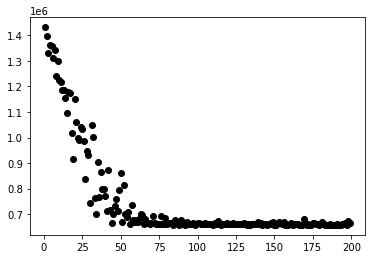

In [233]:
pyplot.scatter(df_list_features_mult_1000['lista_camadas_neuronios'][1:200], df_list_features_mult_1000['list_mse'][1:200], color='black')

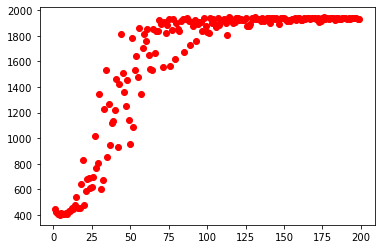

In [244]:
pyplot.scatter(df_list_features_mult_1000['lista_camadas_neuronios'][1:200], df_list_features_mult_1000['list_rmspe'][1:200], color='red')

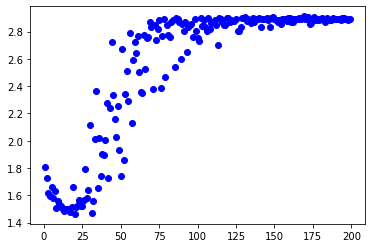

In [249]:
pyplot.scatter(df_list_features_mult_1000['lista_camadas_neuronios'][1:200], df_list_features_mult_1000['list_mape'][1:200], color='blue')

In [ ]:
#--------- definicao dos ranges das variaveis ---------
x_limite_inferior = 1
y_limite_inferior = 1
x_limite_superior = 50
y_limite_superior = 50
qtdd_amostras = 10000

#--------- Vetor dos ranges das variaveis ---------
X = np.random.randint(x_limite_inferior, x_limite_superior, (qtdd_amostras))
Y = np.random.randint(y_limite_inferior, y_limite_superior, (qtdd_amostras))

#--------- Vetor dos ranges das variaveis ---------
lista_camadas_neuronios = range(500)

#--------- definicao da funcao resultante ---------
def function(X,Y):
    return X * Y
Z = function(X,Y)

# ---------------------- Informação a Priori ---------------------- 
df = pd.DataFrame(Z, columns = ['Z'])
df['X'] = X
df['Y'] = Y

# ----------- Base de teste e treinamento com informação a priori -----------
df_train, df_test = train_test_split(df, test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# ---------------- Escolha dos parametros de entrada para a Rede Neural ----------------
columns_features_train = ['X', 'Y']
columns_features_predict = columns_features_train
input_numbers = len(columns_features_train)
target_train = ['Z']
output_numbers = len(target_train)

list_mape = []
list_mse = []
list_rmspe = []
error_list = []

for n_numbers in tqdm(lista_camadas_neuronios):
    # ---------------- Configuração da rede neural ----------------
    model = Sequential()
    model.add(Dense(units = input_numbers, activation = 'linear', input_dim=input_numbers))
    model.add(Dense(units = n_numbers, activation = 'linear'))
    model.add(Dense(units = output_numbers, activation = 'linear'))
    model.compile(loss='mse', optimizer="adam")

    # ---------------- treinamento da rede ----------------
    model.fit(df_train[columns_features_train], df_train[target_train],
              epochs=50, verbose=1, use_multiprocessing=True)

    # ---------------- Previsão dos dados de teste ----------------
    Z_Predict = model.predict(df_test[columns_features_train])
    df_test['Z_Predict'] = pd.DataFrame(Z_Predict).astype(float)

    # ---------------- Metricas de erros ----------------
    mape = mean_absolute_percentage_error(df_test['Z'], df_test['Z_Predict'])
    mse = mean_squared_error(df_test['Z'], df_test['Z_Predict'])
    rmspe = (np.sqrt(np.mean(np.square((df_test['Z'] - df_test['Z_Predict']) / df_test['Z'])))) * 100
    
    # ---------------- Append Errors in lists ----------------
    list_mape.append(mape)
    list_mse.append(mse)
    list_rmspe.append(rmspe)
    error_list.append([n_numbers, mape, mse, rmspe])
    
    #print(f'Mean Absolute Percentage Error: {mape.round(2)}', f'Mean Squared Error: {mse.round(2)}', f'Mean Square Percentage Error: {rmspe.round(2)}')